# Подбор по сетке параметров нейросети для предсказания параметра "соотношение матрица-наполнитель"

Предобработка

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#директория проекта
#diraddr = 'C:/Users/leleg/OneDrive/data_science_course/_вкр/project/'
diraddr = 'C:/Users/busyen/OneDrive/data_science_course/_вкр/project/'

In [3]:
#загрузить подготовленные данные
df = pd.read_csv(diraddr + 'data/processed/df_no_outliers.csv')
df.drop(columns=['Unnamed: 0'],inplace = True)

In [4]:
#стандартизация
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df))
df.rename(columns={
    0:'UN',
    1:'ShN',
    2:'PN',
    3:'SMN',
    4:'P',
    5:'MU',
    6:'KO',
    7:'SEG',
    8:'TV',
    9:'PP',
    10:'MUR',
    11:'PR',
    12:'PS'
}, inplace = True)
#df.describe().T

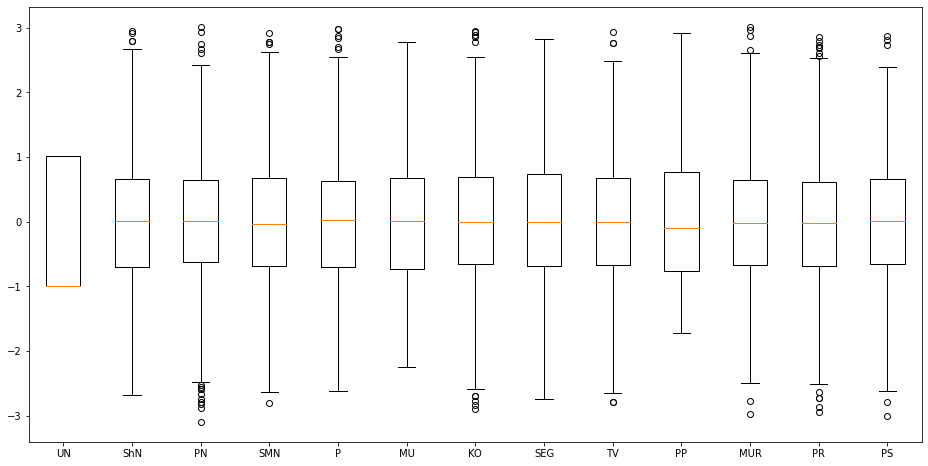

In [5]:
#вывод ящиков
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.boxplot(df, labels = df.columns)
plt.show()

In [6]:
#преобразовать в массивы
x = np.array(df.drop(columns=['SMN','MUR','PR',]))
y = np.array(df.drop(columns=['UN','ShN','PN','P','MU','KO','SEG','TV','PP','MUR','PR','PS']))

In [7]:
#разделить оба массива на train и test 70 на 30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((700, 10), (300, 10), (700, 1), (300, 1))

Grid Search

In [8]:
#поиск по сетке с дефолтными параметрами
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
param_list = {'hidden_layer_sizes': [(100,100,100),(14,),(50,)],
             'activation': ['identity', 'logistic', 'tahn', 'relu'],
                 'solver': ['lbfgs', 'sgd', 'adam'],
             'alpha': [0.0001],
             'max_iter': [1000],
             'verbose': [1]}
regr = GridSearchCV(MLPRegressor(), param_list, cv = 10, verbose = 1).fit(x_train, y_train)
regr.predict(x_test)
regr.score(x_test, y_test)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\pyt

Iteration 1, loss = 0.71879349
Iteration 2, loss = 0.62754556
Iteration 3, loss = 0.54184409
Iteration 4, loss = 0.49715609
Iteration 5, loss = 0.47727986
Iteration 6, loss = 0.46822674
Iteration 7, loss = 0.46493925
Iteration 8, loss = 0.46299175
Iteration 9, loss = 0.46274048
Iteration 10, loss = 0.46342203
Iteration 11, loss = 0.46295466
Iteration 12, loss = 0.46291854
Iteration 13, loss = 0.46306646
Iteration 14, loss = 0.46366041
Iteration 15, loss = 0.46377270
Iteration 16, loss = 0.46393428
Iteration 17, loss = 0.46342628
Iteration 18, loss = 0.46197518
Iteration 19, loss = 0.46138808
Iteration 20, loss = 0.46157576
Iteration 21, loss = 0.46101659
Iteration 22, loss = 0.46102475
Iteration 23, loss = 0.46170427
Iteration 24, loss = 0.46173532
Iteration 25, loss = 0.46158926
Iteration 26, loss = 0.46193577
Iteration 27, loss = 0.46192991
Iteration 28, loss = 0.46200021
Iteration 29, loss = 0.46126532
Iteration 30, loss = 0.46137169
Iteration 31, loss = 0.46114552
Iteration 32, los

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 9, loss = 0.46175990
Iteration 10, loss = 0.46081685
Iteration 11, loss = 0.46104989
Iteration 12, loss = 0.46088672
Iteration 13, loss = 0.46064255
Iteration 14, loss = 0.46150250
Iteration 15, loss = 0.46158610
Iteration 16, loss = 0.46160514
Iteration 17, loss = 0.46167066
Iteration 18, loss = 0.46185127
Iteration 19, loss = 0.46151673
Iteration 20, loss = 0.46197296
Iteration 21, loss = 0.46288358
Iteration 22, loss = 0.46287644
Iteration 23, loss = 0.46197334
Iteration 24, loss = 0.46232049
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.67776829
Iteration 2, loss = 0.58756738
Iteration 3, loss = 0.51489996
Iteration 4, loss = 0.48468537
Iteration 5, loss = 0.48147138
Iteration 6, loss = 0.47911886
Iteration 7, loss = 0.47762673
Iteration 8, loss = 0.47432602
Iteration 9, loss = 0.47414077
Iteration 10, loss = 0.47319693
Iteration 11, loss = 0.47373569
Iteration 12, loss = 0.47427737
Iteration 13, loss = 0.

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 14, loss = 0.47606754
Iteration 15, loss = 0.47587144
Iteration 16, loss = 0.47500989
Iteration 17, loss = 0.47384736
Iteration 18, loss = 0.47361347
Iteration 19, loss = 0.47309898
Iteration 20, loss = 0.47348261
Iteration 21, loss = 0.47365015
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.64284549
Iteration 2, loss = 0.57498922
Iteration 3, loss = 0.51289477
Iteration 4, loss = 0.48285722
Iteration 5, loss = 0.47929272
Iteration 6, loss = 0.48230737
Iteration 7, loss = 0.47906252
Iteration 8, loss = 0.47762654
Iteration 9, loss = 0.47363411
Iteration 10, loss = 0.47284870
Iteration 11, loss = 0.47220511

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 12, loss = 0.47136874
Iteration 13, loss = 0.47219153
Iteration 14, loss = 0.47245807
Iteration 15, loss = 0.47142766
Iteration 16, loss = 0.47052836
Iteration 17, loss = 0.47051239
Iteration 18, loss = 0.47124099
Iteration 19, loss = 0.47191704
Iteration 20, loss = 0.47108897
Iteration 21, loss = 0.47114930
Iteration 22, loss = 0.47164379
Iteration 23, loss = 0.47133873
Iteration 24, loss = 0.47140876
Iteration 25, loss = 0.47173327
Iteration 26, loss = 0.47177506
Iteration 27, loss = 0.47167938
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.63979326
Iteration 2, loss = 0.58789018
Iteration 3, loss = 0.53750554
Iteration 4, loss = 0.50278195
Iteration 5, loss = 0.48691408
Iteration 6, loss = 0.48139791
Iteration 7, loss = 0.47705633

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 8, loss = 0.47463432
Iteration 9, loss = 0.47426510
Iteration 10, loss = 0.47389967
Iteration 11, loss = 0.47370676
Iteration 12, loss = 0.47375153
Iteration 13, loss = 0.47411366
Iteration 14, loss = 0.47327877
Iteration 15, loss = 0.47293136
Iteration 16, loss = 0.47277187
Iteration 17, loss = 0.47236206
Iteration 18, loss = 0.47260371
Iteration 19, loss = 0.47262085
Iteration 20, loss = 0.47357137
Iteration 21, loss = 0.47263214
Iteration 22, loss = 0.47230105
Iteration 23, loss = 0.47274500
Iteration 24, loss = 0.47340301
Iteration 25, loss = 0.47317490
Iteration 26, loss = 0.47296871
Iteration 27, loss = 0.47321370
Iteration 28, loss = 0.47373359
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.61021692
Iteration 2, loss = 0.56509768
Iteration 3, loss = 0.52690473
Iteration 4, loss = 0.50855495
Iteration 5, loss = 0.50232915
Iteration 6, loss = 0.49997748
Iteration 7, loss = 0.49708084
Iteration 8, loss = 0.49468590
Iteration 9, loss = 0.49237138
Iteration 10, loss = 0.49167253
Iteration 11, loss = 0.49211622
Iteration 12, loss = 0.49303917
Iteration 13, loss = 0.49329495
Iteration 14, loss = 0.49334335
Iteration 15, loss = 0.49313447
Iteration 16, loss = 0.49271692
Iteration 17, loss = 0.49178068
Iteration 18, loss = 0.49080803
Iteration 19, loss = 0.49109915
Iteration 20, loss = 0.49154954
Iteration 21, loss = 0.49307786
Iteration 22, loss = 0.49330523
Iteration 23, loss = 0.49288080
Iteration 24, loss = 0.49179441
Iteration 25, loss = 0.49139831
Iteration 26, loss = 0.49153899
Iteration 27, loss = 0.49047995
Iteration 28, loss = 0.49079668
Iteration 29, loss = 0.49135925
Iteration 30, loss = 0.49224828
Iteration 31, loss = 0.49255896
Iteration 32, los

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.72455088
Iteration 2, loss = 0.61789996
Iteration 3, loss = 0.53480970
Iteration 4, loss = 0.50377668
Iteration 5, loss = 0.49114546
Iteration 6, loss = 0.48549839
Iteration 7, loss = 0.48415534
Iteration 8, loss = 0.48454861
Iteration 9, loss = 0.48530760
Iteration 10, loss = 0.48525922
Iteration 11, loss = 0.48419503
Iteration 12, loss = 0.48277746
Iteration 13, loss = 0.48159719
Iteration 14, loss = 0.48100017
Iteration 15, loss = 0.48109881
Iteration 16, loss = 0.48261077
Iteration 17, loss = 0.48261294
Iteration 18, loss = 0.48197515
Iteration 19, loss = 0.48194161
Iteration 20, loss = 0.48229184
Iteration 21, loss = 0.48224020
Iteration 22, loss = 0.48224058
Iteration 23, loss = 0.48207826
Iteration 24, loss = 0.48210735
Iteration 25, loss = 0.48127601
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.77464399
Iteration 2, loss = 0.65653204
Iteration 3, loss = 0.55502613
Iteration 4, loss = 0.5066

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 11, loss = 0.49104092
Iteration 12, loss = 0.49135732
Iteration 13, loss = 0.49079317
Iteration 14, loss = 0.49009401
Iteration 15, loss = 0.49089834
Iteration 16, loss = 0.49080601
Iteration 17, loss = 0.49190705
Iteration 18, loss = 0.49163540
Iteration 19, loss = 0.49188022
Iteration 20, loss = 0.49125635
Iteration 21, loss = 0.49097096
Iteration 22, loss = 0.49032529
Iteration 23, loss = 0.49076860
Iteration 24, loss = 0.49168028
Iteration 25, loss = 0.49294119
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.72988059
Iteration 2, loss = 0.61916047

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 3, loss = 0.52662626
Iteration 4, loss = 0.49118372
Iteration 5, loss = 0.48591650
Iteration 6, loss = 0.48824264
Iteration 7, loss = 0.48769601
Iteration 8, loss = 0.48355164
Iteration 9, loss = 0.47875611
Iteration 10, loss = 0.47626813
Iteration 11, loss = 0.47582498
Iteration 12, loss = 0.47441160
Iteration 13, loss = 0.47354461
Iteration 14, loss = 0.47317102
Iteration 15, loss = 0.47275854
Iteration 16, loss = 0.47375082
Iteration 17, loss = 0.47402497
Iteration 18, loss = 0.47325380
Iteration 19, loss = 0.47325833
Iteration 20, loss = 0.47276962
Iteration 21, loss = 0.47308807
Iteration 22, loss = 0.47337872
Iteration 23, loss = 0.47356125
Iteration 24, loss = 0.47406493
Iteration 25, loss = 0.47366855
Iteration 26, loss = 0.47365457
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.66024070
Iteration 2, loss = 0.60560333
Iteration 3, loss = 0.54269975
Iteration 4, loss = 0.50326693
Iteration 5, loss = 0.48

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 10, loss = 0.45832380
Iteration 11, loss = 0.45769912
Iteration 12, loss = 0.45693127
Iteration 13, loss = 0.45669784
Iteration 14, loss = 0.45673820
Iteration 15, loss = 0.45636822
Iteration 16, loss = 0.45666651
Iteration 17, loss = 0.45687709
Iteration 18, loss = 0.45678068
Iteration 19, loss = 0.45706593
Iteration 20, loss = 0.45721560
Iteration 21, loss = 0.45734896
Iteration 22, loss = 0.45727060
Iteration 23, loss = 0.45704095
Iteration 24, loss = 0.45715994
Iteration 25, loss = 0.45703058
Iteration 26, loss = 0.45697796
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.50493712
Iteration 2, loss = 0.52279699
Iteration 3, loss = 0.49060320

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 4, loss = 0.48857639
Iteration 5, loss = 0.49325672
Iteration 6, loss = 0.48093503
Iteration 7, loss = 0.47829198
Iteration 8, loss = 0.47877431
Iteration 9, loss = 0.46875164
Iteration 10, loss = 0.48004398
Iteration 11, loss = 0.47960527
Iteration 12, loss = 0.46862297
Iteration 13, loss = 0.47079822
Iteration 14, loss = 0.47071068
Iteration 15, loss = 0.47286975
Iteration 16, loss = 0.47562057
Iteration 17, loss = 0.46823868
Iteration 18, loss = 0.46441071
Iteration 19, loss = 0.46797105
Iteration 20, loss = 0.46963197
Iteration 21, loss = 0.46286223
Iteration 22, loss = 0.46953431
Iteration 23, loss = 0.47251726
Iteration 24, loss = 0.46321474
Iteration 25, loss = 0.46530644
Iteration 26, loss = 0.47192041
Iteration 27, loss = 0.47078528
Iteration 28, loss = 0.47515740
Iteration 29, loss = 0.47956692
Iteration 30, loss = 0.47199288
Iteration 31, loss = 0.46701893
Iteration 32, loss = 0.46740822
Training loss did not improve more than tol=0.000100 for 10 consecutive epoch

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 8, loss = 0.47977784
Iteration 9, loss = 0.48778624
Iteration 10, loss = 0.47600061
Iteration 11, loss = 0.48277455
Iteration 12, loss = 0.47547521
Iteration 13, loss = 0.47135688
Iteration 14, loss = 0.47838113
Iteration 15, loss = 0.46932486
Iteration 16, loss = 0.46918304
Iteration 17, loss = 0.46485366
Iteration 18, loss = 0.47846427
Iteration 19, loss = 0.47393050
Iteration 20, loss = 0.46606677
Iteration 21, loss = 0.46838368
Iteration 22, loss = 0.47819933
Iteration 23, loss = 0.47030136
Iteration 24, loss = 0.46844070
Iteration 25, loss = 0.46829708
Iteration 26, loss = 0.47013634
Iteration 27, loss = 0.46913309
Iteration 28, loss = 0.46825152
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.54140753
Iteration 2, loss = 0.51555206
Iteration 3, loss = 0.50273400
Iteration 4, loss = 0.50873894
Iteration 5, loss = 0.49402404
Iteration 6, loss = 0.48753491
Iteration 7, loss = 0.48902687
Iteration 8, loss = 0.

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 9, loss = 0.50848883
Iteration 10, loss = 0.48589279
Iteration 11, loss = 0.47997621
Iteration 12, loss = 0.48717298
Iteration 13, loss = 0.48678193
Iteration 14, loss = 0.48695962
Iteration 15, loss = 0.48545661
Iteration 16, loss = 0.48707739
Iteration 17, loss = 0.48423636
Iteration 18, loss = 0.48251579
Iteration 19, loss = 0.47956966
Iteration 20, loss = 0.48222062
Iteration 21, loss = 0.49831502
Iteration 22, loss = 0.48094769
Iteration 23, loss = 0.48683169
Iteration 24, loss = 0.49066818
Iteration 25, loss = 0.48603945
Iteration 26, loss = 0.47923080
Iteration 27, loss = 0.48385207
Iteration 28, loss = 0.48989604
Iteration 29, loss = 0.48332099
Iteration 30, loss = 0.47766984
Iteration 31, loss = 0.47619203
Iteration 32, loss = 0.47920627
Iteration 33, loss = 0.48732329
Iteration 34, loss = 0.47832528
Iteration 35, loss = 0.48085864
Iteration 36, loss = 0.48463291
Iteration 37, loss = 0.48219991
Iteration 38, loss = 0.47712135
Iteration 39, loss = 0.48920275
Iteratio

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 14, loss = 0.48207554
Iteration 15, loss = 0.48078241
Iteration 16, loss = 0.48028725
Iteration 17, loss = 0.47666439
Iteration 18, loss = 0.47976045
Iteration 19, loss = 0.48954033
Iteration 20, loss = 0.48106010
Iteration 21, loss = 0.48566753
Iteration 22, loss = 0.48544942
Iteration 23, loss = 0.47641535
Iteration 24, loss = 0.48367096
Iteration 25, loss = 0.48332060
Iteration 26, loss = 0.47391487
Iteration 27, loss = 0.47885758
Iteration 28, loss = 0.48300196
Iteration 29, loss = 0.48241109
Iteration 30, loss = 0.47877742
Iteration 31, loss = 0.47526377
Iteration 32, loss = 0.47977084
Iteration 33, loss = 0.47634662
Iteration 34, loss = 0.47710899
Iteration 35, loss = 0.48249095
Iteration 36, loss = 0.48064112
Iteration 37, loss = 0.47489754
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.55051556
Iteration 2, loss = 0.53560550
Iteration 3, loss = 0.49893348
Iteration 4, loss = 0.49016530
Iteration 5, loss 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 14, loss = 0.48262649
Iteration 15, loss = 0.49123228
Iteration 16, loss = 0.48716190
Iteration 17, loss = 0.48069364
Iteration 18, loss = 0.49365660
Iteration 19, loss = 0.48404524
Iteration 20, loss = 0.48330324
Iteration 21, loss = 0.48699433
Iteration 22, loss = 0.48465735
Iteration 23, loss = 0.48301796
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.58031182
Iteration 2, loss = 0.53611340
Iteration 3, loss = 0.50709804
Iteration 4, loss = 0.50278907
Iteration 5, loss = 0.50669601

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 6, loss = 0.50427283
Iteration 7, loss = 0.50260730
Iteration 8, loss = 0.50228330
Iteration 9, loss = 0.50227990
Iteration 10, loss = 0.50711786
Iteration 11, loss = 0.50257880
Iteration 12, loss = 0.50693404
Iteration 13, loss = 0.50351261
Iteration 14, loss = 0.52499447
Iteration 15, loss = 0.50479696
Iteration 16, loss = 0.49964650
Iteration 17, loss = 0.51029151
Iteration 18, loss = 0.49944154
Iteration 19, loss = 0.49908016
Iteration 20, loss = 0.49446548
Iteration 21, loss = 0.49550053
Iteration 22, loss = 0.50094962
Iteration 23, loss = 0.50206899
Iteration 24, loss = 0.49406873
Iteration 25, loss = 0.49707165
Iteration 26, loss = 0.50233276
Iteration 27, loss = 0.50005043
Iteration 28, loss = 0.49928287
Iteration 29, loss = 0.50135133
Iteration 30, loss = 0.50051282
Iteration 31, loss = 0.49989166
Iteration 32, loss = 0.49350647
Iteration 33, loss = 0.49679891
Iteration 34, loss = 0.49626536
Iteration 35, loss = 0.49726183
Iteration 36, loss = 0.50271689
Iteration 3

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 9, loss = 0.49837017
Iteration 10, loss = 0.49029366
Iteration 11, loss = 0.50515696
Iteration 12, loss = 0.49460716
Iteration 13, loss = 0.49523969
Iteration 14, loss = 0.49339975
Iteration 15, loss = 0.49148929
Iteration 16, loss = 0.48815946
Iteration 17, loss = 0.49178043
Iteration 18, loss = 0.49471579
Iteration 19, loss = 0.49732329
Iteration 20, loss = 0.48923269
Iteration 21, loss = 0.49272104
Iteration 22, loss = 0.49194755
Iteration 23, loss = 0.49071157
Iteration 24, loss = 0.48367012
Iteration 25, loss = 0.49341727
Iteration 26, loss = 0.49491975
Iteration 27, loss = 0.48832505
Iteration 28, loss = 0.48893123
Iteration 29, loss = 0.48558136
Iteration 30, loss = 0.48578976
Iteration 31, loss = 0.48767707
Iteration 32, loss = 0.48635528
Iteration 33, loss = 0.48698213
Iteration 34, loss = 0.48578080
Iteration 35, loss = 0.48842001
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.54966923
Iteration 2, lo

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 8, loss = 0.50479957
Iteration 9, loss = 0.51723746
Iteration 10, loss = 0.50249417
Iteration 11, loss = 0.50068704
Iteration 12, loss = 0.50016252
Iteration 13, loss = 0.50231528
Iteration 14, loss = 0.50223228
Iteration 15, loss = 0.49385460
Iteration 16, loss = 0.50778796
Iteration 17, loss = 0.49898956
Iteration 18, loss = 0.50504553
Iteration 19, loss = 0.51094814
Iteration 20, loss = 0.50002932
Iteration 21, loss = 0.50510318
Iteration 22, loss = 0.50576610
Iteration 23, loss = 0.49976485
Iteration 24, loss = 0.50961144
Iteration 25, loss = 0.50897832
Iteration 26, loss = 0.50452099
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.68629479
Iteration 2, loss = 0.56069457
Iteration 3, loss = 0.58240014
Iteration 4, loss = 0.50230217
Iteration 5, loss = 0.49722575
Iteration 6, loss = 0.49828760
Iteration 7, loss = 0.49567838

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 8, loss = 0.49286340
Iteration 9, loss = 0.49017478
Iteration 10, loss = 0.48868440
Iteration 11, loss = 0.47970417
Iteration 12, loss = 0.47924669
Iteration 13, loss = 0.48382067
Iteration 14, loss = 0.48051286
Iteration 15, loss = 0.47842381
Iteration 16, loss = 0.48745531
Iteration 17, loss = 0.48615598
Iteration 18, loss = 0.47997371
Iteration 19, loss = 0.47930933
Iteration 20, loss = 0.48614470
Iteration 21, loss = 0.48225079
Iteration 22, loss = 0.48113029
Iteration 23, loss = 0.48809498
Iteration 24, loss = 0.49191960
Iteration 25, loss = 0.48604466
Iteration 26, loss = 0.47780587
Iteration 27, loss = 0.48113228
Iteration 28, loss = 0.48697527
Iteration 29, loss = 0.48442389
Iteration 30, loss = 0.48419966
Iteration 31, loss = 0.48094121
Iteration 32, loss = 0.48172600
Iteration 33, loss = 0.48489044
Iteration 34, loss = 0.48232129
Iteration 35, loss = 0.47473757
Iteration 36, loss = 0.47655177
Iteration 37, loss = 0.48286448
Iteration 38, loss = 0.48630577
Iteration

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 6, loss = 0.47233518
Iteration 7, loss = 0.47578108
Iteration 8, loss = 0.47838724
Iteration 9, loss = 0.48310742
Iteration 10, loss = 0.46680428
Iteration 11, loss = 0.47316563
Iteration 12, loss = 0.47389221
Iteration 13, loss = 0.47143821
Iteration 14, loss = 0.46920892
Iteration 15, loss = 0.46707473
Iteration 16, loss = 0.46870870
Iteration 17, loss = 0.46077187
Iteration 18, loss = 0.47220844
Iteration 19, loss = 0.46897777
Iteration 20, loss = 0.46913997
Iteration 21, loss = 0.47502733
Iteration 22, loss = 0.46517341
Iteration 23, loss = 0.46498622
Iteration 24, loss = 0.46464636
Iteration 25, loss = 0.47116751
Iteration 26, loss = 0.46454951
Iteration 27, loss = 0.46397664
Iteration 28, loss = 0.46631773
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\pyt

Iteration 1, loss = 1.93300606
Iteration 2, loss = 1.74336018
Iteration 3, loss = 1.50656751
Iteration 4, loss = 1.26294689
Iteration 5, loss = 1.06587425
Iteration 6, loss = 0.90231649
Iteration 7, loss = 0.77898518
Iteration 8, loss = 0.68877834
Iteration 9, loss = 0.62522911
Iteration 10, loss = 0.58008275
Iteration 11, loss = 0.54679181
Iteration 12, loss = 0.52324402
Iteration 13, loss = 0.50740134
Iteration 14, loss = 0.49610854
Iteration 15, loss = 0.48781737
Iteration 16, loss = 0.48146814
Iteration 17, loss = 0.47639842
Iteration 18, loss = 0.47282288
Iteration 19, loss = 0.46994570
Iteration 20, loss = 0.46779695
Iteration 21, loss = 0.46607265
Iteration 22, loss = 0.46485198
Iteration 23, loss = 0.46363672
Iteration 24, loss = 0.46294092
Iteration 25, loss = 0.46237438
Iteration 26, loss = 0.46186811
Iteration 27, loss = 0.46180108
Iteration 28, loss = 0.46128604
Iteration 29, loss = 0.46101309
Iteration 30, loss = 0.46076902
Iteration 31, loss = 0.46061181
Iteration 32, los

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 44, loss = 0.47358620
Iteration 45, loss = 0.47346723
Iteration 46, loss = 0.47333050
Iteration 47, loss = 0.47306178
Iteration 48, loss = 0.47295968
Iteration 49, loss = 0.47301915
Iteration 50, loss = 0.47272485
Iteration 51, loss = 0.47248588
Iteration 52, loss = 0.47233256
Iteration 53, loss = 0.47229201
Iteration 54, loss = 0.47220052
Iteration 55, loss = 0.47217036
Iteration 56, loss = 0.47202237
Iteration 57, loss = 0.47207450
Iteration 58, loss = 0.47204384
Iteration 59, loss = 0.47207259
Iteration 60, loss = 0.47207634
Iteration 61, loss = 0.47212554
Iteration 62, loss = 0.47209167
Iteration 63, loss = 0.47205499
Iteration 64, loss = 0.47211875
Iteration 65, loss = 0.47184507
Iteration 66, loss = 0.47171677
Iteration 67, loss = 0.47159020
Iteration 68, loss = 0.47149421
Iteration 69, loss = 0.47146309
Iteration 70, loss = 0.47143163
Iteration 71, loss = 0.47132533
Iteration 72, loss = 0.47148431
Iteration 73, loss = 0.47147392
Iteration 74, loss = 0.47145846
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 21, loss = 0.47095916
Iteration 22, loss = 0.47067236
Iteration 23, loss = 0.47049190
Iteration 24, loss = 0.47037829
Iteration 25, loss = 0.47027862
Iteration 26, loss = 0.47023444
Iteration 27, loss = 0.47018345
Iteration 28, loss = 0.47022308
Iteration 29, loss = 0.47023226
Iteration 30, loss = 0.47012843
Iteration 31, loss = 0.47013774
Iteration 32, loss = 0.47017827
Iteration 33, loss = 0.47032277
Iteration 34, loss = 0.47024104
Iteration 35, loss = 0.47014332
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.28495356
Iteration 2, loss = 1.19244984
Iteration 3, loss = 1.06849384
Iteration 4, loss = 0.94201811
Iteration 5, loss = 0.83068117
Iteration 6, loss = 0.74705845
Iteration 7, loss = 0.67586987
Iteration 8, loss = 0.62669976
Iteration 9, loss = 0.58899740
Iteration 10, loss = 0.55888693
Iteration 11, loss = 0.53815856
Iteration 12, loss = 0.52200485
Iteration 13, loss = 0.51071143
Iteration 14, loss = 0.

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 28, loss = 0.49147456
Iteration 29, loss = 0.49123685
Iteration 30, loss = 0.49102823
Iteration 31, loss = 0.49068807
Iteration 32, loss = 0.49032860
Iteration 33, loss = 0.49025697
Iteration 34, loss = 0.49005138
Iteration 35, loss = 0.48990707
Iteration 36, loss = 0.49000885
Iteration 37, loss = 0.48991493
Iteration 38, loss = 0.48985258
Iteration 39, loss = 0.48987968
Iteration 40, loss = 0.48996743
Iteration 41, loss = 0.48996722
Iteration 42, loss = 0.49001117
Iteration 43, loss = 0.49010001
Iteration 44, loss = 0.49020084
Iteration 45, loss = 0.49019069
Iteration 46, loss = 0.49011990
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.25133581
Iteration 2, loss = 1.16184366
Iteration 3, loss = 1.03696508
Iteration 4, loss = 0.91562769
Iteration 5, loss = 0.80431986
Iteration 6, loss = 0.71973134
Iteration 7, loss = 0.65548725
Iteration 8, loss = 0.60679162
Iteration 9, loss = 0.57176168
Iteration 10, loss = 0

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 6, loss = 0.92840853
Iteration 7, loss = 0.82447742
Iteration 8, loss = 0.74622709
Iteration 9, loss = 0.68594568
Iteration 10, loss = 0.64349583
Iteration 11, loss = 0.61098084
Iteration 12, loss = 0.58664895
Iteration 13, loss = 0.56874256
Iteration 14, loss = 0.55458271
Iteration 15, loss = 0.54330097
Iteration 16, loss = 0.53472834
Iteration 17, loss = 0.52770697
Iteration 18, loss = 0.52217060
Iteration 19, loss = 0.51827126
Iteration 20, loss = 0.51462451
Iteration 21, loss = 0.51176865
Iteration 22, loss = 0.50890078
Iteration 23, loss = 0.50677927
Iteration 24, loss = 0.50473562
Iteration 25, loss = 0.50302818
Iteration 26, loss = 0.50170816
Iteration 27, loss = 0.50043603
Iteration 28, loss = 0.49928856
Iteration 29, loss = 0.49850819
Iteration 30, loss = 0.49749055
Iteration 31, loss = 0.49669509
Iteration 32, loss = 0.49603033
Iteration 33, loss = 0.49528195
Iteration 34, loss = 0.49473532
Iteration 35, loss = 0.49431875
Iteration 36, loss = 0.49386120
Iteration 3

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 3, loss = 0.80250596
Iteration 4, loss = 0.72664183
Iteration 5, loss = 0.65985368
Iteration 6, loss = 0.60379678
Iteration 7, loss = 0.56566253
Iteration 8, loss = 0.53627849
Iteration 9, loss = 0.51551810
Iteration 10, loss = 0.50208212
Iteration 11, loss = 0.49288575
Iteration 12, loss = 0.48671824
Iteration 13, loss = 0.48187686
Iteration 14, loss = 0.47922256
Iteration 15, loss = 0.47745389
Iteration 16, loss = 0.47603427
Iteration 17, loss = 0.47471044
Iteration 18, loss = 0.47402696
Iteration 19, loss = 0.47345560
Iteration 20, loss = 0.47325684
Iteration 21, loss = 0.47288777
Iteration 22, loss = 0.47290425
Iteration 23, loss = 0.47274857
Iteration 24, loss = 0.47265655
Iteration 25, loss = 0.47289579
Iteration 26, loss = 0.47273724
Iteration 27, loss = 0.47258824
Iteration 28, loss = 0.47273511
Iteration 29, loss = 0.47290629
Iteration 30, loss = 0.47280358
Iteration 31, loss = 0.47296928
Iteration 32, loss = 0.47289077
Iteration 33, loss = 0.47270863
Iteration 34, l

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 35, loss = 0.48682744
Iteration 36, loss = 0.48399234
Iteration 37, loss = 0.48122547
Iteration 38, loss = 0.47863407
Iteration 39, loss = 0.47675262
Iteration 40, loss = 0.47478867
Iteration 41, loss = 0.47331000
Iteration 42, loss = 0.47208152
Iteration 43, loss = 0.47046318
Iteration 44, loss = 0.46959131
Iteration 45, loss = 0.46846066
Iteration 46, loss = 0.46749614
Iteration 47, loss = 0.46674014
Iteration 48, loss = 0.46587030
Iteration 49, loss = 0.46516315
Iteration 50, loss = 0.46463920
Iteration 51, loss = 0.46411463
Iteration 52, loss = 0.46358213
Iteration 53, loss = 0.46315856
Iteration 54, loss = 0.46284502
Iteration 55, loss = 0.46249135
Iteration 56, loss = 0.46225996
Iteration 57, loss = 0.46203578
Iteration 58, loss = 0.46185075
Iteration 59, loss = 0.46175215
Iteration 60, loss = 0.46157041
Iteration 61, loss = 0.46129148
Iteration 62, loss = 0.46140729
Iteration 63, loss = 0.46135773
Iteration 64, loss = 0.46119063
Iteration 65, loss = 0.46109965
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.40106869
Iteration 2, loss = 1.33437193
Iteration 3, loss = 1.27610797
Iteration 4, loss = 1.22099471
Iteration 5, loss = 1.16825604
Iteration 6, loss = 1.12057034
Iteration 7, loss = 1.07519176
Iteration 8, loss = 1.03389611
Iteration 9, loss = 0.99412633
Iteration 10, loss = 0.95976837
Iteration 11, loss = 0.92683059
Iteration 12, loss = 0.89631000
Iteration 13, loss = 0.86896565
Iteration 14, loss = 0.84214562
Iteration 15, loss = 0.81774002
Iteration 16, loss = 0.79372676
Iteration 17, loss = 0.77184306
Iteration 18, loss = 0.75096552
Iteration 19, loss = 0.73220657
Iteration 20, loss = 0.71372703
Iteration 21, loss = 0.69658613
Iteration 22, loss = 0.68148619
Iteration 23, loss = 0.66572948
Iteration 24, loss = 0.65164132
Iteration 25, loss = 0.63821168
Iteration 26, loss = 0.62541330
Iteration 27, loss = 0.61337585
Iteration 28, loss = 0.60225393
Iteration 29, loss = 0.59070751
Iteration 30, loss = 0.58080266
Iteration 31, loss = 0.57117944
Iteration 32, los

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 40, loss = 0.47510895
Iteration 41, loss = 0.47428993
Iteration 42, loss = 0.47372379
Iteration 43, loss = 0.47369880
Iteration 44, loss = 0.47306042
Iteration 45, loss = 0.47281540
Iteration 46, loss = 0.47262707
Iteration 47, loss = 0.47237566
Iteration 48, loss = 0.47221107
Iteration 49, loss = 0.47202941
Iteration 50, loss = 0.47189507
Iteration 51, loss = 0.47181845
Iteration 52, loss = 0.47176951
Iteration 53, loss = 0.47166980
Iteration 54, loss = 0.47180246
Iteration 55, loss = 0.47176180
Iteration 56, loss = 0.47185774
Iteration 57, loss = 0.47186160
Iteration 58, loss = 0.47215557
Iteration 59, loss = 0.47195679
Iteration 60, loss = 0.47206135
Iteration 61, loss = 0.47177618
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.40165767
Iteration 2, loss = 1.34133046
Iteration 3, loss = 1.28971493
Iteration 4, loss = 1.23995804
Iteration 5, loss = 1.19281514
Iteration 6, loss = 1.14860659
Iteration 7, loss = 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 56, loss = 0.48407714
Iteration 57, loss = 0.48278250
Iteration 58, loss = 0.48137809
Iteration 59, loss = 0.48017548
Iteration 60, loss = 0.47924909
Iteration 61, loss = 0.47839948
Iteration 62, loss = 0.47775001
Iteration 63, loss = 0.47711161
Iteration 64, loss = 0.47645929
Iteration 65, loss = 0.47556733
Iteration 66, loss = 0.47490316
Iteration 67, loss = 0.47438797
Iteration 68, loss = 0.47367054
Iteration 69, loss = 0.47316949
Iteration 70, loss = 0.47268428
Iteration 71, loss = 0.47234555
Iteration 72, loss = 0.47189381
Iteration 73, loss = 0.47173662
Iteration 74, loss = 0.47147487
Iteration 75, loss = 0.47130786
Iteration 76, loss = 0.47104033
Iteration 77, loss = 0.47111050
Iteration 78, loss = 0.47092403
Iteration 79, loss = 0.47070499
Iteration 80, loss = 0.47073951
Iteration 81, loss = 0.47055098
Iteration 82, loss = 0.47067990
Iteration 83, loss = 0.47048182
Iteration 84, loss = 0.47047648
Iteration 85, loss = 0.47018860
Iteration 86, loss = 0.47004618
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 15, loss = 1.14082905
Iteration 16, loss = 1.08794244
Iteration 17, loss = 1.04182556
Iteration 18, loss = 0.99778983
Iteration 19, loss = 0.95738126
Iteration 20, loss = 0.92020398
Iteration 21, loss = 0.88474371
Iteration 22, loss = 0.85374964
Iteration 23, loss = 0.82247053
Iteration 24, loss = 0.79516151
Iteration 25, loss = 0.76984085
Iteration 26, loss = 0.74600537
Iteration 27, loss = 0.72519568
Iteration 28, loss = 0.70425057
Iteration 29, loss = 0.68535698
Iteration 30, loss = 0.66791100
Iteration 31, loss = 0.65153313
Iteration 32, loss = 0.63666574
Iteration 33, loss = 0.62359967
Iteration 34, loss = 0.61097954
Iteration 35, loss = 0.59911624
Iteration 36, loss = 0.58812481
Iteration 37, loss = 0.57867792
Iteration 38, loss = 0.56974412
Iteration 39, loss = 0.56157836
Iteration 40, loss = 0.55370702
Iteration 41, loss = 0.54665120
Iteration 42, loss = 0.54005258
Iteration 43, loss = 0.53416517
Iteration 44, loss = 0.52862974
Iteration 45, loss = 0.52310982
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 11, loss = 0.59283376
Iteration 12, loss = 0.57842912
Iteration 13, loss = 0.56612652
Iteration 14, loss = 0.55490436
Iteration 15, loss = 0.54592977
Iteration 16, loss = 0.53803680
Iteration 17, loss = 0.53112772
Iteration 18, loss = 0.52538965
Iteration 19, loss = 0.52016893
Iteration 20, loss = 0.51516410
Iteration 21, loss = 0.51160559
Iteration 22, loss = 0.50804042
Iteration 23, loss = 0.50535793
Iteration 24, loss = 0.50261129
Iteration 25, loss = 0.50068107
Iteration 26, loss = 0.49861146
Iteration 27, loss = 0.49737952
Iteration 28, loss = 0.49596114
Iteration 29, loss = 0.49461378
Iteration 30, loss = 0.49357628
Iteration 31, loss = 0.49284848
Iteration 32, loss = 0.49221286
Iteration 33, loss = 0.49171939
Iteration 34, loss = 0.49132264
Iteration 35, loss = 0.49113519
Iteration 36, loss = 0.49089975
Iteration 37, loss = 0.49048051
Iteration 38, loss = 0.49048849
Iteration 39, loss = 0.49030758
Iteration 40, loss = 0.49026699
Iteration 41, loss = 0.49053765
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 5, loss = 0.74939623
Iteration 6, loss = 0.71790802
Iteration 7, loss = 0.69047216
Iteration 8, loss = 0.66751583
Iteration 9, loss = 0.64542530
Iteration 10, loss = 0.62739893
Iteration 11, loss = 0.61162116
Iteration 12, loss = 0.59624850
Iteration 13, loss = 0.58348067
Iteration 14, loss = 0.57177642
Iteration 15, loss = 0.56061777
Iteration 16, loss = 0.55077726
Iteration 17, loss = 0.54235295
Iteration 18, loss = 0.53386931
Iteration 19, loss = 0.52779834
Iteration 20, loss = 0.52217139
Iteration 21, loss = 0.51651028
Iteration 22, loss = 0.51166844
Iteration 23, loss = 0.50676771
Iteration 24, loss = 0.50258843
Iteration 25, loss = 0.49863478
Iteration 26, loss = 0.49549824
Iteration 27, loss = 0.49264177
Iteration 28, loss = 0.49013086
Iteration 29, loss = 0.48820431
Iteration 30, loss = 0.48651495
Iteration 31, loss = 0.48448672
Iteration 32, loss = 0.48297823
Iteration 33, loss = 0.48164711
Iteration 34, loss = 0.48018218
Iteration 35, loss = 0.47924085
Iteration 36

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 32, loss = 0.61002204
Iteration 33, loss = 0.59905624
Iteration 34, loss = 0.58885668
Iteration 35, loss = 0.57882603
Iteration 36, loss = 0.56974377
Iteration 37, loss = 0.56127974
Iteration 38, loss = 0.55292663
Iteration 39, loss = 0.54562301
Iteration 40, loss = 0.53834481
Iteration 41, loss = 0.53163439
Iteration 42, loss = 0.52559063
Iteration 43, loss = 0.52007572
Iteration 44, loss = 0.51474857
Iteration 45, loss = 0.50985740
Iteration 46, loss = 0.50521791
Iteration 47, loss = 0.50092957
Iteration 48, loss = 0.49693147
Iteration 49, loss = 0.49344859
Iteration 50, loss = 0.48970833
Iteration 51, loss = 0.48678029
Iteration 52, loss = 0.48372545
Iteration 53, loss = 0.48091772
Iteration 54, loss = 0.47823256
Iteration 55, loss = 0.47589478
Iteration 56, loss = 0.47358188
Iteration 57, loss = 0.47128465
Iteration 58, loss = 0.46954689
Iteration 59, loss = 0.46817942
Iteration 60, loss = 0.46651799
Iteration 61, loss = 0.46540425
Iteration 62, loss = 0.46431909
Iteratio

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\pyt

Iteration 1, loss = 0.85396972
Iteration 2, loss = 0.80831212
Iteration 3, loss = 0.74479383
Iteration 4, loss = 0.68010646
Iteration 5, loss = 0.62338466
Iteration 6, loss = 0.57707047
Iteration 7, loss = 0.54449929
Iteration 8, loss = 0.51986623
Iteration 9, loss = 0.50235950
Iteration 10, loss = 0.49022814
Iteration 11, loss = 0.48255022
Iteration 12, loss = 0.47647818
Iteration 13, loss = 0.47198528
Iteration 14, loss = 0.46846235
Iteration 15, loss = 0.46604538
Iteration 16, loss = 0.46442844
Iteration 17, loss = 0.46344294
Iteration 18, loss = 0.46225661
Iteration 19, loss = 0.46183277
Iteration 20, loss = 0.46144027
Iteration 21, loss = 0.46102538
Iteration 22, loss = 0.46078177
Iteration 23, loss = 0.46050916
Iteration 24, loss = 0.46027876
Iteration 25, loss = 0.46013689
Iteration 26, loss = 0.45991441
Iteration 27, loss = 0.45995819
Iteration 28, loss = 0.45997876
Iteration 29, loss = 0.46015462
Iteration 30, loss = 0.46053184
Iteration 31, loss = 0.46065176
Iteration 32, los

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 9, loss = 0.48327759
Iteration 10, loss = 0.47889137
Iteration 11, loss = 0.47702752
Iteration 12, loss = 0.47591375
Iteration 13, loss = 0.47481712
Iteration 14, loss = 0.47433002
Iteration 15, loss = 0.47384124
Iteration 16, loss = 0.47348556
Iteration 17, loss = 0.47278411
Iteration 18, loss = 0.47242417
Iteration 19, loss = 0.47244791
Iteration 20, loss = 0.47213296
Iteration 21, loss = 0.47202367
Iteration 22, loss = 0.47198571
Iteration 23, loss = 0.47194568
Iteration 24, loss = 0.47192880
Iteration 25, loss = 0.47197468
Iteration 26, loss = 0.47191492
Iteration 27, loss = 0.47198877
Iteration 28, loss = 0.47193017
Iteration 29, loss = 0.47189026
Iteration 30, loss = 0.47213852
Iteration 31, loss = 0.47204819
Iteration 32, loss = 0.47218555
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.78789014
Iteration 2, loss = 0.75164836
Iteration 3, loss = 0.70186625
Iteration 4, loss = 0.65000699
Iteration 5, loss 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 17, loss = 0.49286774
Iteration 18, loss = 0.49214590
Iteration 19, loss = 0.49163323
Iteration 20, loss = 0.49094210
Iteration 21, loss = 0.49075173
Iteration 22, loss = 0.49046011
Iteration 23, loss = 0.49036153
Iteration 24, loss = 0.49017566
Iteration 25, loss = 0.49011377
Iteration 26, loss = 0.49021750
Iteration 27, loss = 0.48991445
Iteration 28, loss = 0.48970039
Iteration 29, loss = 0.48943619
Iteration 30, loss = 0.48945087
Iteration 31, loss = 0.48953261
Iteration 32, loss = 0.48954806
Iteration 33, loss = 0.48972421
Iteration 34, loss = 0.48970986
Iteration 35, loss = 0.48951409
Iteration 36, loss = 0.48961616
Iteration 37, loss = 0.48962621
Iteration 38, loss = 0.48969582
Iteration 39, loss = 0.48980596
Iteration 40, loss = 0.48974140
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.96826065
Iteration 2, loss = 0.91321403
Iteration 3, loss = 0.83807324
Iteration 4, loss = 0.76057753
Iteration 5, loss

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 45, loss = 0.47952606
Iteration 46, loss = 0.47947952
Iteration 47, loss = 0.47931937
Iteration 48, loss = 0.47941754
Iteration 49, loss = 0.47934069
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.87620398
Iteration 2, loss = 0.83016394
Iteration 3, loss = 0.76519516
Iteration 4, loss = 0.69906510
Iteration 5, loss = 0.64062493
Iteration 6, loss = 0.59479287
Iteration 7, loss = 0.55967930
Iteration 8, loss = 0.53525591
Iteration 9, loss = 0.51821858
Iteration 10, loss = 0.50774401
Iteration 11, loss = 0.50132133
Iteration 12, loss = 0.49622179
Iteration 13, loss = 0.49373403
Iteration 14, loss = 0.49195920
Iteration 15, loss = 0.49120658
Iteration 16, loss = 0.49053277
Iteration 17, loss = 0.49019822
Iteration 18, loss = 0.49016475
Iteration 19, loss = 0.48977283
Iteration 20, loss = 0.48974268
Iteration 21, loss = 0.48973811
Iteration 22, loss = 0.48977636
Iteration 23, loss = 0.48967905
Iteration 24, loss = 0.

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 13, loss = 0.47640553
Iteration 14, loss = 0.47464248
Iteration 15, loss = 0.47407887
Iteration 16, loss = 0.47365638
Iteration 17, loss = 0.47353848
Iteration 18, loss = 0.47326447
Iteration 19, loss = 0.47287805
Iteration 20, loss = 0.47278880
Iteration 21, loss = 0.47256278
Iteration 22, loss = 0.47244025
Iteration 23, loss = 0.47244810
Iteration 24, loss = 0.47236549
Iteration 25, loss = 0.47237755
Iteration 26, loss = 0.47253862
Iteration 27, loss = 0.47245181
Iteration 28, loss = 0.47240507
Iteration 29, loss = 0.47234830
Iteration 30, loss = 0.47238334
Iteration 31, loss = 0.47232072
Iteration 32, loss = 0.47243276
Iteration 33, loss = 0.47244250
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.83713188
Iteration 2, loss = 0.79187725
Iteration 3, loss = 0.72972422
Iteration 4, loss = 0.66844750
Iteration 5, loss = 0.61658368
Iteration 6, loss = 0.57155250
Iteration 7, loss = 0.53757205
Iteration 8, loss = 0

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 4, loss = 0.55252674
Iteration 5, loss = 0.51354386
Iteration 6, loss = 0.49155683
Iteration 7, loss = 0.47505168
Iteration 8, loss = 0.46688564
Iteration 9, loss = 0.46434486
Iteration 10, loss = 0.46318549
Iteration 11, loss = 0.46209925
Iteration 12, loss = 0.46301695
Iteration 13, loss = 0.46285362
Iteration 14, loss = 0.46213646
Iteration 15, loss = 0.46139882
Iteration 16, loss = 0.46091027
Iteration 17, loss = 0.46059963
Iteration 18, loss = 0.46057825
Iteration 19, loss = 0.46033835
Iteration 20, loss = 0.46053010
Iteration 21, loss = 0.46134822
Iteration 22, loss = 0.46176417
Iteration 23, loss = 0.46239614
Iteration 24, loss = 0.46185127
Iteration 25, loss = 0.46108604
Iteration 26, loss = 0.46025981
Iteration 27, loss = 0.46075638
Iteration 28, loss = 0.46024401
Iteration 29, loss = 0.46064527
Iteration 30, loss = 0.46102332
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.79181706
Iteration 2, loss = 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 3, loss = 0.79294660
Iteration 4, loss = 0.71424757
Iteration 5, loss = 0.65716671
Iteration 6, loss = 0.60996234
Iteration 7, loss = 0.57507625
Iteration 8, loss = 0.54592436
Iteration 9, loss = 0.52437803
Iteration 10, loss = 0.50744502
Iteration 11, loss = 0.49625871
Iteration 12, loss = 0.48747723
Iteration 13, loss = 0.48085316
Iteration 14, loss = 0.47745097
Iteration 15, loss = 0.47428959
Iteration 16, loss = 0.47297893
Iteration 17, loss = 0.47196968
Iteration 18, loss = 0.47154080
Iteration 19, loss = 0.47209023
Iteration 20, loss = 0.47174447
Iteration 21, loss = 0.47181516
Iteration 22, loss = 0.47129269
Iteration 23, loss = 0.47077339
Iteration 24, loss = 0.47089957
Iteration 25, loss = 0.47068813
Iteration 26, loss = 0.47120965
Iteration 27, loss = 0.47103415
Iteration 28, loss = 0.47138432
Iteration 29, loss = 0.47093897
Iteration 30, loss = 0.47062258
Iteration 31, loss = 0.47062120
Iteration 32, loss = 0.47106964
Iteration 33, loss = 0.47109976
Iteration 34, 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 13, loss = 0.47532607
Iteration 14, loss = 0.47495750
Iteration 15, loss = 0.47393109
Iteration 16, loss = 0.47387344
Iteration 17, loss = 0.47401135
Iteration 18, loss = 0.47467394
Iteration 19, loss = 0.47495631
Iteration 20, loss = 0.47473019
Iteration 21, loss = 0.47386486
Iteration 22, loss = 0.47383986
Iteration 23, loss = 0.47333392
Iteration 24, loss = 0.47321429
Iteration 25, loss = 0.47295318
Iteration 26, loss = 0.47265302
Iteration 27, loss = 0.47321095
Iteration 28, loss = 0.47298241
Iteration 29, loss = 0.47291855
Iteration 30, loss = 0.47273830
Iteration 31, loss = 0.47296076
Iteration 32, loss = 0.47311797
Iteration 33, loss = 0.47301841
Iteration 34, loss = 0.47302593
Iteration 35, loss = 0.47363761
Iteration 36, loss = 0.47434602
Iteration 37, loss = 0.47426204
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.73162300
Iteration 2, loss = 0.66052313
Iteration 3, loss = 0.60635633
Iteration 4, los

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 23, loss = 0.49208761
Iteration 24, loss = 0.49075931
Iteration 25, loss = 0.49053397
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.70741844
Iteration 2, loss = 0.64477173
Iteration 3, loss = 0.59531465
Iteration 4, loss = 0.55771682
Iteration 5, loss = 0.53108009
Iteration 6, loss = 0.51225872
Iteration 7, loss = 0.50024521
Iteration 8, loss = 0.49090330
Iteration 9, loss = 0.48464504
Iteration 10, loss = 0.48078654
Iteration 11, loss = 0.47777363
Iteration 12, loss = 0.47582866
Iteration 13, loss = 0.47417761
Iteration 14, loss = 0.47423587
Iteration 15, loss = 0.47357662
Iteration 16, loss = 0.47386335
Iteration 17, loss = 0.47340509
Iteration 18, loss = 0.47298924
Iteration 19, loss = 0.47319289
Iteration 20, loss = 0.47254897
Iteration 21, loss = 0.47249468
Iteration 22, loss = 0.47367132
Iteration 23, loss = 0.47347960
Iteration 24, loss = 0.47353450
Iteration 25, loss = 0.47358656
Iteration 26, loss = 0

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 15, loss = 0.45654346
Iteration 16, loss = 0.45623381
Iteration 17, loss = 0.45695864
Iteration 18, loss = 0.45735461
Iteration 19, loss = 0.45710122
Iteration 20, loss = 0.45733381
Iteration 21, loss = 0.45675273
Iteration 22, loss = 0.45709092
Iteration 23, loss = 0.45767880
Iteration 24, loss = 0.45771573
Iteration 25, loss = 0.45775831
Iteration 26, loss = 0.45830061
Iteration 27, loss = 0.45746544
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Iteration 1, loss = 0.51049536
Iteration 2, loss = 0.48750918
Iteration 3, loss = 0.47286946
Iteration 4, loss = 0.47241645
Iteration 5, loss = 0.47289153
Iteration 6, loss = 0.47235309
Iteration 7, loss = 0.47205740
Iteration 8, loss = 0.47180004
Iteration 9, loss = 0.47172118
Iteration 10, loss = 0.47181083
Iteration 11, loss = 0.47183184
Iteration 12, loss = 0.47224636
Iteration 13, loss = 0.47266651
Iteration 14, loss = 0.47247991
Iteration 15, loss = 0.47206935
Iteration 16, loss = 0.47197567
Iteration 17, loss = 0.47189471
Iteration 18, loss = 0.47218016
Iteration 19, loss = 0.47187438
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.50033754

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 2, loss = 0.48208837
Iteration 3, loss = 0.46960829
Iteration 4, loss = 0.46623811
Iteration 5, loss = 0.46835608
Iteration 6, loss = 0.46927902
Iteration 7, loss = 0.46823100
Iteration 8, loss = 0.46703135
Iteration 9, loss = 0.46622546
Iteration 10, loss = 0.46622521
Iteration 11, loss = 0.46642700
Iteration 12, loss = 0.46672691
Iteration 13, loss = 0.46683721
Iteration 14, loss = 0.46612112
Iteration 15, loss = 0.46618976
Iteration 16, loss = 0.46687800
Iteration 17, loss = 0.46768137
Iteration 18, loss = 0.46696493
Iteration 19, loss = 0.46641254
Iteration 20, loss = 0.46660907
Iteration 21, loss = 0.46627599
Iteration 22, loss = 0.46611411
Iteration 23, loss = 0.46713907
Iteration 24, loss = 0.46757351
Iteration 25, loss = 0.46709779
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51876910


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 2, loss = 0.49596675
Iteration 3, loss = 0.47997183
Iteration 4, loss = 0.47746135
Iteration 5, loss = 0.48072876
Iteration 6, loss = 0.48072853
Iteration 7, loss = 0.47963750
Iteration 8, loss = 0.47838575
Iteration 9, loss = 0.47733086
Iteration 10, loss = 0.47723587
Iteration 11, loss = 0.47705744
Iteration 12, loss = 0.47732930
Iteration 13, loss = 0.47748345
Iteration 14, loss = 0.47825331
Iteration 15, loss = 0.47823446
Iteration 16, loss = 0.47843658
Iteration 17, loss = 0.47772009
Iteration 18, loss = 0.47680400
Iteration 19, loss = 0.47720303
Iteration 20, loss = 0.47736240
Iteration 21, loss = 0.47725018
Iteration 22, loss = 0.47714585
Iteration 23, loss = 0.47719649
Iteration 24, loss = 0.47750103
Iteration 25, loss = 0.47762261
Iteration 26, loss = 0.47707512
Iteration 27, loss = 0.47696111
Iteration 28, loss = 0.47765972
Iteration 29, loss = 0.47738878
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 12, loss = 0.48005613
Iteration 13, loss = 0.47947078
Iteration 14, loss = 0.47918031
Iteration 15, loss = 0.47924719
Iteration 16, loss = 0.47904931
Iteration 17, loss = 0.47877921
Iteration 18, loss = 0.47918285
Iteration 19, loss = 0.47930791
Iteration 20, loss = 0.47930257
Iteration 21, loss = 0.47957163
Iteration 22, loss = 0.48062499
Iteration 23, loss = 0.47992029
Iteration 24, loss = 0.47958884
Iteration 25, loss = 0.47905968
Iteration 26, loss = 0.47986099
Iteration 27, loss = 0.48006491
Iteration 28, loss = 0.48040718
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.48253189
Iteration 2, loss = 0.47973557
Iteration 3, loss = 0.47858431
Iteration 4, loss = 0.47877587
Iteration 5, loss = 0.47916645
Iteration 6, loss = 0.47892544
Iteration 7, loss = 0.47874022

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 8, loss = 0.47874753
Iteration 9, loss = 0.47882965
Iteration 10, loss = 0.47869599
Iteration 11, loss = 0.47874925
Iteration 12, loss = 0.47893406
Iteration 13, loss = 0.47899326
Iteration 14, loss = 0.47877636
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.52609666
Iteration 2, loss = 0.50749590
Iteration 3, loss = 0.49714075
Iteration 4, loss = 0.50047295
Iteration 5, loss = 0.50102807
Iteration 6, loss = 0.49918925

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 7, loss = 0.49741484
Iteration 8, loss = 0.49699327
Iteration 9, loss = 0.49685505
Iteration 10, loss = 0.49709705
Iteration 11, loss = 0.49749878
Iteration 12, loss = 0.49749150
Iteration 13, loss = 0.49661421
Iteration 14, loss = 0.49683366
Iteration 15, loss = 0.49828447
Iteration 16, loss = 0.49768524
Iteration 17, loss = 0.49728362
Iteration 18, loss = 0.49679228
Iteration 19, loss = 0.49714972
Iteration 20, loss = 0.49745953
Iteration 21, loss = 0.49712311
Iteration 22, loss = 0.49695498
Iteration 23, loss = 0.49752590
Iteration 24, loss = 0.49702937
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.58124461
Iteration 2, loss = 0.52611022


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 3, loss = 0.49266022
Iteration 4, loss = 0.48801325
Iteration 5, loss = 0.49065580
Iteration 6, loss = 0.49058479
Iteration 7, loss = 0.48892759
Iteration 8, loss = 0.48824453
Iteration 9, loss = 0.48694478
Iteration 10, loss = 0.48675326
Iteration 11, loss = 0.48673555
Iteration 12, loss = 0.48674327
Iteration 13, loss = 0.48792298
Iteration 14, loss = 0.48745627
Iteration 15, loss = 0.48678142
Iteration 16, loss = 0.48660972
Iteration 17, loss = 0.48798385
Iteration 18, loss = 0.48783613
Iteration 19, loss = 0.48737536
Iteration 20, loss = 0.48674427
Iteration 21, loss = 0.48702398
Iteration 22, loss = 0.48703918
Iteration 23, loss = 0.48711912
Iteration 24, loss = 0.48710116
Iteration 25, loss = 0.48699942
Iteration 26, loss = 0.48718780
Iteration 27, loss = 0.48738744
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.49693419


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 2, loss = 0.49724613
Iteration 3, loss = 0.49687427
Iteration 4, loss = 0.49690525
Iteration 5, loss = 0.49691820
Iteration 6, loss = 0.49689232
Iteration 7, loss = 0.49741208
Iteration 8, loss = 0.49700859
Iteration 9, loss = 0.49679451
Iteration 10, loss = 0.49677965
Iteration 11, loss = 0.49682719
Iteration 12, loss = 0.49682242
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.56106812
Iteration 2, loss = 0.51419616
Iteration 3, loss = 0.48215306
Iteration 4, loss = 0.48271316
Iteration 5, loss = 0.48516394
Iteration 6, loss = 0.48614184
Iteration 7, loss = 0.48376257
Iteration 8, loss = 0.48069006
Iteration 9, loss = 0.48001801
Iteration 10, loss = 0.48022953
Iteration 11, loss = 0.48025082
Iteration 12, loss = 0.48009488
Iteration 13, loss = 0.48011061
Iteration 14, loss = 0.47984581
Iteration 15, loss = 0.47988624
Iteration 16, loss = 0.48021456
Iteration 17, loss = 0.48017300
Iteration 18, loss = 0.48015160

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 3, loss = 0.46502713
Iteration 4, loss = 0.46528131
Iteration 5, loss = 0.46488218
Iteration 6, loss = 0.46417509
Iteration 7, loss = 0.46419328
Iteration 8, loss = 0.46445879
Iteration 9, loss = 0.46533949
Iteration 10, loss = 0.46525275
Iteration 11, loss = 0.46480835
Iteration 12, loss = 0.46461061
Iteration 13, loss = 0.46448448
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.68643764
Iteration 2, loss = 0.48353676


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 3, loss = 0.49739009
Iteration 4, loss = 0.50398687
Iteration 5, loss = 0.47755353
Iteration 6, loss = 0.47525021
Iteration 7, loss = 0.48691588
Iteration 8, loss = 0.47892008
Iteration 9, loss = 0.47083675
Iteration 10, loss = 0.47260361
Iteration 11, loss = 0.47346230
Iteration 12, loss = 0.47231318
Iteration 13, loss = 0.47161631
Iteration 14, loss = 0.47130417
Iteration 15, loss = 0.47302884
Iteration 16, loss = 0.47484924
Iteration 17, loss = 0.47138056
Iteration 18, loss = 0.47269909
Iteration 19, loss = 0.47441384
Iteration 20, loss = 0.47244365
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.59654425
Iteration 2, loss = 0.47345172
Iteration 3, loss = 0.51587685
Iteration 4, loss = 0.48801074
Iteration 5, loss = 0.46961806
Iteration 6, loss = 0.47713744
Iteration 7, loss = 0.47418853
Iteration 8, loss = 0.46627150
Iteration 9, loss = 0.46759260


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 10, loss = 0.46617212
Iteration 11, loss = 0.46651151
Iteration 12, loss = 0.46773942
Iteration 13, loss = 0.46672381
Iteration 14, loss = 0.46617112
Iteration 15, loss = 0.46591448
Iteration 16, loss = 0.46732600
Iteration 17, loss = 0.46684525
Iteration 18, loss = 0.46760044
Iteration 19, loss = 0.46803619
Iteration 20, loss = 0.46627957
Iteration 21, loss = 0.46703247
Iteration 22, loss = 0.46785923
Iteration 23, loss = 0.46563239
Iteration 24, loss = 0.46658194
Iteration 25, loss = 0.47783487
Iteration 26, loss = 0.46798994
Iteration 27, loss = 0.46977325
Iteration 28, loss = 0.47052792
Iteration 29, loss = 0.46509652
Iteration 30, loss = 0.47006637
Iteration 31, loss = 0.46934890
Iteration 32, loss = 0.46563678
Iteration 33, loss = 0.46869754
Iteration 34, loss = 0.46841456
Iteration 35, loss = 0.46533503
Iteration 36, loss = 0.46533472
Iteration 37, loss = 0.46603751
Iteration 38, loss = 0.46593470
Iteration 39, loss = 0.46601407
Iteration 40, loss = 0.46779810
Training

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 2, loss = 0.49145824
Iteration 3, loss = 0.48460847
Iteration 4, loss = 0.47958376
Iteration 5, loss = 0.48866666
Iteration 6, loss = 0.47742843
Iteration 7, loss = 0.48602521
Iteration 8, loss = 0.48581351
Iteration 9, loss = 0.47709447
Iteration 10, loss = 0.48571631
Iteration 11, loss = 0.48474639
Iteration 12, loss = 0.47716643
Iteration 13, loss = 0.47720756
Iteration 14, loss = 0.47731246
Iteration 15, loss = 0.47765502
Iteration 16, loss = 0.47766538
Iteration 17, loss = 0.47623576
Iteration 18, loss = 0.47920054
Iteration 19, loss = 0.48055433
Iteration 20, loss = 0.47782487
Iteration 21, loss = 0.47952584
Iteration 22, loss = 0.48404271
Iteration 23, loss = 0.47775661
Iteration 24, loss = 0.48456727
Iteration 25, loss = 0.48364599
Iteration 26, loss = 0.47765555
Iteration 27, loss = 0.47942821
Iteration 28, loss = 0.47652893
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.48297745
Iteration 2, loss = 0.4

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 11, loss = 0.47998762
Iteration 12, loss = 0.47950205
Iteration 13, loss = 0.48166877
Iteration 14, loss = 0.47860947
Iteration 15, loss = 0.48040931
Iteration 16, loss = 0.47811080
Iteration 17, loss = 0.48197125
Iteration 18, loss = 0.48104896
Iteration 19, loss = 0.48054453
Iteration 20, loss = 0.48796853
Iteration 21, loss = 0.47940549
Iteration 22, loss = 0.48207665
Iteration 23, loss = 0.47933940
Iteration 24, loss = 0.47976132
Iteration 25, loss = 0.47982320
Iteration 26, loss = 0.47814013
Iteration 27, loss = 0.48137162
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.49304605
Iteration 2, loss = 0.48465502
Iteration 3, loss = 0.47952573
Iteration 4, loss = 0.48144845
Iteration 5, loss = 0.47961332
Iteration 6, loss = 0.47929625
Iteration 7, loss = 0.47824103
Iteration 8, loss = 0.47954951
Iteration 9, loss = 0.47886779


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 10, loss = 0.47862089
Iteration 11, loss = 0.47927833
Iteration 12, loss = 0.47889634
Iteration 13, loss = 0.47917107
Iteration 14, loss = 0.47930392
Iteration 15, loss = 0.47861999
Iteration 16, loss = 0.48104442
Iteration 17, loss = 0.48044929
Iteration 18, loss = 0.47852378
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.52197101
Iteration 2, loss = 0.50160906
Iteration 3, loss = 0.49476129
Iteration 4, loss = 0.50114562


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 5, loss = 0.50119292
Iteration 6, loss = 0.49762021
Iteration 7, loss = 0.49891987
Iteration 8, loss = 0.49707609
Iteration 9, loss = 0.49804595
Iteration 10, loss = 0.50095285
Iteration 11, loss = 0.49862572
Iteration 12, loss = 0.49790363
Iteration 13, loss = 0.49942774
Iteration 14, loss = 0.49804452
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.49086855
Iteration 2, loss = 0.49189442
Iteration 3, loss = 0.49426966
Iteration 4, loss = 0.48817632
Iteration 5, loss = 0.48813437
Iteration 6, loss = 0.48773008
Iteration 7, loss = 0.48981399
Iteration 8, loss = 0.49620732
Iteration 9, loss = 0.48751022
Iteration 10, loss = 0.48987285
Iteration 11, loss = 0.49137713
Iteration 12, loss = 0.48997387
Iteration 13, loss = 0.48820787
Iteration 14, loss = 0.48743678
Iteration 15, loss = 0.48653118
Iteration 16, loss = 0.48730504
Iteration 17, loss = 0.48637083
Iteration 18, loss = 0.48679787
Iteration 19, loss = 0.48842869
Iteration 20, loss = 0.48761754
Iteration 21, loss = 0.48650759
Iteration 22, loss = 0.48987310
Iteration 23, loss = 0.48885522
Iteration 24, loss = 0.48645253
Iteration 25, loss = 0.48608780
Iteration 26, loss = 0.48676745
Iteration 27, loss = 0.48638547
Iteration 28, loss = 0.48627724
Iteration 29, loss = 0.48678262
Iteration 30, loss = 0.48659964
Iteration 31, loss = 0.48833141
Iteration 32, los

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.49892909
Iteration 2, loss = 0.51001175
Iteration 3, loss = 0.49785389
Iteration 4, loss = 0.50330285
Iteration 5, loss = 0.49753084
Iteration 6, loss = 0.49837667
Iteration 7, loss = 0.49906258
Iteration 8, loss = 0.49835905
Iteration 9, loss = 0.49817599
Iteration 10, loss = 0.49788547
Iteration 11, loss = 0.49816970
Iteration 12, loss = 0.49810165
Iteration 13, loss = 0.49676154
Iteration 14, loss = 0.49653755
Iteration 15, loss = 0.49645238
Iteration 16, loss = 0.49862332
Iteration 17, loss = 0.49584112
Iteration 18, loss = 0.50089910
Iteration 19, loss = 0.49850131
Iteration 20, loss = 0.49707292
Iteration 21, loss = 0.49932284
Iteration 22, loss = 0.49651759
Iteration 23, loss = 0.49819200
Iteration 24, loss = 0.50164919
Iteration 25, loss = 0.49889516
Iteration 26, loss = 0.49775814
Iteration 27, loss = 0.49604061
Iteration 28, loss = 0.49805477
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.4

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 9, loss = 0.48336871
Iteration 10, loss = 0.48726629
Iteration 11, loss = 0.48380943
Iteration 12, loss = 0.47972824
Iteration 13, loss = 0.48119559
Iteration 14, loss = 0.48386132
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.49360589
Iteration 2, loss = 0.48910715
Iteration 3, loss = 0.47499507
Iteration 4, loss = 0.46658058


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 5, loss = 0.47254732
Iteration 6, loss = 0.46510667
Iteration 7, loss = 0.46952186
Iteration 8, loss = 0.46639662
Iteration 9, loss = 0.46438534
Iteration 10, loss = 0.46669712
Iteration 11, loss = 0.46355370
Iteration 12, loss = 0.46875056
Iteration 13, loss = 0.46496407
Iteration 14, loss = 0.46521827
Iteration 15, loss = 0.46676606
Iteration 16, loss = 0.46378929
Iteration 17, loss = 0.46474552
Iteration 18, loss = 0.46522035
Iteration 19, loss = 0.46984392
Iteration 20, loss = 0.46621163
Iteration 21, loss = 0.46400734
Iteration 22, loss = 0.46796571
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\pyt

Iteration 1, loss = 0.52613109
Iteration 2, loss = 0.52139977
Iteration 3, loss = 0.51502085
Iteration 4, loss = 0.50821893
Iteration 5, loss = 0.50234694
Iteration 6, loss = 0.49671968
Iteration 7, loss = 0.49281626
Iteration 8, loss = 0.48921725
Iteration 9, loss = 0.48732322
Iteration 10, loss = 0.48547866
Iteration 11, loss = 0.48484679
Iteration 12, loss = 0.48451124
Iteration 13, loss = 0.48416124
Iteration 14, loss = 0.48400618
Iteration 15, loss = 0.48386156
Iteration 16, loss = 0.48369095
Iteration 17, loss = 0.48354843
Iteration 18, loss = 0.48342106
Iteration 19, loss = 0.48327747
Iteration 20, loss = 0.48313495
Iteration 21, loss = 0.48300035
Iteration 22, loss = 0.48291962
Iteration 23, loss = 0.48283677
Iteration 24, loss = 0.48268873
Iteration 25, loss = 0.48257130
Iteration 26, loss = 0.48246716
Iteration 27, loss = 0.48239732
Iteration 28, loss = 0.48225577
Iteration 29, loss = 0.48218056
Iteration 30, loss = 0.48203939
Iteration 31, loss = 0.48190150
Iteration 32, los

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 20, loss = 0.47167799
Iteration 21, loss = 0.47151405
Iteration 22, loss = 0.47142335
Iteration 23, loss = 0.47134699
Iteration 24, loss = 0.47133405
Iteration 25, loss = 0.47124919
Iteration 26, loss = 0.47114130
Iteration 27, loss = 0.47117419
Iteration 28, loss = 0.47099029
Iteration 29, loss = 0.47093109
Iteration 30, loss = 0.47086252
Iteration 31, loss = 0.47084417
Iteration 32, loss = 0.47077630
Iteration 33, loss = 0.47075889
Iteration 34, loss = 0.47077384
Iteration 35, loss = 0.47074915
Iteration 36, loss = 0.47073802
Iteration 37, loss = 0.47059140
Iteration 38, loss = 0.47052686
Iteration 39, loss = 0.47047533
Iteration 40, loss = 0.47044969
Iteration 41, loss = 0.47033851
Iteration 42, loss = 0.47028082
Iteration 43, loss = 0.47025110
Iteration 44, loss = 0.47023111
Iteration 45, loss = 0.47019127
Iteration 46, loss = 0.47019739
Iteration 47, loss = 0.47010427
Iteration 48, loss = 0.47005331
Iteration 49, loss = 0.47008495
Iteration 50, loss = 0.47005471
Iteratio

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\pyt


Iteration 11, loss = 0.49344041
Iteration 12, loss = 0.49246956
Iteration 13, loss = 0.49207214
Iteration 14, loss = 0.49207854
Iteration 15, loss = 0.49183029
Iteration 16, loss = 0.49196559
Iteration 17, loss = 0.49183124
Iteration 18, loss = 0.49189869
Iteration 19, loss = 0.49179883
Iteration 20, loss = 0.49179519
Iteration 21, loss = 0.49176228
Iteration 22, loss = 0.49171802
Iteration 23, loss = 0.49166998
Iteration 24, loss = 0.49163641
Iteration 25, loss = 0.49161501
Iteration 26, loss = 0.49152132
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.53517197
Iteration 2, loss = 0.53014948
Iteration 3, loss = 0.52367164
Iteration 4, loss = 0.51694557
Iteration 5, loss = 0.51128713
Iteration 6, loss = 0.50659979
Iteration 7, loss = 0.50266134
Iteration 8, loss = 0.49972420
Iteration 9, loss = 0.49773126
Iteration 10, loss = 0.49660118
Iteration 11, loss = 0.49582968
Iteration 12, loss = 0.49527856
Iteration 13, loss = 0

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\pyt


Iteration 16, loss = 0.47047748
Iteration 17, loss = 0.47035852
Iteration 18, loss = 0.47038556
Iteration 19, loss = 0.47052494
Iteration 20, loss = 0.47037262
Iteration 21, loss = 0.47029014
Iteration 22, loss = 0.47031493
Iteration 23, loss = 0.47022670
Iteration 24, loss = 0.47013623
Iteration 25, loss = 0.47008952
Iteration 26, loss = 0.47006463
Iteration 27, loss = 0.47003649
Iteration 28, loss = 0.46997111
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.48548434
Iteration 2, loss = 0.48105871
Iteration 3, loss = 0.47885293
Iteration 4, loss = 0.47635812
Iteration 5, loss = 0.47487695
Iteration 6, loss = 0.47439982
Iteration 7, loss = 0.47329650
Iteration 8, loss = 0.47268654
Iteration 9, loss = 0.47220705
Iteration 10, loss = 0.47163393
Iteration 11, loss = 0.47109157
Iteration 12, loss = 0.47074165
Iteration 13, loss = 0.47032685
Iteration 14, loss = 0.47001705
Iteration 15, loss = 0.46962758
Iteration 16, loss = 0

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 26, loss = 0.46263933
Iteration 27, loss = 0.46261645
Iteration 28, loss = 0.46259559
Iteration 29, loss = 0.46258023
Iteration 30, loss = 0.46245536
Iteration 31, loss = 0.46217810
Iteration 32, loss = 0.46196349
Iteration 33, loss = 0.46188646
Iteration 34, loss = 0.46177494
Iteration 35, loss = 0.46162742
Iteration 36, loss = 0.46157950
Iteration 37, loss = 0.46148086
Iteration 38, loss = 0.46141267
Iteration 39, loss = 0.46142442
Iteration 40, loss = 0.46140299
Iteration 41, loss = 0.46152785
Iteration 42, loss = 0.46163756
Iteration 43, loss = 0.46164913
Iteration 44, loss = 0.46165771
Iteration 45, loss = 0.46141916
Iteration 46, loss = 0.46126890
Iteration 47, loss = 0.46109989
Iteration 48, loss = 0.46086643
Iteration 49, loss = 0.46081780
Iteration 50, loss = 0.46079860
Iteration 51, loss = 0.46095718
Iteration 52, loss = 0.46120206
Iteration 53, loss = 0.46113758
Iteration 54, loss = 0.46109121
Iteration 55, loss = 0.46090528
Iteration 56, loss = 0.46067683
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 62, loss = 0.47091332
Iteration 63, loss = 0.47075769
Iteration 64, loss = 0.47056273
Iteration 65, loss = 0.47049257
Iteration 66, loss = 0.47045762
Iteration 67, loss = 0.47046576
Iteration 68, loss = 0.47043202
Iteration 69, loss = 0.47047737
Iteration 70, loss = 0.47043511
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.52196497
Iteration 2, loss = 0.51266560
Iteration 3, loss = 0.50462470
Iteration 4, loss = 0.49862474
Iteration 5, loss = 0.49300132
Iteration 6, loss = 0.48904210
Iteration 7, loss = 0.48521709
Iteration 8, loss = 0.48260264
Iteration 9, loss = 0.48096560
Iteration 10, loss = 0.47950926
Iteration 11, loss = 0.47884043
Iteration 12, loss = 0.47842797
Iteration 13, loss = 0.47782090
Iteration 14, loss = 0.47757521
Iteration 15, loss = 0.47709313
Iteration 16, loss = 0.47675294
Iteration 17, loss = 0.47655067
Iteration 18, loss = 0.47625830
Iteration 19, loss = 0.47598060
Iteration 20, loss = 0.

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 23, loss = 0.48321588
Iteration 24, loss = 0.48311080
Iteration 25, loss = 0.48308525
Iteration 26, loss = 0.48292098
Iteration 27, loss = 0.48241853
Iteration 28, loss = 0.48245469
Iteration 29, loss = 0.48214089
Iteration 30, loss = 0.48194486
Iteration 31, loss = 0.48181088
Iteration 32, loss = 0.48164065
Iteration 33, loss = 0.48147401
Iteration 34, loss = 0.48138875
Iteration 35, loss = 0.48126481
Iteration 36, loss = 0.48123479
Iteration 37, loss = 0.48112085
Iteration 38, loss = 0.48103248
Iteration 39, loss = 0.48101500
Iteration 40, loss = 0.48076248
Iteration 41, loss = 0.48067648
Iteration 42, loss = 0.48058253
Iteration 43, loss = 0.48052197
Iteration 44, loss = 0.48049977
Iteration 45, loss = 0.48043328
Iteration 46, loss = 0.48053027
Iteration 47, loss = 0.48046011
Iteration 48, loss = 0.48047026
Iteration 49, loss = 0.48042351
Iteration 50, loss = 0.48037937
Iteration 51, loss = 0.48038763
Training loss did not improve more than tol=0.000100 for 10 consecutive

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 22, loss = 0.49514964
Iteration 23, loss = 0.49499650
Iteration 24, loss = 0.49479630
Iteration 25, loss = 0.49464619
Iteration 26, loss = 0.49438730
Iteration 27, loss = 0.49423529
Iteration 28, loss = 0.49407952
Iteration 29, loss = 0.49383721
Iteration 30, loss = 0.49362687
Iteration 31, loss = 0.49349828
Iteration 32, loss = 0.49334704
Iteration 33, loss = 0.49326934
Iteration 34, loss = 0.49303196
Iteration 35, loss = 0.49286463
Iteration 36, loss = 0.49270069
Iteration 37, loss = 0.49252595
Iteration 38, loss = 0.49239873
Iteration 39, loss = 0.49231215
Iteration 40, loss = 0.49231013
Iteration 41, loss = 0.49201418
Iteration 42, loss = 0.49179432
Iteration 43, loss = 0.49191018
Iteration 44, loss = 0.49195807
Iteration 45, loss = 0.49180306
Iteration 46, loss = 0.49176258
Iteration 47, loss = 0.49151479
Iteration 48, loss = 0.49143257
Iteration 49, loss = 0.49130395
Iteration 50, loss = 0.49117141
Iteration 51, loss = 0.49129546
Iteration 52, loss = 0.49110507
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 73, loss = 0.47265941
Iteration 74, loss = 0.47262380
Iteration 75, loss = 0.47258417
Iteration 76, loss = 0.47253593
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.47349062
Iteration 2, loss = 0.47212845
Iteration 3, loss = 0.47189989
Iteration 4, loss = 0.47101089
Iteration 5, loss = 0.47049298
Iteration 6, loss = 0.46999557
Iteration 7, loss = 0.46930662
Iteration 8, loss = 0.46909250
Iteration 9, loss = 0.46847862
Iteration 10, loss = 0.46797214
Iteration 11, loss = 0.46757193
Iteration 12, loss = 0.46714374
Iteration 13, loss = 0.46676348
Iteration 14, loss = 0.46644301
Iteration 15, loss = 0.46594001
Iteration 16, loss = 0.46589774
Iteration 17, loss = 0.46549282
Iteration 18, loss = 0.46522765
Iteration 19, loss = 0.46487591
Iteration 20, loss = 0.46435694
Iteration 21, loss = 0.46400939
Iteration 22, loss = 0.46360470
Iteration 23, loss = 0.46325504
Iteration 24, loss = 0.46288769
Iteration 25, loss = 0.

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 71, loss = 0.45690465
Iteration 72, loss = 0.45685558
Iteration 73, loss = 0.45682481
Iteration 74, loss = 0.45680715
Iteration 75, loss = 0.45668877
Iteration 76, loss = 0.45672370
Iteration 77, loss = 0.45659886
Iteration 78, loss = 0.45638135
Iteration 79, loss = 0.45650620
Iteration 80, loss = 0.45670710
Iteration 81, loss = 0.45700170
Iteration 82, loss = 0.45705375
Iteration 83, loss = 0.45705445
Iteration 84, loss = 0.45701375
Iteration 85, loss = 0.45666124
Iteration 86, loss = 0.45647846
Iteration 87, loss = 0.45635016
Iteration 88, loss = 0.45627778
Iteration 89, loss = 0.45622330
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Iteration 1, loss = 0.51732640
Iteration 2, loss = 0.50205841
Iteration 3, loss = 0.48484211
Iteration 4, loss = 0.47436351
Iteration 5, loss = 0.47263411
Iteration 6, loss = 0.47373949
Iteration 7, loss = 0.47345923
Iteration 8, loss = 0.47369808
Iteration 9, loss = 0.47344685
Iteration 10, loss = 0.47274902
Iteration 11, loss = 0.47203476
Iteration 12, loss = 0.47152348
Iteration 13, loss = 0.47145499
Iteration 14, loss = 0.47136068
Iteration 15, loss = 0.47129375
Iteration 16, loss = 0.47120952
Iteration 17, loss = 0.47134886
Iteration 18, loss = 0.47126522
Iteration 19, loss = 0.47112356
Iteration 20, loss = 0.47105085
Iteration 21, loss = 0.47084465
Iteration 22, loss = 0.47084055
Iteration 23, loss = 0.47087548
Iteration 24, loss = 0.47117501
Iteration 25, loss = 0.47059179
Iteration 26, loss = 0.47091479
Iteration 27, loss = 0.47070468
Iteration 28, loss = 0.47048940
Iteration 29, loss = 0.47046222
Iteration 30, loss = 0.47045286
Iteration 31, loss = 0.47050200
Iteration 32, los

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 51, loss = 0.46453196
Iteration 52, loss = 0.46466056
Iteration 53, loss = 0.46483739
Iteration 54, loss = 0.46475883
Iteration 55, loss = 0.46444901
Iteration 56, loss = 0.46435456
Iteration 57, loss = 0.46429657
Iteration 58, loss = 0.46421012
Iteration 59, loss = 0.46415568
Iteration 60, loss = 0.46416296
Iteration 61, loss = 0.46435805
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.48285525
Iteration 2, loss = 0.48168800
Iteration 3, loss = 0.48061466
Iteration 4, loss = 0.47999775
Iteration 5, loss = 0.47967342
Iteration 6, loss = 0.47998041
Iteration 7, loss = 0.48021217
Iteration 8, loss = 0.48040632
Iteration 9, loss = 0.48065619
Iteration 10, loss = 0.48052153
Iteration 11, loss = 0.47995826
Iteration 12, loss = 0.47964667
Iteration 13, loss = 0.47932862
Iteration 14, loss = 0.47915616
Iteration 15, loss = 0.47946711
Iteration 16, loss = 0.47971867
Iteration 17, loss = 0.47978032
Iteration 18, loss = 0.

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 10, loss = 0.47782523
Iteration 11, loss = 0.47821744
Iteration 12, loss = 0.47803071
Iteration 13, loss = 0.47781002
Iteration 14, loss = 0.47762987
Iteration 15, loss = 0.47772706
Iteration 16, loss = 0.47788314
Iteration 17, loss = 0.47769551
Iteration 18, loss = 0.47755481
Iteration 19, loss = 0.47737633
Iteration 20, loss = 0.47711136
Iteration 21, loss = 0.47713321
Iteration 22, loss = 0.47690331
Iteration 23, loss = 0.47693607
Iteration 24, loss = 0.47696441
Iteration 25, loss = 0.47696789
Iteration 26, loss = 0.47705033
Iteration 27, loss = 0.47686606
Iteration 28, loss = 0.47680677
Iteration 29, loss = 0.47689474
Iteration 30, loss = 0.47705907
Iteration 31, loss = 0.47712525
Iteration 32, loss = 0.47687804
Iteration 33, loss = 0.47666183
Iteration 34, loss = 0.47656329
Iteration 35, loss = 0.47659739
Iteration 36, loss = 0.47647897
Iteration 37, loss = 0.47650579
Iteration 38, loss = 0.47652354
Iteration 39, loss = 0.47656022
Iteration 40, loss = 0.47653995
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 17, loss = 0.48436189
Iteration 18, loss = 0.48389471
Iteration 19, loss = 0.48452342
Iteration 20, loss = 0.48464952
Iteration 21, loss = 0.48452693
Iteration 22, loss = 0.48420053
Iteration 23, loss = 0.48382373
Iteration 24, loss = 0.48366767
Iteration 25, loss = 0.48381649
Iteration 26, loss = 0.48362217
Iteration 27, loss = 0.48344204
Iteration 28, loss = 0.48332207
Iteration 29, loss = 0.48327838
Iteration 30, loss = 0.48329996
Iteration 31, loss = 0.48328557
Iteration 32, loss = 0.48309685
Iteration 33, loss = 0.48312435
Iteration 34, loss = 0.48310398
Iteration 35, loss = 0.48306461
Iteration 36, loss = 0.48324297
Iteration 37, loss = 0.48322588
Iteration 38, loss = 0.48318607
Iteration 39, loss = 0.48302836
Iteration 40, loss = 0.48290728
Iteration 41, loss = 0.48271435
Iteration 42, loss = 0.48251780
Iteration 43, loss = 0.48225678
Iteration 44, loss = 0.48216072
Iteration 45, loss = 0.48212303
Iteration 46, loss = 0.48217506
Iteration 47, loss = 0.48195167
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 4, loss = 0.50487981
Iteration 5, loss = 0.50138844
Iteration 6, loss = 0.50107722
Iteration 7, loss = 0.50088222
Iteration 8, loss = 0.50126771
Iteration 9, loss = 0.50132981
Iteration 10, loss = 0.50090540
Iteration 11, loss = 0.50054046
Iteration 12, loss = 0.50027976
Iteration 13, loss = 0.50099969
Iteration 14, loss = 0.50049440
Iteration 15, loss = 0.50032112
Iteration 16, loss = 0.50020121
Iteration 17, loss = 0.50044843
Iteration 18, loss = 0.50029207
Iteration 19, loss = 0.49998581
Iteration 20, loss = 0.49988296
Iteration 21, loss = 0.49990887
Iteration 22, loss = 0.50029871
Iteration 23, loss = 0.49977790
Iteration 24, loss = 0.49937888
Iteration 25, loss = 0.49972567
Iteration 26, loss = 0.49984051
Iteration 27, loss = 0.49984007
Iteration 28, loss = 0.49971889
Iteration 29, loss = 0.49939602
Iteration 30, loss = 0.49915871
Iteration 31, loss = 0.49924027
Iteration 32, loss = 0.49952350
Iteration 33, loss = 0.49933013
Iteration 34, loss = 0.49911129
Iteration 35,

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 27, loss = 0.48590184
Iteration 28, loss = 0.48580141
Iteration 29, loss = 0.48580039
Iteration 30, loss = 0.48592811
Iteration 31, loss = 0.48576544
Iteration 32, loss = 0.48567717
Iteration 33, loss = 0.48561796
Iteration 34, loss = 0.48560533
Iteration 35, loss = 0.48567181
Iteration 36, loss = 0.48569587
Iteration 37, loss = 0.48553912
Iteration 38, loss = 0.48550461
Iteration 39, loss = 0.48546077
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.50271791
Iteration 2, loss = 0.50209773
Iteration 3, loss = 0.50147286
Iteration 4, loss = 0.50130382
Iteration 5, loss = 0.50091402
Iteration 6, loss = 0.50091546
Iteration 7, loss = 0.50074777
Iteration 8, loss = 0.50051691
Iteration 9, loss = 0.50043255
Iteration 10, loss = 0.50042808
Iteration 11, loss = 0.50029664
Iteration 12, loss = 0.50025077
Iteration 13, loss = 0.50005111
Iteration 14, loss = 0.50028924
Iteration 15, loss = 0.50018014
Iteration 16, loss = 0.

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 16, loss = 0.48410795
Iteration 17, loss = 0.48408930
Iteration 18, loss = 0.48405253
Iteration 19, loss = 0.48381938
Iteration 20, loss = 0.48380045
Iteration 21, loss = 0.48363546
Iteration 22, loss = 0.48359216
Iteration 23, loss = 0.48344947
Iteration 24, loss = 0.48396903
Iteration 25, loss = 0.48384847
Iteration 26, loss = 0.48416148
Iteration 27, loss = 0.48450044
Iteration 28, loss = 0.48417714
Iteration 29, loss = 0.48365838
Iteration 30, loss = 0.48334014
Iteration 31, loss = 0.48316386
Iteration 32, loss = 0.48331164
Iteration 33, loss = 0.48382145
Iteration 34, loss = 0.48326921
Iteration 35, loss = 0.48295266
Iteration 36, loss = 0.48288899
Iteration 37, loss = 0.48268386
Iteration 38, loss = 0.48272632
Iteration 39, loss = 0.48263770
Iteration 40, loss = 0.48258331
Iteration 41, loss = 0.48238191
Iteration 42, loss = 0.48257368
Iteration 43, loss = 0.48245209
Iteration 44, loss = 0.48232910
Iteration 45, loss = 0.48249846
Iteration 46, loss = 0.48227276
Iteratio

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 9, loss = 0.46377285
Iteration 10, loss = 0.46362453
Iteration 11, loss = 0.46338924
Iteration 12, loss = 0.46326101
Iteration 13, loss = 0.46358529
Iteration 14, loss = 0.46313145
Iteration 15, loss = 0.46327545
Iteration 16, loss = 0.46342152
Iteration 17, loss = 0.46335847
Iteration 18, loss = 0.46323736
Iteration 19, loss = 0.46319808
Iteration 20, loss = 0.46310401
Iteration 21, loss = 0.46303923
Iteration 22, loss = 0.46300599
Iteration 23, loss = 0.46313015
Iteration 24, loss = 0.46284403
Iteration 25, loss = 0.46276685
Iteration 26, loss = 0.46286781
Iteration 27, loss = 0.46260585
Iteration 28, loss = 0.46253772
Iteration 29, loss = 0.46269312
Iteration 30, loss = 0.46264748
Iteration 31, loss = 0.46260578
Iteration 32, loss = 0.46282803
Iteration 33, loss = 0.46270175
Iteration 34, loss = 0.46255328
Iteration 35, loss = 0.46231861
Iteration 36, loss = 0.46230435
Iteration 37, loss = 0.46243140
Iteration 38, loss = 0.46250650
Iteration 39, loss = 0.46238631
Iteration

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 21, loss = 0.46101817
Iteration 22, loss = 0.46044386
Iteration 23, loss = 0.46111609
Iteration 24, loss = 0.46192044
Iteration 25, loss = 0.46148273
Iteration 26, loss = 0.46069234
Iteration 27, loss = 0.46027462
Iteration 28, loss = 0.46020461
Iteration 29, loss = 0.46020989
Iteration 30, loss = 0.46010665
Iteration 31, loss = 0.45988840
Iteration 32, loss = 0.46001288
Iteration 33, loss = 0.46017314
Iteration 34, loss = 0.45995731
Iteration 35, loss = 0.45991749
Iteration 36, loss = 0.46002414
Iteration 37, loss = 0.45999790
Iteration 38, loss = 0.46015684
Iteration 39, loss = 0.45999343
Iteration 40, loss = 0.45985857
Iteration 41, loss = 0.45985527
Iteration 42, loss = 0.45974250
Iteration 43, loss = 0.45975158
Iteration 44, loss = 0.45971801
Iteration 45, loss = 0.46004573
Iteration 46, loss = 0.46007320
Iteration 47, loss = 0.45987756
Iteration 48, loss = 0.45967436
Iteration 49, loss = 0.45967970
Iteration 50, loss = 0.45966232
Iteration 51, loss = 0.45970795
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 21, loss = 0.46207319
Iteration 22, loss = 0.46150790
Iteration 23, loss = 0.46113742
Iteration 24, loss = 0.46087678
Iteration 25, loss = 0.46070507
Iteration 26, loss = 0.46080719
Iteration 27, loss = 0.46081549
Iteration 28, loss = 0.46072740
Iteration 29, loss = 0.46131067
Iteration 30, loss = 0.46159402
Iteration 31, loss = 0.46163110
Iteration 32, loss = 0.46150779
Iteration 33, loss = 0.46134417
Iteration 34, loss = 0.46073755
Iteration 35, loss = 0.46046339
Iteration 36, loss = 0.46071367
Iteration 37, loss = 0.46108162
Iteration 38, loss = 0.46061719
Iteration 39, loss = 0.46025107
Iteration 40, loss = 0.46059536
Iteration 41, loss = 0.46049256
Iteration 42, loss = 0.46040608
Iteration 43, loss = 0.46047630
Iteration 44, loss = 0.46067689
Iteration 45, loss = 0.46051026
Iteration 46, loss = 0.46030049
Iteration 47, loss = 0.45999914
Iteration 48, loss = 0.46017487
Iteration 49, loss = 0.46021622
Iteration 50, loss = 0.46018104
Iteration 51, loss = 0.46032324
Iteratio

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 2, loss = 0.47798404
Iteration 3, loss = 0.47919400
Iteration 4, loss = 0.47902153
Iteration 5, loss = 0.47800097
Iteration 6, loss = 0.47665081
Iteration 7, loss = 0.47554765
Iteration 8, loss = 0.47537126
Iteration 9, loss = 0.47527730
Iteration 10, loss = 0.47491009
Iteration 11, loss = 0.47451787
Iteration 12, loss = 0.47421735
Iteration 13, loss = 0.47386923
Iteration 14, loss = 0.47346590
Iteration 15, loss = 0.47333887
Iteration 16, loss = 0.47322245
Iteration 17, loss = 0.47339231
Iteration 18, loss = 0.47320653
Iteration 19, loss = 0.47358187
Iteration 20, loss = 0.47443522
Iteration 21, loss = 0.47463424
Iteration 22, loss = 0.47423450
Iteration 23, loss = 0.47308545
Iteration 24, loss = 0.47265218
Iteration 25, loss = 0.47199903
Iteration 26, loss = 0.47222607
Iteration 27, loss = 0.47234752
Iteration 28, loss = 0.47202088
Iteration 29, loss = 0.47183141
Iteration 30, loss = 0.47174995
Iteration 31, loss = 0.47210966
Iteration 32, loss = 0.47217493
Iteration 33, l

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 22, loss = 0.47214953
Iteration 23, loss = 0.47179701
Iteration 24, loss = 0.47165933
Iteration 25, loss = 0.47144916
Iteration 26, loss = 0.47133186
Iteration 27, loss = 0.47164696
Iteration 28, loss = 0.47127710
Iteration 29, loss = 0.47108223
Iteration 30, loss = 0.47078557
Iteration 31, loss = 0.47119754
Iteration 32, loss = 0.47120564
Iteration 33, loss = 0.47078258
Iteration 34, loss = 0.46985754
Iteration 35, loss = 0.47154270
Iteration 36, loss = 0.47177552
Iteration 37, loss = 0.47235027
Iteration 38, loss = 0.47189945
Iteration 39, loss = 0.47082470
Iteration 40, loss = 0.46968215
Iteration 41, loss = 0.47018133
Iteration 42, loss = 0.47106133
Iteration 43, loss = 0.47086739
Iteration 44, loss = 0.47041011
Iteration 45, loss = 0.47021671
Iteration 46, loss = 0.46998830
Iteration 47, loss = 0.46999949
Iteration 48, loss = 0.46996545
Iteration 49, loss = 0.46999049
Iteration 50, loss = 0.47021203
Iteration 51, loss = 0.46983586
Training loss did not improve more than

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 17, loss = 0.47537374
Iteration 18, loss = 0.47527171
Iteration 19, loss = 0.47489931
Iteration 20, loss = 0.47443074
Iteration 21, loss = 0.47435858
Iteration 22, loss = 0.47396532
Iteration 23, loss = 0.47371580
Iteration 24, loss = 0.47365466
Iteration 25, loss = 0.47355675
Iteration 26, loss = 0.47351658
Iteration 27, loss = 0.47331649
Iteration 28, loss = 0.47321401
Iteration 29, loss = 0.47316937
Iteration 30, loss = 0.47306579
Iteration 31, loss = 0.47293662
Iteration 32, loss = 0.47282694
Iteration 33, loss = 0.47272031
Iteration 34, loss = 0.47261851
Iteration 35, loss = 0.47254108
Iteration 36, loss = 0.47250125
Iteration 37, loss = 0.47251581
Iteration 38, loss = 0.47250187
Iteration 39, loss = 0.47239905
Iteration 40, loss = 0.47236532
Iteration 41, loss = 0.47231847
Iteration 42, loss = 0.47224094
Iteration 43, loss = 0.47219493
Iteration 44, loss = 0.47219076
Iteration 45, loss = 0.47218905
Iteration 46, loss = 0.47224126
Iteration 47, loss = 0.47229718
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 6, loss = 0.48849304
Iteration 7, loss = 0.48937866
Iteration 8, loss = 0.49010186
Iteration 9, loss = 0.48968809
Iteration 10, loss = 0.48838221
Iteration 11, loss = 0.48600105
Iteration 12, loss = 0.48438832
Iteration 13, loss = 0.48380811
Iteration 14, loss = 0.48409418
Iteration 15, loss = 0.48424180
Iteration 16, loss = 0.48397476
Iteration 17, loss = 0.48289758
Iteration 18, loss = 0.48268553
Iteration 19, loss = 0.48187974
Iteration 20, loss = 0.48254256
Iteration 21, loss = 0.48319082
Iteration 22, loss = 0.48306140
Iteration 23, loss = 0.48208291
Iteration 24, loss = 0.48119758
Iteration 25, loss = 0.48100100
Iteration 26, loss = 0.48089470
Iteration 27, loss = 0.48067847
Iteration 28, loss = 0.48050097
Iteration 29, loss = 0.48038183
Iteration 30, loss = 0.48033196
Iteration 31, loss = 0.47986630
Iteration 32, loss = 0.47993048
Iteration 33, loss = 0.48037674
Iteration 34, loss = 0.48042429
Iteration 35, loss = 0.48040315
Iteration 36, loss = 0.48001624
Iteration 3

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 8, loss = 0.49524618
Iteration 9, loss = 0.49485852
Iteration 10, loss = 0.49432552
Iteration 11, loss = 0.49417374
Iteration 12, loss = 0.49393495
Iteration 13, loss = 0.49326885
Iteration 14, loss = 0.49320277
Iteration 15, loss = 0.49323066
Iteration 16, loss = 0.49324057
Iteration 17, loss = 0.49279276
Iteration 18, loss = 0.49239055
Iteration 19, loss = 0.49242579
Iteration 20, loss = 0.49244559
Iteration 21, loss = 0.49215375
Iteration 22, loss = 0.49206910
Iteration 23, loss = 0.49147015
Iteration 24, loss = 0.49156317
Iteration 25, loss = 0.49086113
Iteration 26, loss = 0.49209958
Iteration 27, loss = 0.49212982
Iteration 28, loss = 0.49161667
Iteration 29, loss = 0.49049862
Iteration 30, loss = 0.49061461
Iteration 31, loss = 0.49048348
Iteration 32, loss = 0.49027166
Iteration 33, loss = 0.49025097
Iteration 34, loss = 0.49121134
Iteration 35, loss = 0.49315657
Iteration 36, loss = 0.49116956
Iteration 37, loss = 0.48943940
Iteration 38, loss = 0.49052502
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 46, loss = 0.47271442
Iteration 47, loss = 0.47261560
Iteration 48, loss = 0.47250934
Iteration 49, loss = 0.47244456
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.60971474
Iteration 2, loss = 0.55716768
Iteration 3, loss = 0.51841594
Iteration 4, loss = 0.48993835
Iteration 5, loss = 0.47181729
Iteration 6, loss = 0.46607437
Iteration 7, loss = 0.46189486
Iteration 8, loss = 0.46159898
Iteration 9, loss = 0.46237952
Iteration 10, loss = 0.46292137
Iteration 11, loss = 0.46303622
Iteration 12, loss = 0.46206252
Iteration 13, loss = 0.46100261
Iteration 14, loss = 0.45962658
Iteration 15, loss = 0.45883741
Iteration 16, loss = 0.45820104
Iteration 17, loss = 0.45801975
Iteration 18, loss = 0.45797184
Iteration 19, loss = 0.45767888
Iteration 20, loss = 0.45748636
Iteration 21, loss = 0.45746549
Iteration 22, loss = 0.45749906
Iteration 23, loss = 0.45742488
Iteration 24, loss = 0.45739991
Iteration 25, loss = 0

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\pyt

Iteration 1, loss = 0.49615880
Iteration 2, loss = 0.49531537
Iteration 3, loss = 0.49386487
Iteration 4, loss = 0.49245985
Iteration 5, loss = 0.49109919
Iteration 6, loss = 0.48976441
Iteration 7, loss = 0.48815836
Iteration 8, loss = 0.48668687
Iteration 9, loss = 0.48525221
Iteration 10, loss = 0.48383912
Iteration 11, loss = 0.48271764
Iteration 12, loss = 0.48137805
Iteration 13, loss = 0.48051508
Iteration 14, loss = 0.47957483
Iteration 15, loss = 0.47887279
Iteration 16, loss = 0.47776985
Iteration 17, loss = 0.47660942
Iteration 18, loss = 0.47551900
Iteration 19, loss = 0.47448891
Iteration 20, loss = 0.47343909
Iteration 21, loss = 0.47256855
Iteration 22, loss = 0.47169157
Iteration 23, loss = 0.47089985
Iteration 24, loss = 0.47010975
Iteration 25, loss = 0.46948763
Iteration 26, loss = 0.46861055
Iteration 27, loss = 0.46768917
Iteration 28, loss = 0.46679975
Iteration 29, loss = 0.46603898
Iteration 30, loss = 0.46535261
Iteration 31, loss = 0.46459640
Iteration 32, los

Iteration 258, loss = 0.39691271
Iteration 259, loss = 0.39631486
Iteration 260, loss = 0.39618797
Iteration 261, loss = 0.39602672
Iteration 262, loss = 0.39563423
Iteration 263, loss = 0.39531351
Iteration 264, loss = 0.39505728
Iteration 265, loss = 0.39486585
Iteration 266, loss = 0.39457035
Iteration 267, loss = 0.39435093
Iteration 268, loss = 0.39410693
Iteration 269, loss = 0.39386128
Iteration 270, loss = 0.39362979
Iteration 271, loss = 0.39335190
Iteration 272, loss = 0.39318098
Iteration 273, loss = 0.39289156
Iteration 274, loss = 0.39261928
Iteration 275, loss = 0.39236461
Iteration 276, loss = 0.39219855
Iteration 277, loss = 0.39213349
Iteration 278, loss = 0.39182279
Iteration 279, loss = 0.39156686
Iteration 280, loss = 0.39107510
Iteration 281, loss = 0.39086707
Iteration 282, loss = 0.39068627
Iteration 283, loss = 0.39044904
Iteration 284, loss = 0.39021704
Iteration 285, loss = 0.38993391
Iteration 286, loss = 0.38966959
Iteration 287, loss = 0.38944376
Iteration 

Iteration 511, loss = 0.32457338
Iteration 512, loss = 0.32423297
Iteration 513, loss = 0.32387528
Iteration 514, loss = 0.32358447
Iteration 515, loss = 0.32341390
Iteration 516, loss = 0.32304459
Iteration 517, loss = 0.32275567
Iteration 518, loss = 0.32245325
Iteration 519, loss = 0.32217659
Iteration 520, loss = 0.32229478
Iteration 521, loss = 0.32182627
Iteration 522, loss = 0.32124265
Iteration 523, loss = 0.32082555
Iteration 524, loss = 0.32114363
Iteration 525, loss = 0.32048890
Iteration 526, loss = 0.31993767
Iteration 527, loss = 0.31978453
Iteration 528, loss = 0.31912863
Iteration 529, loss = 0.31886338
Iteration 530, loss = 0.31845239
Iteration 531, loss = 0.31812612
Iteration 532, loss = 0.31789720
Iteration 533, loss = 0.31764364
Iteration 534, loss = 0.31743198
Iteration 535, loss = 0.31723035
Iteration 536, loss = 0.31649343
Iteration 537, loss = 0.31627861
Iteration 538, loss = 0.31680295
Iteration 539, loss = 0.31680120
Iteration 540, loss = 0.31567659
Iteration 

Iteration 765, loss = 0.23268139
Iteration 766, loss = 0.23297606
Iteration 767, loss = 0.23228220
Iteration 768, loss = 0.23168598
Iteration 769, loss = 0.23113838
Iteration 770, loss = 0.23087316
Iteration 771, loss = 0.23024712
Iteration 772, loss = 0.22998746
Iteration 773, loss = 0.22957092
Iteration 774, loss = 0.22926287
Iteration 775, loss = 0.22909041
Iteration 776, loss = 0.22855229
Iteration 777, loss = 0.22806374
Iteration 778, loss = 0.22769170
Iteration 779, loss = 0.22755408
Iteration 780, loss = 0.22709938
Iteration 781, loss = 0.22646878
Iteration 782, loss = 0.22653922
Iteration 783, loss = 0.22595298
Iteration 784, loss = 0.22579553
Iteration 785, loss = 0.22560631
Iteration 786, loss = 0.22447219
Iteration 787, loss = 0.22475219
Iteration 788, loss = 0.22424134
Iteration 789, loss = 0.22375785
Iteration 790, loss = 0.22362825
Iteration 791, loss = 0.22343890
Iteration 792, loss = 0.22416974
Iteration 793, loss = 0.22288391
Iteration 794, loss = 0.22156100
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 2, loss = 0.47133936
Iteration 3, loss = 0.46985689
Iteration 4, loss = 0.46854883
Iteration 5, loss = 0.46726479
Iteration 6, loss = 0.46638585
Iteration 7, loss = 0.46557552
Iteration 8, loss = 0.46486266
Iteration 9, loss = 0.46421407
Iteration 10, loss = 0.46368156
Iteration 11, loss = 0.46320334
Iteration 12, loss = 0.46276819
Iteration 13, loss = 0.46231642
Iteration 14, loss = 0.46191722
Iteration 15, loss = 0.46148216
Iteration 16, loss = 0.46100957
Iteration 17, loss = 0.46053840
Iteration 18, loss = 0.46006904
Iteration 19, loss = 0.45962646
Iteration 20, loss = 0.45926746
Iteration 21, loss = 0.45879999
Iteration 22, loss = 0.45837888
Iteration 23, loss = 0.45793730
Iteration 24, loss = 0.45752972
Iteration 25, loss = 0.45709838
Iteration 26, loss = 0.45673652
Iteration 27, loss = 0.45637751
Iteration 28, loss = 0.45603804
Iteration 29, loss = 0.45566053
Iteration 30, loss = 0.45525397
Iteration 31, loss = 0.45485951
Iteration 32, loss = 0.45450638
Iteration 33, l

Iteration 262, loss = 0.38763395
Iteration 263, loss = 0.38752536
Iteration 264, loss = 0.38710205
Iteration 265, loss = 0.38676350
Iteration 266, loss = 0.38636873
Iteration 267, loss = 0.38608236
Iteration 268, loss = 0.38586519
Iteration 269, loss = 0.38569192
Iteration 270, loss = 0.38539684
Iteration 271, loss = 0.38499072
Iteration 272, loss = 0.38477134
Iteration 273, loss = 0.38436734
Iteration 274, loss = 0.38407086
Iteration 275, loss = 0.38375678
Iteration 276, loss = 0.38342181
Iteration 277, loss = 0.38313200
Iteration 278, loss = 0.38277518
Iteration 279, loss = 0.38248246
Iteration 280, loss = 0.38221641
Iteration 281, loss = 0.38186211
Iteration 282, loss = 0.38176646
Iteration 283, loss = 0.38116583
Iteration 284, loss = 0.38099133
Iteration 285, loss = 0.38069500
Iteration 286, loss = 0.38037469
Iteration 287, loss = 0.38005870
Iteration 288, loss = 0.37965489
Iteration 289, loss = 0.37929895
Iteration 290, loss = 0.37892051
Iteration 291, loss = 0.37860744
Iteration 

Iteration 513, loss = 0.30386573
Iteration 514, loss = 0.30350320
Iteration 515, loss = 0.30331860
Iteration 516, loss = 0.30318613
Iteration 517, loss = 0.30266254
Iteration 518, loss = 0.30213982
Iteration 519, loss = 0.30169665
Iteration 520, loss = 0.30127360
Iteration 521, loss = 0.30090230
Iteration 522, loss = 0.30069153
Iteration 523, loss = 0.30026594
Iteration 524, loss = 0.30004381
Iteration 525, loss = 0.29958136
Iteration 526, loss = 0.29926784
Iteration 527, loss = 0.29915246
Iteration 528, loss = 0.29871566
Iteration 529, loss = 0.29842667
Iteration 530, loss = 0.29804855
Iteration 531, loss = 0.29789380
Iteration 532, loss = 0.29733435
Iteration 533, loss = 0.29684326
Iteration 534, loss = 0.29653547
Iteration 535, loss = 0.29625668
Iteration 536, loss = 0.29628099
Iteration 537, loss = 0.29600940
Iteration 538, loss = 0.29507836
Iteration 539, loss = 0.29484180
Iteration 540, loss = 0.29471433
Iteration 541, loss = 0.29414783
Iteration 542, loss = 0.29369476
Iteration 

Iteration 771, loss = 0.21112935
Iteration 772, loss = 0.21102386
Iteration 773, loss = 0.21073819
Iteration 774, loss = 0.21005277
Iteration 775, loss = 0.20970044
Iteration 776, loss = 0.20931431
Iteration 777, loss = 0.20894839
Iteration 778, loss = 0.20873512
Iteration 779, loss = 0.20833846
Iteration 780, loss = 0.20791650
Iteration 781, loss = 0.20757059
Iteration 782, loss = 0.20746426
Iteration 783, loss = 0.20713846
Iteration 784, loss = 0.20659832
Iteration 785, loss = 0.20626455
Iteration 786, loss = 0.20619890
Iteration 787, loss = 0.20725508
Iteration 788, loss = 0.20571073
Iteration 789, loss = 0.20545005
Iteration 790, loss = 0.20495828
Iteration 791, loss = 0.20428016
Iteration 792, loss = 0.20380132
Iteration 793, loss = 0.20366546
Iteration 794, loss = 0.20281077
Iteration 795, loss = 0.20354707
Iteration 796, loss = 0.20376195
Iteration 797, loss = 0.20199391
Iteration 798, loss = 0.20154460
Iteration 799, loss = 0.20096064
Iteration 800, loss = 0.20164901
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 4, loss = 0.49571229
Iteration 5, loss = 0.49337974
Iteration 6, loss = 0.49127923
Iteration 7, loss = 0.48965584
Iteration 8, loss = 0.48842430
Iteration 9, loss = 0.48751729
Iteration 10, loss = 0.48691233
Iteration 11, loss = 0.48596937
Iteration 12, loss = 0.48510172
Iteration 13, loss = 0.48427124
Iteration 14, loss = 0.48344905
Iteration 15, loss = 0.48268493
Iteration 16, loss = 0.48202802
Iteration 17, loss = 0.48128925
Iteration 18, loss = 0.48065764
Iteration 19, loss = 0.48009661
Iteration 20, loss = 0.47960210
Iteration 21, loss = 0.47904274
Iteration 22, loss = 0.47827755
Iteration 23, loss = 0.47766618
Iteration 24, loss = 0.47716068
Iteration 25, loss = 0.47661225
Iteration 26, loss = 0.47608937
Iteration 27, loss = 0.47556377
Iteration 28, loss = 0.47514701
Iteration 29, loss = 0.47485852
Iteration 30, loss = 0.47437306
Iteration 31, loss = 0.47385913
Iteration 32, loss = 0.47324237
Iteration 33, loss = 0.47263223
Iteration 34, loss = 0.47198642
Iteration 35,

Iteration 266, loss = 0.40479616
Iteration 267, loss = 0.40444357
Iteration 268, loss = 0.40423763
Iteration 269, loss = 0.40381475
Iteration 270, loss = 0.40357227
Iteration 271, loss = 0.40319184
Iteration 272, loss = 0.40296039
Iteration 273, loss = 0.40266889
Iteration 274, loss = 0.40231414
Iteration 275, loss = 0.40221438
Iteration 276, loss = 0.40201031
Iteration 277, loss = 0.40165861
Iteration 278, loss = 0.40130499
Iteration 279, loss = 0.40096745
Iteration 280, loss = 0.40064011
Iteration 281, loss = 0.40031012
Iteration 282, loss = 0.40001175
Iteration 283, loss = 0.39974125
Iteration 284, loss = 0.39941445
Iteration 285, loss = 0.39909059
Iteration 286, loss = 0.39890659
Iteration 287, loss = 0.39861288
Iteration 288, loss = 0.39832909
Iteration 289, loss = 0.39796720
Iteration 290, loss = 0.39767253
Iteration 291, loss = 0.39742352
Iteration 292, loss = 0.39701488
Iteration 293, loss = 0.39661757
Iteration 294, loss = 0.39634086
Iteration 295, loss = 0.39605461
Iteration 

Iteration 515, loss = 0.31974849
Iteration 516, loss = 0.31937486
Iteration 517, loss = 0.31898654
Iteration 518, loss = 0.31867472
Iteration 519, loss = 0.31822960
Iteration 520, loss = 0.31783989
Iteration 521, loss = 0.31752579
Iteration 522, loss = 0.31694544
Iteration 523, loss = 0.31708178
Iteration 524, loss = 0.31635183
Iteration 525, loss = 0.31570680
Iteration 526, loss = 0.31558678
Iteration 527, loss = 0.31516249
Iteration 528, loss = 0.31490511
Iteration 529, loss = 0.31500995
Iteration 530, loss = 0.31464403
Iteration 531, loss = 0.31448231
Iteration 532, loss = 0.31398372
Iteration 533, loss = 0.31358006
Iteration 534, loss = 0.31295312
Iteration 535, loss = 0.31230462
Iteration 536, loss = 0.31191865
Iteration 537, loss = 0.31194305
Iteration 538, loss = 0.31180858
Iteration 539, loss = 0.31153923
Iteration 540, loss = 0.31078914
Iteration 541, loss = 0.31033533
Iteration 542, loss = 0.30972830
Iteration 543, loss = 0.30948607
Iteration 544, loss = 0.30924636
Iteration 

Iteration 764, loss = 0.21548175
Iteration 765, loss = 0.21561142
Iteration 766, loss = 0.21455822
Iteration 767, loss = 0.21373516
Iteration 768, loss = 0.21321209
Iteration 769, loss = 0.21267623
Iteration 770, loss = 0.21254943
Iteration 771, loss = 0.21181962
Iteration 772, loss = 0.21137355
Iteration 773, loss = 0.21106398
Iteration 774, loss = 0.21051511
Iteration 775, loss = 0.21037517
Iteration 776, loss = 0.21002417
Iteration 777, loss = 0.20988815
Iteration 778, loss = 0.20933932
Iteration 779, loss = 0.20872088
Iteration 780, loss = 0.20800338
Iteration 781, loss = 0.20786775
Iteration 782, loss = 0.20714169
Iteration 783, loss = 0.20634733
Iteration 784, loss = 0.20673087
Iteration 785, loss = 0.20629603
Iteration 786, loss = 0.20531485
Iteration 787, loss = 0.20489633
Iteration 788, loss = 0.20455560
Iteration 789, loss = 0.20382901
Iteration 790, loss = 0.20325326
Iteration 791, loss = 0.20262313
Iteration 792, loss = 0.20257501
Iteration 793, loss = 0.20220600
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.51129118
Iteration 2, loss = 0.50464463
Iteration 3, loss = 0.49693962
Iteration 4, loss = 0.49044133
Iteration 5, loss = 0.48580251
Iteration 6, loss = 0.48243114
Iteration 7, loss = 0.48043771
Iteration 8, loss = 0.47894230
Iteration 9, loss = 0.47746783
Iteration 10, loss = 0.47629254
Iteration 11, loss = 0.47502991
Iteration 12, loss = 0.47392659
Iteration 13, loss = 0.47290845
Iteration 14, loss = 0.47187745
Iteration 15, loss = 0.47093297
Iteration 16, loss = 0.46997902
Iteration 17, loss = 0.46917137
Iteration 18, loss = 0.46871046
Iteration 19, loss = 0.46792891
Iteration 20, loss = 0.46735646
Iteration 21, loss = 0.46678724
Iteration 22, loss = 0.46590196
Iteration 23, loss = 0.46513653
Iteration 24, loss = 0.46441343
Iteration 25, loss = 0.46347328
Iteration 26, loss = 0.46299153
Iteration 27, loss = 0.46223256
Iteration 28, loss = 0.46172216
Iteration 29, loss = 0.46171566
Iteration 30, loss = 0.46104797
Iteration 31, loss = 0.46052092
Iteration 32, los

Iteration 258, loss = 0.39257597
Iteration 259, loss = 0.39243542
Iteration 260, loss = 0.39211042
Iteration 261, loss = 0.39167851
Iteration 262, loss = 0.39132437
Iteration 263, loss = 0.39102231
Iteration 264, loss = 0.39077654
Iteration 265, loss = 0.39045252
Iteration 266, loss = 0.39007681
Iteration 267, loss = 0.38964043
Iteration 268, loss = 0.38911966
Iteration 269, loss = 0.38917399
Iteration 270, loss = 0.38877619
Iteration 271, loss = 0.38842053
Iteration 272, loss = 0.38808454
Iteration 273, loss = 0.38771902
Iteration 274, loss = 0.38749014
Iteration 275, loss = 0.38710292
Iteration 276, loss = 0.38680206
Iteration 277, loss = 0.38647075
Iteration 278, loss = 0.38640585
Iteration 279, loss = 0.38598115
Iteration 280, loss = 0.38543176
Iteration 281, loss = 0.38531102
Iteration 282, loss = 0.38479985
Iteration 283, loss = 0.38444728
Iteration 284, loss = 0.38422406
Iteration 285, loss = 0.38373997
Iteration 286, loss = 0.38345379
Iteration 287, loss = 0.38318856
Iteration 

Iteration 508, loss = 0.30847703
Iteration 509, loss = 0.30795472
Iteration 510, loss = 0.30761250
Iteration 511, loss = 0.30718694
Iteration 512, loss = 0.30669709
Iteration 513, loss = 0.30632674
Iteration 514, loss = 0.30600869
Iteration 515, loss = 0.30554068
Iteration 516, loss = 0.30521211
Iteration 517, loss = 0.30498324
Iteration 518, loss = 0.30436340
Iteration 519, loss = 0.30423026
Iteration 520, loss = 0.30357868
Iteration 521, loss = 0.30319075
Iteration 522, loss = 0.30318495
Iteration 523, loss = 0.30324651
Iteration 524, loss = 0.30247266
Iteration 525, loss = 0.30180884
Iteration 526, loss = 0.30176232
Iteration 527, loss = 0.30188599
Iteration 528, loss = 0.30128110
Iteration 529, loss = 0.30052880
Iteration 530, loss = 0.30008875
Iteration 531, loss = 0.29994854
Iteration 532, loss = 0.29934478
Iteration 533, loss = 0.29945020
Iteration 534, loss = 0.29904166
Iteration 535, loss = 0.29848986
Iteration 536, loss = 0.29785982
Iteration 537, loss = 0.29763739
Iteration 

Iteration 759, loss = 0.20447577
Iteration 760, loss = 0.20369770
Iteration 761, loss = 0.20400455
Iteration 762, loss = 0.20306575
Iteration 763, loss = 0.20237136
Iteration 764, loss = 0.20199198
Iteration 765, loss = 0.20213527
Iteration 766, loss = 0.20141297
Iteration 767, loss = 0.20085496
Iteration 768, loss = 0.19994883
Iteration 769, loss = 0.19978595
Iteration 770, loss = 0.19893463
Iteration 771, loss = 0.19886086
Iteration 772, loss = 0.20091684
Iteration 773, loss = 0.20128560
Iteration 774, loss = 0.19818828
Iteration 775, loss = 0.19675180
Iteration 776, loss = 0.19662067
Iteration 777, loss = 0.19652504
Iteration 778, loss = 0.19548329
Iteration 779, loss = 0.19474991
Iteration 780, loss = 0.19480443
Iteration 781, loss = 0.19405321
Iteration 782, loss = 0.19416119
Iteration 783, loss = 0.19520539
Iteration 784, loss = 0.19445850
Iteration 785, loss = 0.19239235
Iteration 786, loss = 0.19225288
Iteration 787, loss = 0.19184224
Iteration 788, loss = 0.19104570
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 2, loss = 0.50273965
Iteration 3, loss = 0.49925982
Iteration 4, loss = 0.49668720
Iteration 5, loss = 0.49448760
Iteration 6, loss = 0.49297082
Iteration 7, loss = 0.49107809
Iteration 8, loss = 0.48982044
Iteration 9, loss = 0.48895019
Iteration 10, loss = 0.48845148
Iteration 11, loss = 0.48745895
Iteration 12, loss = 0.48610656
Iteration 13, loss = 0.48503421
Iteration 14, loss = 0.48401411
Iteration 15, loss = 0.48319416
Iteration 16, loss = 0.48227473
Iteration 17, loss = 0.48146831
Iteration 18, loss = 0.48067093
Iteration 19, loss = 0.47978487
Iteration 20, loss = 0.47925848
Iteration 21, loss = 0.47822006
Iteration 22, loss = 0.47756954
Iteration 23, loss = 0.47671516
Iteration 24, loss = 0.47607242
Iteration 25, loss = 0.47548063
Iteration 26, loss = 0.47481700
Iteration 27, loss = 0.47429130
Iteration 28, loss = 0.47392468
Iteration 29, loss = 0.47356509
Iteration 30, loss = 0.47303541
Iteration 31, loss = 0.47238857
Iteration 32, loss = 0.47168074
Iteration 33, lo

Iteration 267, loss = 0.40327949
Iteration 268, loss = 0.40325208
Iteration 269, loss = 0.40298631
Iteration 270, loss = 0.40306431
Iteration 271, loss = 0.40274751
Iteration 272, loss = 0.40219867
Iteration 273, loss = 0.40167992
Iteration 274, loss = 0.40122853
Iteration 275, loss = 0.40078484
Iteration 276, loss = 0.40045069
Iteration 277, loss = 0.40016291
Iteration 278, loss = 0.39989762
Iteration 279, loss = 0.39962245
Iteration 280, loss = 0.39934113
Iteration 281, loss = 0.39906816
Iteration 282, loss = 0.39884605
Iteration 283, loss = 0.39852795
Iteration 284, loss = 0.39832965
Iteration 285, loss = 0.39796447
Iteration 286, loss = 0.39777448
Iteration 287, loss = 0.39746097
Iteration 288, loss = 0.39714198
Iteration 289, loss = 0.39687533
Iteration 290, loss = 0.39662643
Iteration 291, loss = 0.39633983
Iteration 292, loss = 0.39608856
Iteration 293, loss = 0.39600094
Iteration 294, loss = 0.39576141
Iteration 295, loss = 0.39546964
Iteration 296, loss = 0.39501669
Iteration 

Iteration 525, loss = 0.32469165
Iteration 526, loss = 0.32439686
Iteration 527, loss = 0.32404679
Iteration 528, loss = 0.32375161
Iteration 529, loss = 0.32344640
Iteration 530, loss = 0.32314056
Iteration 531, loss = 0.32285428
Iteration 532, loss = 0.32257176
Iteration 533, loss = 0.32227617
Iteration 534, loss = 0.32160209
Iteration 535, loss = 0.32127462
Iteration 536, loss = 0.32107303
Iteration 537, loss = 0.32068445
Iteration 538, loss = 0.32015605
Iteration 539, loss = 0.31985028
Iteration 540, loss = 0.31942456
Iteration 541, loss = 0.31902109
Iteration 542, loss = 0.31896342
Iteration 543, loss = 0.31848371
Iteration 544, loss = 0.31855353
Iteration 545, loss = 0.31814264
Iteration 546, loss = 0.31754941
Iteration 547, loss = 0.31705683
Iteration 548, loss = 0.31698894
Iteration 549, loss = 0.31634650
Iteration 550, loss = 0.31601554
Iteration 551, loss = 0.31564501
Iteration 552, loss = 0.31528128
Iteration 553, loss = 0.31497847
Iteration 554, loss = 0.31454661
Iteration 

Iteration 774, loss = 0.23038400
Iteration 775, loss = 0.22935291
Iteration 776, loss = 0.22914136
Iteration 777, loss = 0.22893254
Iteration 778, loss = 0.22853345
Iteration 779, loss = 0.22814219
Iteration 780, loss = 0.22738980
Iteration 781, loss = 0.22822724
Iteration 782, loss = 0.22723424
Iteration 783, loss = 0.22595213
Iteration 784, loss = 0.22633565
Iteration 785, loss = 0.22573842
Iteration 786, loss = 0.22495981
Iteration 787, loss = 0.22446020
Iteration 788, loss = 0.22431087
Iteration 789, loss = 0.22378968
Iteration 790, loss = 0.22332265
Iteration 791, loss = 0.22349008
Iteration 792, loss = 0.22296743
Iteration 793, loss = 0.22249522
Iteration 794, loss = 0.22285585
Iteration 795, loss = 0.22174559
Iteration 796, loss = 0.22122835
Iteration 797, loss = 0.22072526
Iteration 798, loss = 0.22028183
Iteration 799, loss = 0.21980165
Iteration 800, loss = 0.21918583
Iteration 801, loss = 0.21853107
Iteration 802, loss = 0.21822973
Iteration 803, loss = 0.21774637
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 3, loss = 0.53353031
Iteration 4, loss = 0.52204117
Iteration 5, loss = 0.51309399
Iteration 6, loss = 0.50676894
Iteration 7, loss = 0.50335687
Iteration 8, loss = 0.50067063
Iteration 9, loss = 0.49984681
Iteration 10, loss = 0.49925759
Iteration 11, loss = 0.49862197
Iteration 12, loss = 0.49777262
Iteration 13, loss = 0.49702878
Iteration 14, loss = 0.49621894
Iteration 15, loss = 0.49554934
Iteration 16, loss = 0.49493194
Iteration 17, loss = 0.49431871
Iteration 18, loss = 0.49366521
Iteration 19, loss = 0.49304618
Iteration 20, loss = 0.49246445
Iteration 21, loss = 0.49187067
Iteration 22, loss = 0.49133386
Iteration 23, loss = 0.49073910
Iteration 24, loss = 0.49025039
Iteration 25, loss = 0.48981079
Iteration 26, loss = 0.48931916
Iteration 27, loss = 0.48881781
Iteration 28, loss = 0.48832428
Iteration 29, loss = 0.48803894
Iteration 30, loss = 0.48748608
Iteration 31, loss = 0.48694339
Iteration 32, loss = 0.48634463
Iteration 33, loss = 0.48569945
Iteration 34, 

Iteration 263, loss = 0.41649595
Iteration 264, loss = 0.41594231
Iteration 265, loss = 0.41547814
Iteration 266, loss = 0.41510430
Iteration 267, loss = 0.41482314
Iteration 268, loss = 0.41439655
Iteration 269, loss = 0.41422583
Iteration 270, loss = 0.41387286
Iteration 271, loss = 0.41352392
Iteration 272, loss = 0.41327534
Iteration 273, loss = 0.41290193
Iteration 274, loss = 0.41258234
Iteration 275, loss = 0.41231243
Iteration 276, loss = 0.41204336
Iteration 277, loss = 0.41189812
Iteration 278, loss = 0.41164960
Iteration 279, loss = 0.41150237
Iteration 280, loss = 0.41135491
Iteration 281, loss = 0.41104229
Iteration 282, loss = 0.41064143
Iteration 283, loss = 0.41003203
Iteration 284, loss = 0.40959156
Iteration 285, loss = 0.40980712
Iteration 286, loss = 0.40933617
Iteration 287, loss = 0.40878215
Iteration 288, loss = 0.40876126
Iteration 289, loss = 0.40817619
Iteration 290, loss = 0.40782920
Iteration 291, loss = 0.40752723
Iteration 292, loss = 0.40722655
Iteration 

Iteration 522, loss = 0.32974822
Iteration 523, loss = 0.32938200
Iteration 524, loss = 0.32907184
Iteration 525, loss = 0.32897253
Iteration 526, loss = 0.32852200
Iteration 527, loss = 0.32819616
Iteration 528, loss = 0.32755250
Iteration 529, loss = 0.32711639
Iteration 530, loss = 0.32684394
Iteration 531, loss = 0.32658505
Iteration 532, loss = 0.32622594
Iteration 533, loss = 0.32565835
Iteration 534, loss = 0.32540721
Iteration 535, loss = 0.32506013
Iteration 536, loss = 0.32500167
Iteration 537, loss = 0.32395380
Iteration 538, loss = 0.32348905
Iteration 539, loss = 0.32357315
Iteration 540, loss = 0.32319800
Iteration 541, loss = 0.32253448
Iteration 542, loss = 0.32224446
Iteration 543, loss = 0.32156829
Iteration 544, loss = 0.32115150
Iteration 545, loss = 0.32065608
Iteration 546, loss = 0.32036289
Iteration 547, loss = 0.31993832
Iteration 548, loss = 0.31954973
Iteration 549, loss = 0.31952978
Iteration 550, loss = 0.31884320
Iteration 551, loss = 0.31843566
Iteration 

Iteration 783, loss = 0.21697389
Iteration 784, loss = 0.21600063
Iteration 785, loss = 0.21501461
Iteration 786, loss = 0.21533042
Iteration 787, loss = 0.21554565
Iteration 788, loss = 0.21400067
Iteration 789, loss = 0.21316412
Iteration 790, loss = 0.21326224
Iteration 791, loss = 0.21253089
Iteration 792, loss = 0.21152855
Iteration 793, loss = 0.21250169
Iteration 794, loss = 0.21103385
Iteration 795, loss = 0.21042167
Iteration 796, loss = 0.21019995
Iteration 797, loss = 0.20974354
Iteration 798, loss = 0.20883817
Iteration 799, loss = 0.21003975
Iteration 800, loss = 0.20987538
Iteration 801, loss = 0.20812374
Iteration 802, loss = 0.20743308
Iteration 803, loss = 0.20703524
Iteration 804, loss = 0.20656949
Iteration 805, loss = 0.20605046
Iteration 806, loss = 0.20573331
Iteration 807, loss = 0.20549968
Iteration 808, loss = 0.20478789
Iteration 809, loss = 0.20464755
Iteration 810, loss = 0.20430438
Iteration 811, loss = 0.20353523
Iteration 812, loss = 0.20305203
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 11, loss = 0.49508825
Iteration 12, loss = 0.49414216
Iteration 13, loss = 0.49325268
Iteration 14, loss = 0.49255626
Iteration 15, loss = 0.49175451
Iteration 16, loss = 0.49097928
Iteration 17, loss = 0.49023267
Iteration 18, loss = 0.48948767
Iteration 19, loss = 0.48884151
Iteration 20, loss = 0.48818239
Iteration 21, loss = 0.48758976
Iteration 22, loss = 0.48698512
Iteration 23, loss = 0.48642205
Iteration 24, loss = 0.48590292
Iteration 25, loss = 0.48524093
Iteration 26, loss = 0.48471953
Iteration 27, loss = 0.48427369
Iteration 28, loss = 0.48378801
Iteration 29, loss = 0.48342914
Iteration 30, loss = 0.48330615
Iteration 31, loss = 0.48298473
Iteration 32, loss = 0.48228818
Iteration 33, loss = 0.48156607
Iteration 34, loss = 0.48076453
Iteration 35, loss = 0.48101555
Iteration 36, loss = 0.48035409
Iteration 37, loss = 0.47988497
Iteration 38, loss = 0.47936367
Iteration 39, loss = 0.47894474
Iteration 40, loss = 0.47855014
Iteration 41, loss = 0.47815410
Iteratio

Iteration 274, loss = 0.41566044
Iteration 275, loss = 0.41516823
Iteration 276, loss = 0.41488859
Iteration 277, loss = 0.41450796
Iteration 278, loss = 0.41426782
Iteration 279, loss = 0.41396195
Iteration 280, loss = 0.41378889
Iteration 281, loss = 0.41361715
Iteration 282, loss = 0.41325641
Iteration 283, loss = 0.41295036
Iteration 284, loss = 0.41271494
Iteration 285, loss = 0.41254522
Iteration 286, loss = 0.41228414
Iteration 287, loss = 0.41183652
Iteration 288, loss = 0.41157689
Iteration 289, loss = 0.41127578
Iteration 290, loss = 0.41097169
Iteration 291, loss = 0.41084432
Iteration 292, loss = 0.41048940
Iteration 293, loss = 0.41042080
Iteration 294, loss = 0.41023568
Iteration 295, loss = 0.41016660
Iteration 296, loss = 0.40998710
Iteration 297, loss = 0.40970726
Iteration 298, loss = 0.40895730
Iteration 299, loss = 0.40861365
Iteration 300, loss = 0.40828376
Iteration 301, loss = 0.40787757
Iteration 302, loss = 0.40762376
Iteration 303, loss = 0.40733166
Iteration 

Iteration 524, loss = 0.33633496
Iteration 525, loss = 0.33630795
Iteration 526, loss = 0.33667218
Iteration 527, loss = 0.33582029
Iteration 528, loss = 0.33421099
Iteration 529, loss = 0.33358423
Iteration 530, loss = 0.33332277
Iteration 531, loss = 0.33288943
Iteration 532, loss = 0.33279676
Iteration 533, loss = 0.33230683
Iteration 534, loss = 0.33203446
Iteration 535, loss = 0.33159743
Iteration 536, loss = 0.33085047
Iteration 537, loss = 0.33069215
Iteration 538, loss = 0.33033812
Iteration 539, loss = 0.32961293
Iteration 540, loss = 0.32937167
Iteration 541, loss = 0.32883530
Iteration 542, loss = 0.32872637
Iteration 543, loss = 0.32890525
Iteration 544, loss = 0.32896587
Iteration 545, loss = 0.32886170
Iteration 546, loss = 0.32872380
Iteration 547, loss = 0.32743374
Iteration 548, loss = 0.32635125
Iteration 549, loss = 0.32570532
Iteration 550, loss = 0.32533369
Iteration 551, loss = 0.32471305
Iteration 552, loss = 0.32457358
Iteration 553, loss = 0.32405388
Iteration 

Iteration 782, loss = 0.22030758
Iteration 783, loss = 0.22039839
Iteration 784, loss = 0.22081208
Iteration 785, loss = 0.21972576
Iteration 786, loss = 0.21845825
Iteration 787, loss = 0.21847400
Iteration 788, loss = 0.21749643
Iteration 789, loss = 0.21711126
Iteration 790, loss = 0.21731739
Iteration 791, loss = 0.21636482
Iteration 792, loss = 0.21544882
Iteration 793, loss = 0.21530613
Iteration 794, loss = 0.21498566
Iteration 795, loss = 0.21473241
Iteration 796, loss = 0.21477221
Iteration 797, loss = 0.21380298
Iteration 798, loss = 0.21285437
Iteration 799, loss = 0.21210334
Iteration 800, loss = 0.21180113
Iteration 801, loss = 0.21175565
Iteration 802, loss = 0.21102020
Iteration 803, loss = 0.21094768
Iteration 804, loss = 0.21042271
Iteration 805, loss = 0.20948351
Iteration 806, loss = 0.20906962
Iteration 807, loss = 0.20885459
Iteration 808, loss = 0.20841491
Iteration 809, loss = 0.20795279
Iteration 810, loss = 0.20717064
Iteration 811, loss = 0.20689312
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 5, loss = 0.50284786
Iteration 6, loss = 0.50190770
Iteration 7, loss = 0.50109218
Iteration 8, loss = 0.50037805
Iteration 9, loss = 0.49956317
Iteration 10, loss = 0.49867100
Iteration 11, loss = 0.49782794
Iteration 12, loss = 0.49696032
Iteration 13, loss = 0.49612872
Iteration 14, loss = 0.49527108
Iteration 15, loss = 0.49444533
Iteration 16, loss = 0.49366678
Iteration 17, loss = 0.49295648
Iteration 18, loss = 0.49222934
Iteration 19, loss = 0.49164767
Iteration 20, loss = 0.49109880
Iteration 21, loss = 0.49050703
Iteration 22, loss = 0.48988900
Iteration 23, loss = 0.48929563
Iteration 24, loss = 0.48870127
Iteration 25, loss = 0.48820774
Iteration 26, loss = 0.48761359
Iteration 27, loss = 0.48714579
Iteration 28, loss = 0.48661270
Iteration 29, loss = 0.48614232
Iteration 30, loss = 0.48567488
Iteration 31, loss = 0.48521919
Iteration 32, loss = 0.48467347
Iteration 33, loss = 0.48431750
Iteration 34, loss = 0.48387826
Iteration 35, loss = 0.48345647
Iteration 36

Iteration 264, loss = 0.40975567
Iteration 265, loss = 0.40948102
Iteration 266, loss = 0.40917872
Iteration 267, loss = 0.40877482
Iteration 268, loss = 0.40845312
Iteration 269, loss = 0.40807496
Iteration 270, loss = 0.40777540
Iteration 271, loss = 0.40744995
Iteration 272, loss = 0.40703828
Iteration 273, loss = 0.40672045
Iteration 274, loss = 0.40638800
Iteration 275, loss = 0.40594333
Iteration 276, loss = 0.40559539
Iteration 277, loss = 0.40525383
Iteration 278, loss = 0.40503944
Iteration 279, loss = 0.40466432
Iteration 280, loss = 0.40428450
Iteration 281, loss = 0.40389353
Iteration 282, loss = 0.40363201
Iteration 283, loss = 0.40326045
Iteration 284, loss = 0.40287812
Iteration 285, loss = 0.40268782
Iteration 286, loss = 0.40233085
Iteration 287, loss = 0.40211284
Iteration 288, loss = 0.40163797
Iteration 289, loss = 0.40128248
Iteration 290, loss = 0.40082037
Iteration 291, loss = 0.40050942
Iteration 292, loss = 0.40015417
Iteration 293, loss = 0.39980952
Iteration 

Iteration 522, loss = 0.30922375
Iteration 523, loss = 0.30886631
Iteration 524, loss = 0.30865395
Iteration 525, loss = 0.30782174
Iteration 526, loss = 0.30733281
Iteration 527, loss = 0.30699311
Iteration 528, loss = 0.30673095
Iteration 529, loss = 0.30628571
Iteration 530, loss = 0.30580813
Iteration 531, loss = 0.30545577
Iteration 532, loss = 0.30467615
Iteration 533, loss = 0.30406789
Iteration 534, loss = 0.30373249
Iteration 535, loss = 0.30341591
Iteration 536, loss = 0.30304774
Iteration 537, loss = 0.30305100
Iteration 538, loss = 0.30207019
Iteration 539, loss = 0.30164151
Iteration 540, loss = 0.30106609
Iteration 541, loss = 0.30109390
Iteration 542, loss = 0.30043559
Iteration 543, loss = 0.30029200
Iteration 544, loss = 0.29966233
Iteration 545, loss = 0.29926237
Iteration 546, loss = 0.29870434
Iteration 547, loss = 0.29833291
Iteration 548, loss = 0.29799531
Iteration 549, loss = 0.29765594
Iteration 550, loss = 0.29703531
Iteration 551, loss = 0.29664194
Iteration 

Iteration 781, loss = 0.18574401
Iteration 782, loss = 0.18499406
Iteration 783, loss = 0.18466517
Iteration 784, loss = 0.18426199
Iteration 785, loss = 0.18372559
Iteration 786, loss = 0.18397466
Iteration 787, loss = 0.18374985
Iteration 788, loss = 0.18270248
Iteration 789, loss = 0.18169537
Iteration 790, loss = 0.18126283
Iteration 791, loss = 0.18112305
Iteration 792, loss = 0.18121477
Iteration 793, loss = 0.18089335
Iteration 794, loss = 0.17965183
Iteration 795, loss = 0.17971641
Iteration 796, loss = 0.17856566
Iteration 797, loss = 0.17811009
Iteration 798, loss = 0.17792662
Iteration 799, loss = 0.17714821
Iteration 800, loss = 0.17663118
Iteration 801, loss = 0.17639706
Iteration 802, loss = 0.17577020
Iteration 803, loss = 0.17543188
Iteration 804, loss = 0.17493855
Iteration 805, loss = 0.17435741
Iteration 806, loss = 0.17397390
Iteration 807, loss = 0.17332347
Iteration 808, loss = 0.17353044
Iteration 809, loss = 0.17261139
Iteration 810, loss = 0.17202361
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 8, loss = 0.48562561
Iteration 9, loss = 0.48495501
Iteration 10, loss = 0.48431308
Iteration 11, loss = 0.48371003
Iteration 12, loss = 0.48315624
Iteration 13, loss = 0.48255320
Iteration 14, loss = 0.48192913
Iteration 15, loss = 0.48127864
Iteration 16, loss = 0.48076327
Iteration 17, loss = 0.48011436
Iteration 18, loss = 0.47951684
Iteration 19, loss = 0.47881718
Iteration 20, loss = 0.47824305
Iteration 21, loss = 0.47783011
Iteration 22, loss = 0.47724191
Iteration 23, loss = 0.47674670
Iteration 24, loss = 0.47618726
Iteration 25, loss = 0.47560778
Iteration 26, loss = 0.47559849
Iteration 27, loss = 0.47503837
Iteration 28, loss = 0.47465179
Iteration 29, loss = 0.47424715
Iteration 30, loss = 0.47376208
Iteration 31, loss = 0.47325195
Iteration 32, loss = 0.47264670
Iteration 33, loss = 0.47195623
Iteration 34, loss = 0.47184191
Iteration 35, loss = 0.47106226
Iteration 36, loss = 0.47063308
Iteration 37, loss = 0.47015886
Iteration 38, loss = 0.46972288
Iteration

Iteration 268, loss = 0.40153432
Iteration 269, loss = 0.40116681
Iteration 270, loss = 0.40094285
Iteration 271, loss = 0.40073916
Iteration 272, loss = 0.40039000
Iteration 273, loss = 0.40008676
Iteration 274, loss = 0.39983184
Iteration 275, loss = 0.39954302
Iteration 276, loss = 0.39926104
Iteration 277, loss = 0.39909748
Iteration 278, loss = 0.39890784
Iteration 279, loss = 0.39902783
Iteration 280, loss = 0.39848250
Iteration 281, loss = 0.39807939
Iteration 282, loss = 0.39767823
Iteration 283, loss = 0.39753642
Iteration 284, loss = 0.39715569
Iteration 285, loss = 0.39684320
Iteration 286, loss = 0.39651178
Iteration 287, loss = 0.39632072
Iteration 288, loss = 0.39599924
Iteration 289, loss = 0.39585125
Iteration 290, loss = 0.39552594
Iteration 291, loss = 0.39513060
Iteration 292, loss = 0.39483489
Iteration 293, loss = 0.39453953
Iteration 294, loss = 0.39425588
Iteration 295, loss = 0.39403159
Iteration 296, loss = 0.39371640
Iteration 297, loss = 0.39399969
Iteration 

Iteration 523, loss = 0.32209039
Iteration 524, loss = 0.32191202
Iteration 525, loss = 0.32159573
Iteration 526, loss = 0.32128674
Iteration 527, loss = 0.32073227
Iteration 528, loss = 0.32024547
Iteration 529, loss = 0.31994334
Iteration 530, loss = 0.31963537
Iteration 531, loss = 0.31954473
Iteration 532, loss = 0.31938131
Iteration 533, loss = 0.31854560
Iteration 534, loss = 0.31830298
Iteration 535, loss = 0.31794591
Iteration 536, loss = 0.31763073
Iteration 537, loss = 0.31731029
Iteration 538, loss = 0.31691705
Iteration 539, loss = 0.31643459
Iteration 540, loss = 0.31596820
Iteration 541, loss = 0.31554967
Iteration 542, loss = 0.31510956
Iteration 543, loss = 0.31482188
Iteration 544, loss = 0.31456198
Iteration 545, loss = 0.31410857
Iteration 546, loss = 0.31435329
Iteration 547, loss = 0.31352542
Iteration 548, loss = 0.31319218
Iteration 549, loss = 0.31259427
Iteration 550, loss = 0.31211971
Iteration 551, loss = 0.31182586
Iteration 552, loss = 0.31137157
Iteration 

Iteration 778, loss = 0.21538801
Iteration 779, loss = 0.21572719
Iteration 780, loss = 0.21563796
Iteration 781, loss = 0.21438502
Iteration 782, loss = 0.21370230
Iteration 783, loss = 0.21336305
Iteration 784, loss = 0.21280551
Iteration 785, loss = 0.21238554
Iteration 786, loss = 0.21183841
Iteration 787, loss = 0.21175961
Iteration 788, loss = 0.21158754
Iteration 789, loss = 0.21086833
Iteration 790, loss = 0.21003529
Iteration 791, loss = 0.20967593
Iteration 792, loss = 0.20935668
Iteration 793, loss = 0.20862791
Iteration 794, loss = 0.20878365
Iteration 795, loss = 0.20814281
Iteration 796, loss = 0.20775228
Iteration 797, loss = 0.20730735
Iteration 798, loss = 0.20727621
Iteration 799, loss = 0.20671780
Iteration 800, loss = 0.20577964
Iteration 801, loss = 0.20605729
Iteration 802, loss = 0.20507496
Iteration 803, loss = 0.20453908
Iteration 804, loss = 0.20400914
Iteration 805, loss = 0.20356460
Iteration 806, loss = 0.20350560
Iteration 807, loss = 0.20263159
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 7, loss = 0.47101630
Iteration 8, loss = 0.47015052
Iteration 9, loss = 0.46936854
Iteration 10, loss = 0.46852626
Iteration 11, loss = 0.46778421
Iteration 12, loss = 0.46710084
Iteration 13, loss = 0.46661913
Iteration 14, loss = 0.46591160
Iteration 15, loss = 0.46522473
Iteration 16, loss = 0.46448626
Iteration 17, loss = 0.46369345
Iteration 18, loss = 0.46302504
Iteration 19, loss = 0.46235283
Iteration 20, loss = 0.46174027
Iteration 21, loss = 0.46118462
Iteration 22, loss = 0.46063216
Iteration 23, loss = 0.46020615
Iteration 24, loss = 0.45954104
Iteration 25, loss = 0.45907184
Iteration 26, loss = 0.45842915
Iteration 27, loss = 0.45796537
Iteration 28, loss = 0.45761814
Iteration 29, loss = 0.45735417
Iteration 30, loss = 0.45690069
Iteration 31, loss = 0.45642710
Iteration 32, loss = 0.45580996
Iteration 33, loss = 0.45527449
Iteration 34, loss = 0.45475547
Iteration 35, loss = 0.45425907
Iteration 36, loss = 0.45376917
Iteration 37, loss = 0.45327933
Iteration 3

Iteration 264, loss = 0.38681111
Iteration 265, loss = 0.38643480
Iteration 266, loss = 0.38616739
Iteration 267, loss = 0.38595046
Iteration 268, loss = 0.38569390
Iteration 269, loss = 0.38529562
Iteration 270, loss = 0.38505479
Iteration 271, loss = 0.38464729
Iteration 272, loss = 0.38436204
Iteration 273, loss = 0.38409229
Iteration 274, loss = 0.38374149
Iteration 275, loss = 0.38353353
Iteration 276, loss = 0.38305785
Iteration 277, loss = 0.38275419
Iteration 278, loss = 0.38242973
Iteration 279, loss = 0.38230907
Iteration 280, loss = 0.38211628
Iteration 281, loss = 0.38181639
Iteration 282, loss = 0.38148772
Iteration 283, loss = 0.38085949
Iteration 284, loss = 0.38074845
Iteration 285, loss = 0.38039536
Iteration 286, loss = 0.38008660
Iteration 287, loss = 0.37984003
Iteration 288, loss = 0.37968452
Iteration 289, loss = 0.37931968
Iteration 290, loss = 0.37937405
Iteration 291, loss = 0.37896399
Iteration 292, loss = 0.37840645
Iteration 293, loss = 0.37807938
Iteration 

Iteration 517, loss = 0.30947567
Iteration 518, loss = 0.30876940
Iteration 519, loss = 0.30820469
Iteration 520, loss = 0.30860400
Iteration 521, loss = 0.30819461
Iteration 522, loss = 0.30737629
Iteration 523, loss = 0.30750486
Iteration 524, loss = 0.30707062
Iteration 525, loss = 0.30647803
Iteration 526, loss = 0.30612638
Iteration 527, loss = 0.30595766
Iteration 528, loss = 0.30559221
Iteration 529, loss = 0.30517494
Iteration 530, loss = 0.30489165
Iteration 531, loss = 0.30467399
Iteration 532, loss = 0.30441376
Iteration 533, loss = 0.30372903
Iteration 534, loss = 0.30326303
Iteration 535, loss = 0.30292698
Iteration 536, loss = 0.30245943
Iteration 537, loss = 0.30203889
Iteration 538, loss = 0.30185571
Iteration 539, loss = 0.30144376
Iteration 540, loss = 0.30118654
Iteration 541, loss = 0.30102117
Iteration 542, loss = 0.30060118
Iteration 543, loss = 0.30020155
Iteration 544, loss = 0.29985080
Iteration 545, loss = 0.29969250
Iteration 546, loss = 0.29949023
Iteration 

Iteration 772, loss = 0.21230796
Iteration 773, loss = 0.21221132
Iteration 774, loss = 0.21101053
Iteration 775, loss = 0.21259095
Iteration 776, loss = 0.21206662
Iteration 777, loss = 0.21037324
Iteration 778, loss = 0.21010725
Iteration 779, loss = 0.20938872
Iteration 780, loss = 0.20909520
Iteration 781, loss = 0.20865202
Iteration 782, loss = 0.20810167
Iteration 783, loss = 0.20749721
Iteration 784, loss = 0.20777886
Iteration 785, loss = 0.20689229
Iteration 786, loss = 0.20631860
Iteration 787, loss = 0.20590553
Iteration 788, loss = 0.20506359
Iteration 789, loss = 0.20500831
Iteration 790, loss = 0.20454564
Iteration 791, loss = 0.20388745
Iteration 792, loss = 0.20371656
Iteration 793, loss = 0.20324523
Iteration 794, loss = 0.20246358
Iteration 795, loss = 0.20321957
Iteration 796, loss = 0.20285987
Iteration 797, loss = 0.20159405
Iteration 798, loss = 0.20083701
Iteration 799, loss = 0.20065288
Iteration 800, loss = 0.20096540
Iteration 801, loss = 0.20098696
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 2, loss = 0.45309764
Iteration 3, loss = 0.44019948
Iteration 4, loss = 0.43827461
Iteration 5, loss = 0.42682680
Iteration 6, loss = 0.42220756
Iteration 7, loss = 0.41310887
Iteration 8, loss = 0.41092190
Iteration 9, loss = 0.40486677
Iteration 10, loss = 0.39816394
Iteration 11, loss = 0.39482526
Iteration 12, loss = 0.38608292
Iteration 13, loss = 0.38182712
Iteration 14, loss = 0.37251386
Iteration 15, loss = 0.36650606
Iteration 16, loss = 0.36089650
Iteration 17, loss = 0.35686738
Iteration 18, loss = 0.34886951
Iteration 19, loss = 0.34317152
Iteration 20, loss = 0.33559836
Iteration 21, loss = 0.33553412
Iteration 22, loss = 0.32344649
Iteration 23, loss = 0.32246756
Iteration 24, loss = 0.31137975
Iteration 25, loss = 0.30264838
Iteration 26, loss = 0.29627306
Iteration 27, loss = 0.28823199
Iteration 28, loss = 0.28227692
Iteration 29, loss = 0.27440667
Iteration 30, loss = 0.26819124
Iteration 31, loss = 0.26047745
Iteration 32, loss = 0.25307040
Iteration 33, lo

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 9, loss = 0.39515733
Iteration 10, loss = 0.39053733
Iteration 11, loss = 0.38343750
Iteration 12, loss = 0.37543571
Iteration 13, loss = 0.36746502
Iteration 14, loss = 0.36272304
Iteration 15, loss = 0.35595959
Iteration 16, loss = 0.34954892
Iteration 17, loss = 0.34264336
Iteration 18, loss = 0.33640045
Iteration 19, loss = 0.33001563
Iteration 20, loss = 0.32736260
Iteration 21, loss = 0.31763749
Iteration 22, loss = 0.31298725
Iteration 23, loss = 0.30868296
Iteration 24, loss = 0.29682282
Iteration 25, loss = 0.29715157
Iteration 26, loss = 0.29051808
Iteration 27, loss = 0.28004994
Iteration 28, loss = 0.26864502
Iteration 29, loss = 0.26279564
Iteration 30, loss = 0.25982621
Iteration 31, loss = 0.25097630
Iteration 32, loss = 0.24149389
Iteration 33, loss = 0.23698964
Iteration 34, loss = 0.22991905
Iteration 35, loss = 0.22184607
Iteration 36, loss = 0.21770339
Iteration 37, loss = 0.21035272
Iteration 38, loss = 0.20373664
Iteration 39, loss = 0.19715306
Iteration

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 5, loss = 0.45479218
Iteration 6, loss = 0.44846317
Iteration 7, loss = 0.44232150
Iteration 8, loss = 0.43536982
Iteration 9, loss = 0.43023104
Iteration 10, loss = 0.42569534
Iteration 11, loss = 0.42070011
Iteration 12, loss = 0.41418461
Iteration 13, loss = 0.40826887
Iteration 14, loss = 0.40196544
Iteration 15, loss = 0.39751590
Iteration 16, loss = 0.39142760
Iteration 17, loss = 0.38511347
Iteration 18, loss = 0.38042127
Iteration 19, loss = 0.37535153
Iteration 20, loss = 0.36769890
Iteration 21, loss = 0.36004068
Iteration 22, loss = 0.35436868
Iteration 23, loss = 0.34991357
Iteration 24, loss = 0.34138151
Iteration 25, loss = 0.33699966
Iteration 26, loss = 0.32739122
Iteration 27, loss = 0.32167188
Iteration 28, loss = 0.31795208
Iteration 29, loss = 0.31109725
Iteration 30, loss = 0.30170305
Iteration 31, loss = 0.29414808
Iteration 32, loss = 0.28908564
Iteration 33, loss = 0.28392818
Iteration 34, loss = 0.27683496
Iteration 35, loss = 0.27132726
Iteration 36

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 5, loss = 0.44000244
Iteration 6, loss = 0.43254462
Iteration 7, loss = 0.42670256
Iteration 8, loss = 0.41988232
Iteration 9, loss = 0.41400716
Iteration 10, loss = 0.40810617
Iteration 11, loss = 0.40260080
Iteration 12, loss = 0.39717573
Iteration 13, loss = 0.39435103
Iteration 14, loss = 0.39386502
Iteration 15, loss = 0.38243130
Iteration 16, loss = 0.38032166
Iteration 17, loss = 0.36623797
Iteration 18, loss = 0.36812312
Iteration 19, loss = 0.35588077
Iteration 20, loss = 0.35226835
Iteration 21, loss = 0.34508487
Iteration 22, loss = 0.34172266
Iteration 23, loss = 0.33267745
Iteration 24, loss = 0.32769716
Iteration 25, loss = 0.31899417
Iteration 26, loss = 0.31368965
Iteration 27, loss = 0.31479056
Iteration 28, loss = 0.30448714
Iteration 29, loss = 0.29445894
Iteration 30, loss = 0.29709052
Iteration 31, loss = 0.28501844
Iteration 32, loss = 0.27931817
Iteration 33, loss = 0.27015173
Iteration 34, loss = 0.26560998
Iteration 35, loss = 0.25680666
Iteration 36

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 11, loss = 0.40300106
Iteration 12, loss = 0.39857982
Iteration 13, loss = 0.39469644
Iteration 14, loss = 0.38527359
Iteration 15, loss = 0.38152840
Iteration 16, loss = 0.37447573
Iteration 17, loss = 0.36708676
Iteration 18, loss = 0.36150231
Iteration 19, loss = 0.35507239
Iteration 20, loss = 0.35133374
Iteration 21, loss = 0.34516331
Iteration 22, loss = 0.33923371
Iteration 23, loss = 0.33122064
Iteration 24, loss = 0.32930797
Iteration 25, loss = 0.32076819
Iteration 26, loss = 0.31474158
Iteration 27, loss = 0.31316048
Iteration 28, loss = 0.30550632
Iteration 29, loss = 0.30163166
Iteration 30, loss = 0.29293796
Iteration 31, loss = 0.28492580
Iteration 32, loss = 0.27799407
Iteration 33, loss = 0.27204624
Iteration 34, loss = 0.26477493
Iteration 35, loss = 0.26195455
Iteration 36, loss = 0.24941846
Iteration 37, loss = 0.24486786
Iteration 38, loss = 0.23883816
Iteration 39, loss = 0.22836924
Iteration 40, loss = 0.23481994
Iteration 41, loss = 0.22433858
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.53981265
Iteration 2, loss = 0.50291908
Iteration 3, loss = 0.48480960
Iteration 4, loss = 0.47359125
Iteration 5, loss = 0.46627841
Iteration 6, loss = 0.45727634
Iteration 7, loss = 0.45577156
Iteration 8, loss = 0.45033221
Iteration 9, loss = 0.43992254
Iteration 10, loss = 0.44042583
Iteration 11, loss = 0.43538874
Iteration 12, loss = 0.42404031
Iteration 13, loss = 0.42444716
Iteration 14, loss = 0.41592458
Iteration 15, loss = 0.40973106
Iteration 16, loss = 0.40710179
Iteration 17, loss = 0.39619191
Iteration 18, loss = 0.39079038
Iteration 19, loss = 0.38574900
Iteration 20, loss = 0.38165030
Iteration 21, loss = 0.37291513
Iteration 22, loss = 0.36428971
Iteration 23, loss = 0.36404632
Iteration 24, loss = 0.35729899
Iteration 25, loss = 0.35071811
Iteration 26, loss = 0.34271509
Iteration 27, loss = 0.33533702
Iteration 28, loss = 0.33065069
Iteration 29, loss = 0.31848597
Iteration 30, loss = 0.31499266
Iteration 31, loss = 0.30506951
Iteration 32, los

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 10, loss = 0.43099502
Iteration 11, loss = 0.42242686
Iteration 12, loss = 0.41501258
Iteration 13, loss = 0.41269192
Iteration 14, loss = 0.40515646
Iteration 15, loss = 0.39857486
Iteration 16, loss = 0.39568537
Iteration 17, loss = 0.38718641
Iteration 18, loss = 0.38001416
Iteration 19, loss = 0.38047587
Iteration 20, loss = 0.36908782
Iteration 21, loss = 0.36403931
Iteration 22, loss = 0.35390941
Iteration 23, loss = 0.35069187
Iteration 24, loss = 0.34351526
Iteration 25, loss = 0.33826818
Iteration 26, loss = 0.33167125
Iteration 27, loss = 0.32544575
Iteration 28, loss = 0.31947378
Iteration 29, loss = 0.31327453
Iteration 30, loss = 0.31071453
Iteration 31, loss = 0.29718878
Iteration 32, loss = 0.29860334
Iteration 33, loss = 0.28893522
Iteration 34, loss = 0.28645218
Iteration 35, loss = 0.27416779
Iteration 36, loss = 0.27116280
Iteration 37, loss = 0.26476446
Iteration 38, loss = 0.25271554
Iteration 39, loss = 0.24475680
Iteration 40, loss = 0.24084124
Iteratio

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 4, loss = 0.46530287
Iteration 5, loss = 0.45431138
Iteration 6, loss = 0.45077379
Iteration 7, loss = 0.44226695
Iteration 8, loss = 0.43336442
Iteration 9, loss = 0.42715726
Iteration 10, loss = 0.41853445
Iteration 11, loss = 0.41198646
Iteration 12, loss = 0.40650198
Iteration 13, loss = 0.40148973
Iteration 14, loss = 0.39175449
Iteration 15, loss = 0.39064589
Iteration 16, loss = 0.38110604
Iteration 17, loss = 0.37184563
Iteration 18, loss = 0.36444165
Iteration 19, loss = 0.36241511
Iteration 20, loss = 0.35466157
Iteration 21, loss = 0.34616317
Iteration 22, loss = 0.34184717
Iteration 23, loss = 0.32870566
Iteration 24, loss = 0.32522529
Iteration 25, loss = 0.31729289
Iteration 26, loss = 0.30652299
Iteration 27, loss = 0.30094017
Iteration 28, loss = 0.29324691
Iteration 29, loss = 0.28495293
Iteration 30, loss = 0.27961578
Iteration 31, loss = 0.27361727
Iteration 32, loss = 0.26502650
Iteration 33, loss = 0.26168611
Iteration 34, loss = 0.25541259
Iteration 35,

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.48599994
Iteration 2, loss = 0.46802276
Iteration 3, loss = 0.45870391
Iteration 4, loss = 0.45121718
Iteration 5, loss = 0.44610416
Iteration 6, loss = 0.43916052
Iteration 7, loss = 0.43246803
Iteration 8, loss = 0.42733281
Iteration 9, loss = 0.42140348
Iteration 10, loss = 0.41551517
Iteration 11, loss = 0.40925479
Iteration 12, loss = 0.40343459
Iteration 13, loss = 0.39640076
Iteration 14, loss = 0.39283015
Iteration 15, loss = 0.38624310
Iteration 16, loss = 0.38097491
Iteration 17, loss = 0.37959999
Iteration 18, loss = 0.36393722
Iteration 19, loss = 0.36280700
Iteration 20, loss = 0.35028074
Iteration 21, loss = 0.34254564
Iteration 22, loss = 0.33746490
Iteration 23, loss = 0.33094746
Iteration 24, loss = 0.32468483
Iteration 25, loss = 0.31762384
Iteration 26, loss = 0.31090370
Iteration 27, loss = 0.30221477
Iteration 28, loss = 0.29472937
Iteration 29, loss = 0.28790491
Iteration 30, loss = 0.28649755
Iteration 31, loss = 0.27826962
Iteration 32, los

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.47647494
Iteration 2, loss = 0.46024575
Iteration 3, loss = 0.44416342
Iteration 4, loss = 0.44117214
Iteration 5, loss = 0.43035580
Iteration 6, loss = 0.42444743
Iteration 7, loss = 0.41839264
Iteration 8, loss = 0.41250772
Iteration 9, loss = 0.40807356
Iteration 10, loss = 0.40405846
Iteration 11, loss = 0.39902739
Iteration 12, loss = 0.39192143
Iteration 13, loss = 0.38593511
Iteration 14, loss = 0.37967824
Iteration 15, loss = 0.37405570
Iteration 16, loss = 0.36797612
Iteration 17, loss = 0.36444380
Iteration 18, loss = 0.35905897
Iteration 19, loss = 0.35106700
Iteration 20, loss = 0.34570238
Iteration 21, loss = 0.33789936
Iteration 22, loss = 0.33155175
Iteration 23, loss = 0.32689489
Iteration 24, loss = 0.31652562
Iteration 25, loss = 0.31321015
Iteration 26, loss = 0.30731107
Iteration 27, loss = 0.30140429
Iteration 28, loss = 0.29280523
Iteration 29, loss = 0.28821244
Iteration 30, loss = 0.27956080
Iteration 31, loss = 0.27185895
Iteration 32, los

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\pyt

Iteration 1, loss = 1.30848237
Iteration 2, loss = 1.21009594
Iteration 3, loss = 1.08152341
Iteration 4, loss = 0.95602909
Iteration 5, loss = 0.84516332
Iteration 6, loss = 0.75623134
Iteration 7, loss = 0.69360570
Iteration 8, loss = 0.64826858
Iteration 9, loss = 0.62042208
Iteration 10, loss = 0.59913400
Iteration 11, loss = 0.58579093
Iteration 12, loss = 0.57533316
Iteration 13, loss = 0.56766461
Iteration 14, loss = 0.56050761
Iteration 15, loss = 0.55437147
Iteration 16, loss = 0.54905507
Iteration 17, loss = 0.54333652
Iteration 18, loss = 0.53834692
Iteration 19, loss = 0.53362616
Iteration 20, loss = 0.52918864
Iteration 21, loss = 0.52541692
Iteration 22, loss = 0.52205385
Iteration 23, loss = 0.51870940
Iteration 24, loss = 0.51575267
Iteration 25, loss = 0.51305680
Iteration 26, loss = 0.51044718
Iteration 27, loss = 0.50812464
Iteration 28, loss = 0.50586705
Iteration 29, loss = 0.50366273
Iteration 30, loss = 0.50153079
Iteration 31, loss = 0.49959260
Iteration 32, los

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 32, loss = 0.51294025
Iteration 33, loss = 0.51085709
Iteration 34, loss = 0.50916678
Iteration 35, loss = 0.50734372
Iteration 36, loss = 0.50569194
Iteration 37, loss = 0.50408548
Iteration 38, loss = 0.50231648
Iteration 39, loss = 0.50079035
Iteration 40, loss = 0.49935009
Iteration 41, loss = 0.49788748
Iteration 42, loss = 0.49653938
Iteration 43, loss = 0.49540644
Iteration 44, loss = 0.49422580
Iteration 45, loss = 0.49308404
Iteration 46, loss = 0.49215671
Iteration 47, loss = 0.49104444
Iteration 48, loss = 0.49022434
Iteration 49, loss = 0.48925314
Iteration 50, loss = 0.48847556
Iteration 51, loss = 0.48765010
Iteration 52, loss = 0.48684599
Iteration 53, loss = 0.48614316
Iteration 54, loss = 0.48532563
Iteration 55, loss = 0.48459279
Iteration 56, loss = 0.48385008
Iteration 57, loss = 0.48321183
Iteration 58, loss = 0.48251831
Iteration 59, loss = 0.48184726
Iteration 60, loss = 0.48110939
Iteration 61, loss = 0.48057016
Iteration 62, loss = 0.47994932
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 86, loss = 0.48028202
Iteration 87, loss = 0.48005897
Iteration 88, loss = 0.47980947
Iteration 89, loss = 0.47959230
Iteration 90, loss = 0.47939259
Iteration 91, loss = 0.47917963
Iteration 92, loss = 0.47896867
Iteration 93, loss = 0.47874259
Iteration 94, loss = 0.47853716
Iteration 95, loss = 0.47831620
Iteration 96, loss = 0.47814253
Iteration 97, loss = 0.47791045
Iteration 98, loss = 0.47769891
Iteration 99, loss = 0.47749331
Iteration 100, loss = 0.47739722
Iteration 101, loss = 0.47716853
Iteration 102, loss = 0.47697956
Iteration 103, loss = 0.47679332
Iteration 104, loss = 0.47662926
Iteration 105, loss = 0.47651551
Iteration 106, loss = 0.47637765
Iteration 107, loss = 0.47614338
Iteration 108, loss = 0.47596876
Iteration 109, loss = 0.47583130
Iteration 110, loss = 0.47563749
Iteration 111, loss = 0.47548127
Iteration 112, loss = 0.47532815
Iteration 113, loss = 0.47509886
Iteration 114, loss = 0.47490114
Iteration 115, loss = 0.47465343
Iteration 116, loss = 0.

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 76, loss = 0.49258197
Iteration 77, loss = 0.49213060
Iteration 78, loss = 0.49168533
Iteration 79, loss = 0.49126566
Iteration 80, loss = 0.49087071
Iteration 81, loss = 0.49048851
Iteration 82, loss = 0.49004726
Iteration 83, loss = 0.48964938
Iteration 84, loss = 0.48923046
Iteration 85, loss = 0.48881891
Iteration 86, loss = 0.48847734
Iteration 87, loss = 0.48813149
Iteration 88, loss = 0.48785213
Iteration 89, loss = 0.48752010
Iteration 90, loss = 0.48723104
Iteration 91, loss = 0.48692597
Iteration 92, loss = 0.48661861
Iteration 93, loss = 0.48633752
Iteration 94, loss = 0.48595009
Iteration 95, loss = 0.48562853
Iteration 96, loss = 0.48521927
Iteration 97, loss = 0.48488623
Iteration 98, loss = 0.48459238
Iteration 99, loss = 0.48428468
Iteration 100, loss = 0.48396094
Iteration 101, loss = 0.48370383
Iteration 102, loss = 0.48340249
Iteration 103, loss = 0.48312152
Iteration 104, loss = 0.48281916
Iteration 105, loss = 0.48257404
Iteration 106, loss = 0.48235874


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 79, loss = 0.48909733
Iteration 80, loss = 0.48876247
Iteration 81, loss = 0.48842741
Iteration 82, loss = 0.48808406
Iteration 83, loss = 0.48781051
Iteration 84, loss = 0.48753209
Iteration 85, loss = 0.48722864
Iteration 86, loss = 0.48693220
Iteration 87, loss = 0.48674996
Iteration 88, loss = 0.48649800
Iteration 89, loss = 0.48625569
Iteration 90, loss = 0.48603906
Iteration 91, loss = 0.48578626
Iteration 92, loss = 0.48547628
Iteration 93, loss = 0.48523332
Iteration 94, loss = 0.48494434
Iteration 95, loss = 0.48475117
Iteration 96, loss = 0.48448073
Iteration 97, loss = 0.48428658
Iteration 98, loss = 0.48411629
Iteration 99, loss = 0.48397553
Iteration 100, loss = 0.48379267
Iteration 101, loss = 0.48357450
Iteration 102, loss = 0.48334205
Iteration 103, loss = 0.48312948
Iteration 104, loss = 0.48290359
Iteration 105, loss = 0.48264776
Iteration 106, loss = 0.48249825
Iteration 107, loss = 0.48230601
Iteration 108, loss = 0.48210658
Iteration 109, loss = 0.4819152

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 11, loss = 0.62751141
Iteration 12, loss = 0.61999665
Iteration 13, loss = 0.61367582
Iteration 14, loss = 0.60774212
Iteration 15, loss = 0.60225710
Iteration 16, loss = 0.59722438
Iteration 17, loss = 0.59250686
Iteration 18, loss = 0.58818978
Iteration 19, loss = 0.58422490
Iteration 20, loss = 0.58044048
Iteration 21, loss = 0.57677965
Iteration 22, loss = 0.57312847
Iteration 23, loss = 0.56975377
Iteration 24, loss = 0.56615417
Iteration 25, loss = 0.56326210
Iteration 26, loss = 0.56060114
Iteration 27, loss = 0.55796821
Iteration 28, loss = 0.55561546
Iteration 29, loss = 0.55323310
Iteration 30, loss = 0.55080077
Iteration 31, loss = 0.54853053
Iteration 32, loss = 0.54651350
Iteration 33, loss = 0.54474001
Iteration 34, loss = 0.54300837
Iteration 35, loss = 0.54141974
Iteration 36, loss = 0.54003802
Iteration 37, loss = 0.53852837
Iteration 38, loss = 0.53703468
Iteration 39, loss = 0.53577653
Iteration 40, loss = 0.53433192
Iteration 41, loss = 0.53320936
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 16, loss = 0.57664073
Iteration 17, loss = 0.57157923
Iteration 18, loss = 0.56706873
Iteration 19, loss = 0.56255430
Iteration 20, loss = 0.55868776
Iteration 21, loss = 0.55502726
Iteration 22, loss = 0.55172275
Iteration 23, loss = 0.54877608
Iteration 24, loss = 0.54584405
Iteration 25, loss = 0.54317253
Iteration 26, loss = 0.54071636
Iteration 27, loss = 0.53854573
Iteration 28, loss = 0.53635478
Iteration 29, loss = 0.53440214
Iteration 30, loss = 0.53246336
Iteration 31, loss = 0.53055686
Iteration 32, loss = 0.52855643
Iteration 33, loss = 0.52660800
Iteration 34, loss = 0.52480848
Iteration 35, loss = 0.52329265
Iteration 36, loss = 0.52170199
Iteration 37, loss = 0.52034137
Iteration 38, loss = 0.51881519
Iteration 39, loss = 0.51752830
Iteration 40, loss = 0.51615889
Iteration 41, loss = 0.51502591
Iteration 42, loss = 0.51391925
Iteration 43, loss = 0.51271426
Iteration 44, loss = 0.51161095
Iteration 45, loss = 0.51060379
Iteration 46, loss = 0.50962899
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 22, loss = 0.60075526
Iteration 23, loss = 0.59551276
Iteration 24, loss = 0.59034158
Iteration 25, loss = 0.58579428
Iteration 26, loss = 0.58142132
Iteration 27, loss = 0.57738366
Iteration 28, loss = 0.57384390
Iteration 29, loss = 0.57032812
Iteration 30, loss = 0.56693942
Iteration 31, loss = 0.56382633
Iteration 32, loss = 0.56092364
Iteration 33, loss = 0.55818666
Iteration 34, loss = 0.55581869
Iteration 35, loss = 0.55354221
Iteration 36, loss = 0.55150971
Iteration 37, loss = 0.54945611
Iteration 38, loss = 0.54752882
Iteration 39, loss = 0.54572658
Iteration 40, loss = 0.54398620
Iteration 41, loss = 0.54208362
Iteration 42, loss = 0.54060107
Iteration 43, loss = 0.53900830
Iteration 44, loss = 0.53755346
Iteration 45, loss = 0.53611611
Iteration 46, loss = 0.53481547
Iteration 47, loss = 0.53363852
Iteration 48, loss = 0.53253631
Iteration 49, loss = 0.53140210
Iteration 50, loss = 0.53027297
Iteration 51, loss = 0.52927663
Iteration 52, loss = 0.52825621
Iterati

Iteration 279, loss = 0.48163676
Iteration 280, loss = 0.48156329
Iteration 281, loss = 0.48154078
Iteration 282, loss = 0.48142831
Iteration 283, loss = 0.48138175
Iteration 284, loss = 0.48127120
Iteration 285, loss = 0.48123791
Iteration 286, loss = 0.48114817
Iteration 287, loss = 0.48112903
Iteration 288, loss = 0.48104012
Iteration 289, loss = 0.48096952
Iteration 290, loss = 0.48088511
Iteration 291, loss = 0.48078811
Iteration 292, loss = 0.48074479
Iteration 293, loss = 0.48070998
Iteration 294, loss = 0.48063227
Iteration 295, loss = 0.48057652
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.20062766
Iteration 2, loss = 1.12964242
Iteration 3, loss = 1.03188196
Iteration 4, loss = 0.93695185
Iteration 5, loss = 0.85265968
Iteration 6, loss = 0.78666363
Iteration 7, loss = 0.73555334
Iteration 8, loss = 0.70078070
Iteration 9, loss = 0.67371164
Iteration 10, loss = 0.65407850
Iteration 11, loss = 0.63960579
Iterat

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 52, loss = 0.52150193
Iteration 53, loss = 0.52070761
Iteration 54, loss = 0.51996276
Iteration 55, loss = 0.51905902
Iteration 56, loss = 0.51826473
Iteration 57, loss = 0.51761306
Iteration 58, loss = 0.51676664
Iteration 59, loss = 0.51607030
Iteration 60, loss = 0.51534059
Iteration 61, loss = 0.51469109
Iteration 62, loss = 0.51403762
Iteration 63, loss = 0.51318688
Iteration 64, loss = 0.51255137
Iteration 65, loss = 0.51195609
Iteration 66, loss = 0.51138300
Iteration 67, loss = 0.51077881
Iteration 68, loss = 0.51021052
Iteration 69, loss = 0.50965519
Iteration 70, loss = 0.50906096
Iteration 71, loss = 0.50850818
Iteration 72, loss = 0.50804126
Iteration 73, loss = 0.50749832
Iteration 74, loss = 0.50695884
Iteration 75, loss = 0.50637547
Iteration 76, loss = 0.50585669
Iteration 77, loss = 0.50535425
Iteration 78, loss = 0.50486705
Iteration 79, loss = 0.50443280
Iteration 80, loss = 0.50393566
Iteration 81, loss = 0.50353508
Iteration 82, loss = 0.50308289
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 13, loss = 0.59093501
Iteration 14, loss = 0.57789567
Iteration 15, loss = 0.56778896
Iteration 16, loss = 0.55957412
Iteration 17, loss = 0.55299126
Iteration 18, loss = 0.54689997
Iteration 19, loss = 0.54194155
Iteration 20, loss = 0.53740124
Iteration 21, loss = 0.53360068
Iteration 22, loss = 0.52940047
Iteration 23, loss = 0.52596122
Iteration 24, loss = 0.52231559
Iteration 25, loss = 0.51911674
Iteration 26, loss = 0.51598538
Iteration 27, loss = 0.51339056
Iteration 28, loss = 0.51072666
Iteration 29, loss = 0.50855612
Iteration 30, loss = 0.50638196
Iteration 31, loss = 0.50437961
Iteration 32, loss = 0.50242772
Iteration 33, loss = 0.50059231
Iteration 34, loss = 0.49873056
Iteration 35, loss = 0.49690611
Iteration 36, loss = 0.49523314
Iteration 37, loss = 0.49376255
Iteration 38, loss = 0.49250213
Iteration 39, loss = 0.49111474
Iteration 40, loss = 0.48993806
Iteration 41, loss = 0.48895068
Iteration 42, loss = 0.48774462
Iteration 43, loss = 0.48672529
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 50, loss = 0.57142655
Iteration 51, loss = 0.56750048
Iteration 52, loss = 0.56367693
Iteration 53, loss = 0.56005735
Iteration 54, loss = 0.55663974
Iteration 55, loss = 0.55305371
Iteration 56, loss = 0.54984581
Iteration 57, loss = 0.54644194
Iteration 58, loss = 0.54307890
Iteration 59, loss = 0.54042698
Iteration 60, loss = 0.53773539
Iteration 61, loss = 0.53537194
Iteration 62, loss = 0.53314658
Iteration 63, loss = 0.53101503
Iteration 64, loss = 0.52875267
Iteration 65, loss = 0.52691402
Iteration 66, loss = 0.52493480
Iteration 67, loss = 0.52310443
Iteration 68, loss = 0.52106441
Iteration 69, loss = 0.51917343
Iteration 70, loss = 0.51748381
Iteration 71, loss = 0.51580141
Iteration 72, loss = 0.51399024
Iteration 73, loss = 0.51238177
Iteration 74, loss = 0.51050915
Iteration 75, loss = 0.50896269
Iteration 76, loss = 0.50728120
Iteration 77, loss = 0.50578202
Iteration 78, loss = 0.50434744
Iteration 79, loss = 0.50289552
Iteration 80, loss = 0.50154693
Iterati

Iteration 337, loss = 0.41729222
Iteration 338, loss = 0.41717317
Iteration 339, loss = 0.41706823
Iteration 340, loss = 0.41693548
Iteration 341, loss = 0.41685749
Iteration 342, loss = 0.41664727
Iteration 343, loss = 0.41656923
Iteration 344, loss = 0.41654892
Iteration 345, loss = 0.41646190
Iteration 346, loss = 0.41635203
Iteration 347, loss = 0.41635581
Iteration 348, loss = 0.41619928
Iteration 349, loss = 0.41610628
Iteration 350, loss = 0.41604348
Iteration 351, loss = 0.41596936
Iteration 352, loss = 0.41598495
Iteration 353, loss = 0.41591238
Iteration 354, loss = 0.41592990
Iteration 355, loss = 0.41584485
Iteration 356, loss = 0.41572163
Iteration 357, loss = 0.41550895
Iteration 358, loss = 0.41547198
Iteration 359, loss = 0.41543959
Iteration 360, loss = 0.41524708
Iteration 361, loss = 0.41515771
Iteration 362, loss = 0.41513188
Iteration 363, loss = 0.41501801
Iteration 364, loss = 0.41486503
Iteration 365, loss = 0.41470981
Iteration 366, loss = 0.41453449
Iteration 

Iteration 627, loss = 0.39475832
Iteration 628, loss = 0.39466386
Iteration 629, loss = 0.39450769
Iteration 630, loss = 0.39442090
Iteration 631, loss = 0.39417094
Iteration 632, loss = 0.39423430
Iteration 633, loss = 0.39425324
Iteration 634, loss = 0.39436972
Iteration 635, loss = 0.39420399
Iteration 636, loss = 0.39422863
Iteration 637, loss = 0.39406759
Iteration 638, loss = 0.39410342
Iteration 639, loss = 0.39386138
Iteration 640, loss = 0.39404230
Iteration 641, loss = 0.39385282
Iteration 642, loss = 0.39384200
Iteration 643, loss = 0.39397535
Iteration 644, loss = 0.39398219
Iteration 645, loss = 0.39392317
Iteration 646, loss = 0.39367009
Iteration 647, loss = 0.39344817
Iteration 648, loss = 0.39307211
Iteration 649, loss = 0.39309465
Iteration 650, loss = 0.39287557
Iteration 651, loss = 0.39271728
Iteration 652, loss = 0.39269021
Iteration 653, loss = 0.39283864
Iteration 654, loss = 0.39279088
Iteration 655, loss = 0.39291440
Iteration 656, loss = 0.39246043
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 18, loss = 0.54867514
Iteration 19, loss = 0.54373172
Iteration 20, loss = 0.53910293
Iteration 21, loss = 0.53531640
Iteration 22, loss = 0.53154209
Iteration 23, loss = 0.52824462
Iteration 24, loss = 0.52541223
Iteration 25, loss = 0.52255220
Iteration 26, loss = 0.52010233
Iteration 27, loss = 0.51780626
Iteration 28, loss = 0.51569891
Iteration 29, loss = 0.51355252
Iteration 30, loss = 0.51167999
Iteration 31, loss = 0.50976581
Iteration 32, loss = 0.50794620
Iteration 33, loss = 0.50606098
Iteration 34, loss = 0.50437021
Iteration 35, loss = 0.50318897
Iteration 36, loss = 0.50165281
Iteration 37, loss = 0.50032534
Iteration 38, loss = 0.49890703
Iteration 39, loss = 0.49771289
Iteration 40, loss = 0.49642113
Iteration 41, loss = 0.49535883
Iteration 42, loss = 0.49411329
Iteration 43, loss = 0.49302434
Iteration 44, loss = 0.49191016
Iteration 45, loss = 0.49104476
Iteration 46, loss = 0.49013984
Iteration 47, loss = 0.48911193
Iteration 48, loss = 0.48823811
Iterati

Iteration 310, loss = 0.41988060
Iteration 311, loss = 0.41955003
Iteration 312, loss = 0.41925324
Iteration 313, loss = 0.41913685
Iteration 314, loss = 0.41906115
Iteration 315, loss = 0.41888575
Iteration 316, loss = 0.41870839
Iteration 317, loss = 0.41865557
Iteration 318, loss = 0.41850144
Iteration 319, loss = 0.41839477
Iteration 320, loss = 0.41822769
Iteration 321, loss = 0.41808920
Iteration 322, loss = 0.41801234
Iteration 323, loss = 0.41796252
Iteration 324, loss = 0.41782923
Iteration 325, loss = 0.41770932
Iteration 326, loss = 0.41751569
Iteration 327, loss = 0.41734622
Iteration 328, loss = 0.41760918
Iteration 329, loss = 0.41754757
Iteration 330, loss = 0.41762969
Iteration 331, loss = 0.41781825
Iteration 332, loss = 0.41774062
Iteration 333, loss = 0.41763611
Iteration 334, loss = 0.41720358
Iteration 335, loss = 0.41656989
Iteration 336, loss = 0.41713441
Iteration 337, loss = 0.41676534
Iteration 338, loss = 0.41709369
Iteration 339, loss = 0.41721155
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 58, loss = 0.47031197
Iteration 59, loss = 0.46950738
Iteration 60, loss = 0.46871169
Iteration 61, loss = 0.46807711
Iteration 62, loss = 0.46738855
Iteration 63, loss = 0.46673838
Iteration 64, loss = 0.46641560
Iteration 65, loss = 0.46578292
Iteration 66, loss = 0.46505841
Iteration 67, loss = 0.46444149
Iteration 68, loss = 0.46381696
Iteration 69, loss = 0.46323212
Iteration 70, loss = 0.46257690
Iteration 71, loss = 0.46197249
Iteration 72, loss = 0.46140061
Iteration 73, loss = 0.46086145
Iteration 74, loss = 0.46029644
Iteration 75, loss = 0.45990512
Iteration 76, loss = 0.45943480
Iteration 77, loss = 0.45897063
Iteration 78, loss = 0.45849516
Iteration 79, loss = 0.45796628
Iteration 80, loss = 0.45748886
Iteration 81, loss = 0.45705113
Iteration 82, loss = 0.45664510
Iteration 83, loss = 0.45614630
Iteration 84, loss = 0.45578049
Iteration 85, loss = 0.45529931
Iteration 86, loss = 0.45489199
Iteration 87, loss = 0.45443884
Iteration 88, loss = 0.45392335
Iteratio

Iteration 343, loss = 0.40955793
Iteration 344, loss = 0.40915349
Iteration 345, loss = 0.40925501
Iteration 346, loss = 0.40909053
Iteration 347, loss = 0.40913310
Iteration 348, loss = 0.40925700
Iteration 349, loss = 0.40914783
Iteration 350, loss = 0.40904694
Iteration 351, loss = 0.40901856
Iteration 352, loss = 0.40884541
Iteration 353, loss = 0.40859485
Iteration 354, loss = 0.40840318
Iteration 355, loss = 0.40830303
Iteration 356, loss = 0.40806725
Iteration 357, loss = 0.40783786
Iteration 358, loss = 0.40767882
Iteration 359, loss = 0.40761202
Iteration 360, loss = 0.40740337
Iteration 361, loss = 0.40735394
Iteration 362, loss = 0.40720878
Iteration 363, loss = 0.40724819
Iteration 364, loss = 0.40709335
Iteration 365, loss = 0.40685311
Iteration 366, loss = 0.40671001
Iteration 367, loss = 0.40672847
Iteration 368, loss = 0.40690022
Iteration 369, loss = 0.40685878
Iteration 370, loss = 0.40659370
Iteration 371, loss = 0.40640138
Iteration 372, loss = 0.40608866
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 25, loss = 0.54264940
Iteration 26, loss = 0.53901195
Iteration 27, loss = 0.53586352
Iteration 28, loss = 0.53347439
Iteration 29, loss = 0.53065134
Iteration 30, loss = 0.52835897
Iteration 31, loss = 0.52617123
Iteration 32, loss = 0.52408296
Iteration 33, loss = 0.52204392
Iteration 34, loss = 0.52011872
Iteration 35, loss = 0.51835873
Iteration 36, loss = 0.51674548
Iteration 37, loss = 0.51511047
Iteration 38, loss = 0.51376803
Iteration 39, loss = 0.51228861
Iteration 40, loss = 0.51112991
Iteration 41, loss = 0.50976557
Iteration 42, loss = 0.50861419
Iteration 43, loss = 0.50751440
Iteration 44, loss = 0.50624635
Iteration 45, loss = 0.50524717
Iteration 46, loss = 0.50409978
Iteration 47, loss = 0.50308459
Iteration 48, loss = 0.50183997
Iteration 49, loss = 0.50081722
Iteration 50, loss = 0.49972717
Iteration 51, loss = 0.49864704
Iteration 52, loss = 0.49777080
Iteration 53, loss = 0.49676846
Iteration 54, loss = 0.49578393
Iteration 55, loss = 0.49493386
Iterati

Iteration 282, loss = 0.41835190
Iteration 283, loss = 0.41830712
Iteration 284, loss = 0.41835324
Iteration 285, loss = 0.41801052
Iteration 286, loss = 0.41782675
Iteration 287, loss = 0.41740219
Iteration 288, loss = 0.41720192
Iteration 289, loss = 0.41701508
Iteration 290, loss = 0.41680466
Iteration 291, loss = 0.41670664
Iteration 292, loss = 0.41657753
Iteration 293, loss = 0.41651380
Iteration 294, loss = 0.41626851
Iteration 295, loss = 0.41609245
Iteration 296, loss = 0.41603703
Iteration 297, loss = 0.41594137
Iteration 298, loss = 0.41588708
Iteration 299, loss = 0.41575129
Iteration 300, loss = 0.41564443
Iteration 301, loss = 0.41546935
Iteration 302, loss = 0.41549236
Iteration 303, loss = 0.41540883
Iteration 304, loss = 0.41528351
Iteration 305, loss = 0.41510420
Iteration 306, loss = 0.41497213
Iteration 307, loss = 0.41470549
Iteration 308, loss = 0.41455072
Iteration 309, loss = 0.41426908
Iteration 310, loss = 0.41425116
Iteration 311, loss = 0.41406531
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 49, loss = 0.49896503
Iteration 50, loss = 0.49779114
Iteration 51, loss = 0.49677397
Iteration 52, loss = 0.49554179
Iteration 53, loss = 0.49463379
Iteration 54, loss = 0.49358090
Iteration 55, loss = 0.49265108
Iteration 56, loss = 0.49173776
Iteration 57, loss = 0.49090050
Iteration 58, loss = 0.49000246
Iteration 59, loss = 0.48900566
Iteration 60, loss = 0.48812270
Iteration 61, loss = 0.48738193
Iteration 62, loss = 0.48656227
Iteration 63, loss = 0.48582883
Iteration 64, loss = 0.48505505
Iteration 65, loss = 0.48428982
Iteration 66, loss = 0.48361081
Iteration 67, loss = 0.48291206
Iteration 68, loss = 0.48237708
Iteration 69, loss = 0.48172660
Iteration 70, loss = 0.48115086
Iteration 71, loss = 0.48050713
Iteration 72, loss = 0.47985421
Iteration 73, loss = 0.47927244
Iteration 74, loss = 0.47870123
Iteration 75, loss = 0.47807690
Iteration 76, loss = 0.47740411
Iteration 77, loss = 0.47681439
Iteration 78, loss = 0.47628057
Iteration 79, loss = 0.47577544
Iterati

Iteration 330, loss = 0.42066408
Iteration 331, loss = 0.42050842
Iteration 332, loss = 0.42043945
Iteration 333, loss = 0.42031571
Iteration 334, loss = 0.42029943
Iteration 335, loss = 0.42029295
Iteration 336, loss = 0.42029745
Iteration 337, loss = 0.42022778
Iteration 338, loss = 0.42010579
Iteration 339, loss = 0.42034825
Iteration 340, loss = 0.41979565
Iteration 341, loss = 0.41966187
Iteration 342, loss = 0.41953177
Iteration 343, loss = 0.41939211
Iteration 344, loss = 0.41931538
Iteration 345, loss = 0.41913056
Iteration 346, loss = 0.41897801
Iteration 347, loss = 0.41880499
Iteration 348, loss = 0.41861952
Iteration 349, loss = 0.41853988
Iteration 350, loss = 0.41847239
Iteration 351, loss = 0.41832202
Iteration 352, loss = 0.41827582
Iteration 353, loss = 0.41817854
Iteration 354, loss = 0.41798195
Iteration 355, loss = 0.41795811
Iteration 356, loss = 0.41771442
Iteration 357, loss = 0.41764676
Iteration 358, loss = 0.41753318
Iteration 359, loss = 0.41739807
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 36, loss = 0.55669999
Iteration 37, loss = 0.55367320
Iteration 38, loss = 0.55096241
Iteration 39, loss = 0.54824662
Iteration 40, loss = 0.54563396
Iteration 41, loss = 0.54328673
Iteration 42, loss = 0.54089798
Iteration 43, loss = 0.53841734
Iteration 44, loss = 0.53625985
Iteration 45, loss = 0.53444494
Iteration 46, loss = 0.53237292
Iteration 47, loss = 0.53059266
Iteration 48, loss = 0.52869826
Iteration 49, loss = 0.52700028
Iteration 50, loss = 0.52533203
Iteration 51, loss = 0.52375263
Iteration 52, loss = 0.52222860
Iteration 53, loss = 0.52072562
Iteration 54, loss = 0.51938086
Iteration 55, loss = 0.51817863
Iteration 56, loss = 0.51690040
Iteration 57, loss = 0.51566187
Iteration 58, loss = 0.51456868
Iteration 59, loss = 0.51341692
Iteration 60, loss = 0.51247822
Iteration 61, loss = 0.51125269
Iteration 62, loss = 0.51032735
Iteration 63, loss = 0.50930078
Iteration 64, loss = 0.50830029
Iteration 65, loss = 0.50735085
Iteration 66, loss = 0.50624043
Iteratio

Iteration 295, loss = 0.44415107
Iteration 296, loss = 0.44390451
Iteration 297, loss = 0.44383491
Iteration 298, loss = 0.44374364
Iteration 299, loss = 0.44368101
Iteration 300, loss = 0.44366923
Iteration 301, loss = 0.44348344
Iteration 302, loss = 0.44336542
Iteration 303, loss = 0.44322329
Iteration 304, loss = 0.44284267
Iteration 305, loss = 0.44260156
Iteration 306, loss = 0.44249437
Iteration 307, loss = 0.44228119
Iteration 308, loss = 0.44216264
Iteration 309, loss = 0.44197870
Iteration 310, loss = 0.44179141
Iteration 311, loss = 0.44168083
Iteration 312, loss = 0.44150515
Iteration 313, loss = 0.44130040
Iteration 314, loss = 0.44117950
Iteration 315, loss = 0.44096479
Iteration 316, loss = 0.44086531
Iteration 317, loss = 0.44079631
Iteration 318, loss = 0.44086754
Iteration 319, loss = 0.44082093
Iteration 320, loss = 0.44082310
Iteration 321, loss = 0.44062216
Iteration 322, loss = 0.44060021
Iteration 323, loss = 0.44033555
Iteration 324, loss = 0.44019936
Iteration 

Iteration 580, loss = 0.41102426
Iteration 581, loss = 0.41098200
Iteration 582, loss = 0.41106649
Iteration 583, loss = 0.41097060
Iteration 584, loss = 0.41095174
Iteration 585, loss = 0.41093794
Iteration 586, loss = 0.41080953
Iteration 587, loss = 0.41082791
Iteration 588, loss = 0.41081362
Iteration 589, loss = 0.41078807
Iteration 590, loss = 0.41066691
Iteration 591, loss = 0.41064060
Iteration 592, loss = 0.41056074
Iteration 593, loss = 0.41078751
Iteration 594, loss = 0.41078188
Iteration 595, loss = 0.41087623
Iteration 596, loss = 0.41055149
Iteration 597, loss = 0.41031251
Iteration 598, loss = 0.41041272
Iteration 599, loss = 0.41018232
Iteration 600, loss = 0.41008046
Iteration 601, loss = 0.40996141
Iteration 602, loss = 0.40992658
Iteration 603, loss = 0.41016483
Iteration 604, loss = 0.41077765
Iteration 605, loss = 0.41111525
Iteration 606, loss = 0.41102329
Iteration 607, loss = 0.41052810
Iteration 608, loss = 0.40984861
Iteration 609, loss = 0.40967057
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 18, loss = 0.56691968
Iteration 19, loss = 0.56267862
Iteration 20, loss = 0.55884353
Iteration 21, loss = 0.55495571
Iteration 22, loss = 0.55121516
Iteration 23, loss = 0.54765396
Iteration 24, loss = 0.54415212
Iteration 25, loss = 0.54072076
Iteration 26, loss = 0.53742566
Iteration 27, loss = 0.53451007
Iteration 28, loss = 0.53174193
Iteration 29, loss = 0.52931647
Iteration 30, loss = 0.52680724
Iteration 31, loss = 0.52442084
Iteration 32, loss = 0.52224979
Iteration 33, loss = 0.52001973
Iteration 34, loss = 0.51778165
Iteration 35, loss = 0.51562895
Iteration 36, loss = 0.51356442
Iteration 37, loss = 0.51164469
Iteration 38, loss = 0.50985782
Iteration 39, loss = 0.50801879
Iteration 40, loss = 0.50604984
Iteration 41, loss = 0.50458268
Iteration 42, loss = 0.50281854
Iteration 43, loss = 0.50133100
Iteration 44, loss = 0.49973970
Iteration 45, loss = 0.49832154
Iteration 46, loss = 0.49682195
Iteration 47, loss = 0.49560605
Iteration 48, loss = 0.49441986
Iterati

Iteration 289, loss = 0.42365847
Iteration 290, loss = 0.42355107
Iteration 291, loss = 0.42346649
Iteration 292, loss = 0.42333859
Iteration 293, loss = 0.42330712
Iteration 294, loss = 0.42301450
Iteration 295, loss = 0.42289130
Iteration 296, loss = 0.42272696
Iteration 297, loss = 0.42263377
Iteration 298, loss = 0.42252935
Iteration 299, loss = 0.42237081
Iteration 300, loss = 0.42220747
Iteration 301, loss = 0.42199855
Iteration 302, loss = 0.42175538
Iteration 303, loss = 0.42164177
Iteration 304, loss = 0.42139623
Iteration 305, loss = 0.42119314
Iteration 306, loss = 0.42107088
Iteration 307, loss = 0.42099869
Iteration 308, loss = 0.42073255
Iteration 309, loss = 0.42060760
Iteration 310, loss = 0.42047104
Iteration 311, loss = 0.42065493
Iteration 312, loss = 0.42033926
Iteration 313, loss = 0.42023574
Iteration 314, loss = 0.42005001
Iteration 315, loss = 0.41997127
Iteration 316, loss = 0.41984734
Iteration 317, loss = 0.41980037
Iteration 318, loss = 0.41962372
Iteration 

Iteration 572, loss = 0.39367525
Iteration 573, loss = 0.39350404
Iteration 574, loss = 0.39347246
Iteration 575, loss = 0.39334391
Iteration 576, loss = 0.39311649
Iteration 577, loss = 0.39317523
Iteration 578, loss = 0.39303584
Iteration 579, loss = 0.39305413
Iteration 580, loss = 0.39294759
Iteration 581, loss = 0.39304095
Iteration 582, loss = 0.39293940
Iteration 583, loss = 0.39269554
Iteration 584, loss = 0.39254490
Iteration 585, loss = 0.39246963
Iteration 586, loss = 0.39240438
Iteration 587, loss = 0.39249562
Iteration 588, loss = 0.39216517
Iteration 589, loss = 0.39209974
Iteration 590, loss = 0.39220220
Iteration 591, loss = 0.39259008
Iteration 592, loss = 0.39274025
Iteration 593, loss = 0.39261076
Iteration 594, loss = 0.39232266
Iteration 595, loss = 0.39210066
Iteration 596, loss = 0.39193396
Iteration 597, loss = 0.39199265
Iteration 598, loss = 0.39193370
Iteration 599, loss = 0.39197483
Iteration 600, loss = 0.39171205
Iteration 601, loss = 0.39146620
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 49, loss = 0.48978061
Iteration 50, loss = 0.48923738
Iteration 51, loss = 0.48851068
Iteration 52, loss = 0.48811756
Iteration 53, loss = 0.48740410
Iteration 54, loss = 0.48707754
Iteration 55, loss = 0.48655556
Iteration 56, loss = 0.48607895
Iteration 57, loss = 0.48543406
Iteration 58, loss = 0.48476807
Iteration 59, loss = 0.48414078
Iteration 60, loss = 0.48368053
Iteration 61, loss = 0.48301817
Iteration 62, loss = 0.48251519
Iteration 63, loss = 0.48204777
Iteration 64, loss = 0.48170181
Iteration 65, loss = 0.48122550
Iteration 66, loss = 0.48074939
Iteration 67, loss = 0.48030030
Iteration 68, loss = 0.47981972
Iteration 69, loss = 0.47944563
Iteration 70, loss = 0.47892763
Iteration 71, loss = 0.47856630
Iteration 72, loss = 0.47803466
Iteration 73, loss = 0.47760930
Iteration 74, loss = 0.47722038
Iteration 75, loss = 0.47684099
Iteration 76, loss = 0.47638227
Iteration 77, loss = 0.47616277
Iteration 78, loss = 0.47563369
Iteration 79, loss = 0.47533592
Iteratio

Iteration 332, loss = 0.43503818
Iteration 333, loss = 0.43495142
Iteration 334, loss = 0.43483355
Iteration 335, loss = 0.43471772
Iteration 336, loss = 0.43473683
Iteration 337, loss = 0.43466130
Iteration 338, loss = 0.43454586
Iteration 339, loss = 0.43432331
Iteration 340, loss = 0.43435207
Iteration 341, loss = 0.43431511
Iteration 342, loss = 0.43428105
Iteration 343, loss = 0.43431983
Iteration 344, loss = 0.43426383
Iteration 345, loss = 0.43396893
Iteration 346, loss = 0.43397597
Iteration 347, loss = 0.43373020
Iteration 348, loss = 0.43371294
Iteration 349, loss = 0.43366146
Iteration 350, loss = 0.43357421
Iteration 351, loss = 0.43354875
Iteration 352, loss = 0.43340036
Iteration 353, loss = 0.43321845
Iteration 354, loss = 0.43315358
Iteration 355, loss = 0.43316172
Iteration 356, loss = 0.43314860
Iteration 357, loss = 0.43300337
Iteration 358, loss = 0.43284979
Iteration 359, loss = 0.43298376
Iteration 360, loss = 0.43281391
Iteration 361, loss = 0.43279460
Iteration 

Iteration 613, loss = 0.41299301
Iteration 614, loss = 0.41282459
Iteration 615, loss = 0.41270289
Iteration 616, loss = 0.41266834
Iteration 617, loss = 0.41257021
Iteration 618, loss = 0.41233985
Iteration 619, loss = 0.41222202
Iteration 620, loss = 0.41211125
Iteration 621, loss = 0.41184248
Iteration 622, loss = 0.41146527
Iteration 623, loss = 0.41152465
Iteration 624, loss = 0.41148043
Iteration 625, loss = 0.41132276
Iteration 626, loss = 0.41120070
Iteration 627, loss = 0.41135281
Iteration 628, loss = 0.41135797
Iteration 629, loss = 0.41129036
Iteration 630, loss = 0.41115944
Iteration 631, loss = 0.41105538
Iteration 632, loss = 0.41090082
Iteration 633, loss = 0.41096030
Iteration 634, loss = 0.41091359
Iteration 635, loss = 0.41069587
Iteration 636, loss = 0.41073621
Iteration 637, loss = 0.41047255
Iteration 638, loss = 0.41026772
Iteration 639, loss = 0.41043932
Iteration 640, loss = 0.41035108
Iteration 641, loss = 0.41022938
Iteration 642, loss = 0.41029521
Iteration 

Iteration 905, loss = 0.38910625
Iteration 906, loss = 0.38908523
Iteration 907, loss = 0.38895137
Iteration 908, loss = 0.38900705
Iteration 909, loss = 0.38901007
Iteration 910, loss = 0.38884599
Iteration 911, loss = 0.38869023
Iteration 912, loss = 0.38845107
Iteration 913, loss = 0.38823453
Iteration 914, loss = 0.38827018
Iteration 915, loss = 0.38834695
Iteration 916, loss = 0.38822998
Iteration 917, loss = 0.38826695
Iteration 918, loss = 0.38836276
Iteration 919, loss = 0.38820267
Iteration 920, loss = 0.38813480
Iteration 921, loss = 0.38791539
Iteration 922, loss = 0.38758954
Iteration 923, loss = 0.38741341
Iteration 924, loss = 0.38748155
Iteration 925, loss = 0.38754072
Iteration 926, loss = 0.38744045
Iteration 927, loss = 0.38731263
Iteration 928, loss = 0.38720104
Iteration 929, loss = 0.38718670
Iteration 930, loss = 0.38770606
Iteration 931, loss = 0.38774437
Iteration 932, loss = 0.38748140
Iteration 933, loss = 0.38713284
Iteration 934, loss = 0.38715665
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 56, loss = 0.49397317
Iteration 57, loss = 0.49314406
Iteration 58, loss = 0.49213410
Iteration 59, loss = 0.49126319
Iteration 60, loss = 0.49067331
Iteration 61, loss = 0.48998232
Iteration 62, loss = 0.48918771
Iteration 63, loss = 0.48835669
Iteration 64, loss = 0.48759166
Iteration 65, loss = 0.48681672
Iteration 66, loss = 0.48605978
Iteration 67, loss = 0.48532445
Iteration 68, loss = 0.48481781
Iteration 69, loss = 0.48411314
Iteration 70, loss = 0.48330391
Iteration 71, loss = 0.48255874
Iteration 72, loss = 0.48201077
Iteration 73, loss = 0.48141758
Iteration 74, loss = 0.48079619
Iteration 75, loss = 0.48019307
Iteration 76, loss = 0.47953116
Iteration 77, loss = 0.47881883
Iteration 78, loss = 0.47824808
Iteration 79, loss = 0.47783578
Iteration 80, loss = 0.47719140
Iteration 81, loss = 0.47666568
Iteration 82, loss = 0.47624574
Iteration 83, loss = 0.47574928
Iteration 84, loss = 0.47516756
Iteration 85, loss = 0.47469085
Iteration 86, loss = 0.47402747
Iterati

Iteration 330, loss = 0.42822870
Iteration 331, loss = 0.42823553
Iteration 332, loss = 0.42814993
Iteration 333, loss = 0.42818746
Iteration 334, loss = 0.42803338
Iteration 335, loss = 0.42808598
Iteration 336, loss = 0.42791380
Iteration 337, loss = 0.42768043
Iteration 338, loss = 0.42738050
Iteration 339, loss = 0.42721625
Iteration 340, loss = 0.42728786
Iteration 341, loss = 0.42713417
Iteration 342, loss = 0.42704885
Iteration 343, loss = 0.42686358
Iteration 344, loss = 0.42674646
Iteration 345, loss = 0.42656075
Iteration 346, loss = 0.42648400
Iteration 347, loss = 0.42634990
Iteration 348, loss = 0.42626127
Iteration 349, loss = 0.42624298
Iteration 350, loss = 0.42611029
Iteration 351, loss = 0.42622045
Iteration 352, loss = 0.42595460
Iteration 353, loss = 0.42592343
Iteration 354, loss = 0.42569007
Iteration 355, loss = 0.42573964
Iteration 356, loss = 0.42566598
Iteration 357, loss = 0.42565186
Iteration 358, loss = 0.42566987
Iteration 359, loss = 0.42577029
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 28, loss = 0.52136612
Iteration 29, loss = 0.51714221
Iteration 30, loss = 0.51315896
Iteration 31, loss = 0.50875646
Iteration 32, loss = 0.50486210
Iteration 33, loss = 0.50150755
Iteration 34, loss = 0.49821723
Iteration 35, loss = 0.49517122
Iteration 36, loss = 0.49255244
Iteration 37, loss = 0.49000847
Iteration 38, loss = 0.48803707
Iteration 39, loss = 0.48605178
Iteration 40, loss = 0.48416656
Iteration 41, loss = 0.48221560
Iteration 42, loss = 0.48056214
Iteration 43, loss = 0.47879126
Iteration 44, loss = 0.47728964
Iteration 45, loss = 0.47573489
Iteration 46, loss = 0.47452354
Iteration 47, loss = 0.47290487
Iteration 48, loss = 0.47184096
Iteration 49, loss = 0.47069490
Iteration 50, loss = 0.46961322
Iteration 51, loss = 0.46867928
Iteration 52, loss = 0.46779243
Iteration 53, loss = 0.46705109
Iteration 54, loss = 0.46599413
Iteration 55, loss = 0.46529536
Iteration 56, loss = 0.46450662
Iteration 57, loss = 0.46366192
Iteration 58, loss = 0.46286076
Iterati

Iteration 299, loss = 0.41065828
Iteration 300, loss = 0.41058384
Iteration 301, loss = 0.41050806
Iteration 302, loss = 0.41035678
Iteration 303, loss = 0.41031560
Iteration 304, loss = 0.41020508
Iteration 305, loss = 0.41014037
Iteration 306, loss = 0.41007050
Iteration 307, loss = 0.40994693
Iteration 308, loss = 0.40989083
Iteration 309, loss = 0.40991548
Iteration 310, loss = 0.40974360
Iteration 311, loss = 0.40963882
Iteration 312, loss = 0.40951327
Iteration 313, loss = 0.40945176
Iteration 314, loss = 0.40935836
Iteration 315, loss = 0.40921904
Iteration 316, loss = 0.40901959
Iteration 317, loss = 0.40893594
Iteration 318, loss = 0.40881090
Iteration 319, loss = 0.40874816
Iteration 320, loss = 0.40857944
Iteration 321, loss = 0.40856033
Iteration 322, loss = 0.40859087
Iteration 323, loss = 0.40837650
Iteration 324, loss = 0.40844321
Iteration 325, loss = 0.40828965
Iteration 326, loss = 0.40826373
Iteration 327, loss = 0.40821241
Iteration 328, loss = 0.40809531
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Iteration 1, loss = 0.68444314
Iteration 2, loss = 0.67808030
Iteration 3, loss = 0.66880748
Iteration 4, loss = 0.65759455
Iteration 5, loss = 0.64546330
Iteration 6, loss = 0.63342750
Iteration 7, loss = 0.62129189
Iteration 8, loss = 0.61019155
Iteration 9, loss = 0.59933599
Iteration 10, loss = 0.58971506
Iteration 11, loss = 0.58107315
Iteration 12, loss = 0.57244561
Iteration 13, loss = 0.56510235
Iteration 14, loss = 0.55832759
Iteration 15, loss = 0.55218587
Iteration 16, loss = 0.54667955
Iteration 17, loss = 0.54171547
Iteration 18, loss = 0.53664305
Iteration 19, loss = 0.53229293
Iteration 20, loss = 0.52844331
Iteration 21, loss = 0.52434649
Iteration 22, loss = 0.52094515
Iteration 23, loss = 0.51775752
Iteration 24, loss = 0.51490329
Iteration 25, loss = 0.51208362
Iteration 26, loss = 0.50967617
Iteration 27, loss = 0.50739334
Iteration 28, loss = 0.50521662
Iteration 29, loss = 0.50308348
Iteration 30, loss = 0.50105768
Iteration 31, loss = 0.49935544
Iteration 32, los

Iteration 273, loss = 0.43347537
Iteration 274, loss = 0.43338966
Iteration 275, loss = 0.43327164
Iteration 276, loss = 0.43325068
Iteration 277, loss = 0.43313364
Iteration 278, loss = 0.43308751
Iteration 279, loss = 0.43299806
Iteration 280, loss = 0.43281659
Iteration 281, loss = 0.43273508
Iteration 282, loss = 0.43262602
Iteration 283, loss = 0.43250461
Iteration 284, loss = 0.43247548
Iteration 285, loss = 0.43230350
Iteration 286, loss = 0.43232923
Iteration 287, loss = 0.43231536
Iteration 288, loss = 0.43230184
Iteration 289, loss = 0.43231727
Iteration 290, loss = 0.43224390
Iteration 291, loss = 0.43211749
Iteration 292, loss = 0.43201529
Iteration 293, loss = 0.43193368
Iteration 294, loss = 0.43183638
Iteration 295, loss = 0.43171475
Iteration 296, loss = 0.43156709
Iteration 297, loss = 0.43140889
Iteration 298, loss = 0.43137270
Iteration 299, loss = 0.43118391
Iteration 300, loss = 0.43102273
Iteration 301, loss = 0.43098996
Iteration 302, loss = 0.43084098
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 18, loss = 0.49074828
Iteration 19, loss = 0.48806923
Iteration 20, loss = 0.48577579
Iteration 21, loss = 0.48401533
Iteration 22, loss = 0.48219740
Iteration 23, loss = 0.48064277
Iteration 24, loss = 0.47915049
Iteration 25, loss = 0.47779963
Iteration 26, loss = 0.47652602
Iteration 27, loss = 0.47538501
Iteration 28, loss = 0.47428708
Iteration 29, loss = 0.47340952
Iteration 30, loss = 0.47247289
Iteration 31, loss = 0.47154373
Iteration 32, loss = 0.47066697
Iteration 33, loss = 0.46983834
Iteration 34, loss = 0.46903915
Iteration 35, loss = 0.46818574
Iteration 36, loss = 0.46758377
Iteration 37, loss = 0.46683304
Iteration 38, loss = 0.46624292
Iteration 39, loss = 0.46555315
Iteration 40, loss = 0.46496779
Iteration 41, loss = 0.46442507
Iteration 42, loss = 0.46394437
Iteration 43, loss = 0.46348593
Iteration 44, loss = 0.46305234
Iteration 45, loss = 0.46259517
Iteration 46, loss = 0.46218954
Iteration 47, loss = 0.46181423
Iteration 48, loss = 0.46132115
Iterati

Iteration 285, loss = 0.41870649
Iteration 286, loss = 0.41870134
Iteration 287, loss = 0.41861252
Iteration 288, loss = 0.41852523
Iteration 289, loss = 0.41845679
Iteration 290, loss = 0.41816510
Iteration 291, loss = 0.41802388
Iteration 292, loss = 0.41786615
Iteration 293, loss = 0.41769467
Iteration 294, loss = 0.41749851
Iteration 295, loss = 0.41728776
Iteration 296, loss = 0.41724063
Iteration 297, loss = 0.41718646
Iteration 298, loss = 0.41718048
Iteration 299, loss = 0.41711683
Iteration 300, loss = 0.41710704
Iteration 301, loss = 0.41709392
Iteration 302, loss = 0.41701888
Iteration 303, loss = 0.41684473
Iteration 304, loss = 0.41668161
Iteration 305, loss = 0.41651717
Iteration 306, loss = 0.41649185
Iteration 307, loss = 0.41625106
Iteration 308, loss = 0.41620285
Iteration 309, loss = 0.41603406
Iteration 310, loss = 0.41600510
Iteration 311, loss = 0.41591261
Iteration 312, loss = 0.41577547
Iteration 313, loss = 0.41571096
Iteration 314, loss = 0.41569433
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 16, loss = 0.49481004
Iteration 17, loss = 0.49334913
Iteration 18, loss = 0.49205963
Iteration 19, loss = 0.49060292
Iteration 20, loss = 0.48929379
Iteration 21, loss = 0.48785518
Iteration 22, loss = 0.48658548
Iteration 23, loss = 0.48544508
Iteration 24, loss = 0.48441105
Iteration 25, loss = 0.48352350
Iteration 26, loss = 0.48244659
Iteration 27, loss = 0.48152103
Iteration 28, loss = 0.48058824
Iteration 29, loss = 0.47972549
Iteration 30, loss = 0.47882939
Iteration 31, loss = 0.47799829
Iteration 32, loss = 0.47724204
Iteration 33, loss = 0.47652759
Iteration 34, loss = 0.47587705
Iteration 35, loss = 0.47522232
Iteration 36, loss = 0.47468716
Iteration 37, loss = 0.47402144
Iteration 38, loss = 0.47339941
Iteration 39, loss = 0.47282310
Iteration 40, loss = 0.47233058
Iteration 41, loss = 0.47176904
Iteration 42, loss = 0.47129016
Iteration 43, loss = 0.47077132
Iteration 44, loss = 0.47026994
Iteration 45, loss = 0.46984424
Iteration 46, loss = 0.46933980
Iteratio

Iteration 312, loss = 0.42715521
Iteration 313, loss = 0.42718179
Iteration 314, loss = 0.42716398
Iteration 315, loss = 0.42710688
Iteration 316, loss = 0.42706909
Iteration 317, loss = 0.42686571
Iteration 318, loss = 0.42671030
Iteration 319, loss = 0.42656694
Iteration 320, loss = 0.42646313
Iteration 321, loss = 0.42632314
Iteration 322, loss = 0.42613350
Iteration 323, loss = 0.42595707
Iteration 324, loss = 0.42580378
Iteration 325, loss = 0.42562920
Iteration 326, loss = 0.42560404
Iteration 327, loss = 0.42539214
Iteration 328, loss = 0.42533216
Iteration 329, loss = 0.42516905
Iteration 330, loss = 0.42507998
Iteration 331, loss = 0.42497469
Iteration 332, loss = 0.42493442
Iteration 333, loss = 0.42478589
Iteration 334, loss = 0.42471003
Iteration 335, loss = 0.42458198
Iteration 336, loss = 0.42445288
Iteration 337, loss = 0.42440231
Iteration 338, loss = 0.42434986
Iteration 339, loss = 0.42445103
Iteration 340, loss = 0.42440569
Iteration 341, loss = 0.42437440
Iteration 

Iteration 567, loss = 0.40587535
Iteration 568, loss = 0.40573906
Iteration 569, loss = 0.40550499
Iteration 570, loss = 0.40543469
Iteration 571, loss = 0.40527699
Iteration 572, loss = 0.40512709
Iteration 573, loss = 0.40508210
Iteration 574, loss = 0.40496119
Iteration 575, loss = 0.40489618
Iteration 576, loss = 0.40484717
Iteration 577, loss = 0.40486215
Iteration 578, loss = 0.40467450
Iteration 579, loss = 0.40461389
Iteration 580, loss = 0.40447898
Iteration 581, loss = 0.40449085
Iteration 582, loss = 0.40449804
Iteration 583, loss = 0.40442850
Iteration 584, loss = 0.40432620
Iteration 585, loss = 0.40422282
Iteration 586, loss = 0.40414009
Iteration 587, loss = 0.40411890
Iteration 588, loss = 0.40407615
Iteration 589, loss = 0.40393119
Iteration 590, loss = 0.40396818
Iteration 591, loss = 0.40380511
Iteration 592, loss = 0.40374483
Iteration 593, loss = 0.40371151
Iteration 594, loss = 0.40362684
Iteration 595, loss = 0.40359254
Iteration 596, loss = 0.40349573
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 17, loss = 0.53113006
Iteration 18, loss = 0.52752222
Iteration 19, loss = 0.52421012
Iteration 20, loss = 0.52111711
Iteration 21, loss = 0.51835908
Iteration 22, loss = 0.51566125
Iteration 23, loss = 0.51335298
Iteration 24, loss = 0.51147930
Iteration 25, loss = 0.50953412
Iteration 26, loss = 0.50754782
Iteration 27, loss = 0.50571948
Iteration 28, loss = 0.50406076
Iteration 29, loss = 0.50251015
Iteration 30, loss = 0.50089389
Iteration 31, loss = 0.49931182
Iteration 32, loss = 0.49798370
Iteration 33, loss = 0.49642922
Iteration 34, loss = 0.49508434
Iteration 35, loss = 0.49403677
Iteration 36, loss = 0.49296828
Iteration 37, loss = 0.49208961
Iteration 38, loss = 0.49121337
Iteration 39, loss = 0.49035896
Iteration 40, loss = 0.48958586
Iteration 41, loss = 0.48871971
Iteration 42, loss = 0.48788872
Iteration 43, loss = 0.48716391
Iteration 44, loss = 0.48638896
Iteration 45, loss = 0.48582050
Iteration 46, loss = 0.48497861
Iteration 47, loss = 0.48427453
Iterati

Iteration 312, loss = 0.44202004
Iteration 313, loss = 0.44193278
Iteration 314, loss = 0.44183937
Iteration 315, loss = 0.44173671
Iteration 316, loss = 0.44167584
Iteration 317, loss = 0.44158766
Iteration 318, loss = 0.44157507
Iteration 319, loss = 0.44151701
Iteration 320, loss = 0.44149490
Iteration 321, loss = 0.44131957
Iteration 322, loss = 0.44121430
Iteration 323, loss = 0.44112038
Iteration 324, loss = 0.44101891
Iteration 325, loss = 0.44094696
Iteration 326, loss = 0.44086051
Iteration 327, loss = 0.44074217
Iteration 328, loss = 0.44066310
Iteration 329, loss = 0.44060579
Iteration 330, loss = 0.44049137
Iteration 331, loss = 0.44040323
Iteration 332, loss = 0.44039831
Iteration 333, loss = 0.44025156
Iteration 334, loss = 0.44018592
Iteration 335, loss = 0.44009763
Iteration 336, loss = 0.44008128
Iteration 337, loss = 0.44002951
Iteration 338, loss = 0.43987994
Iteration 339, loss = 0.43976462
Iteration 340, loss = 0.43967754
Iteration 341, loss = 0.43954443
Iteration 

Iteration 576, loss = 0.42007806
Iteration 577, loss = 0.41999724
Iteration 578, loss = 0.41982205
Iteration 579, loss = 0.41975014
Iteration 580, loss = 0.41966220
Iteration 581, loss = 0.41963744
Iteration 582, loss = 0.41955451
Iteration 583, loss = 0.41948587
Iteration 584, loss = 0.41944937
Iteration 585, loss = 0.41938854
Iteration 586, loss = 0.41928690
Iteration 587, loss = 0.41913468
Iteration 588, loss = 0.41906431
Iteration 589, loss = 0.41899736
Iteration 590, loss = 0.41889738
Iteration 591, loss = 0.41878601
Iteration 592, loss = 0.41870942
Iteration 593, loss = 0.41872008
Iteration 594, loss = 0.41855325
Iteration 595, loss = 0.41843007
Iteration 596, loss = 0.41833667
Iteration 597, loss = 0.41836907
Iteration 598, loss = 0.41825410
Iteration 599, loss = 0.41813006
Iteration 600, loss = 0.41810573
Iteration 601, loss = 0.41810732
Iteration 602, loss = 0.41797534
Iteration 603, loss = 0.41792713
Iteration 604, loss = 0.41783503
Iteration 605, loss = 0.41770623
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 49, loss = 0.48245250
Iteration 50, loss = 0.48197358
Iteration 51, loss = 0.48160228
Iteration 52, loss = 0.48103595
Iteration 53, loss = 0.48048084
Iteration 54, loss = 0.47993816
Iteration 55, loss = 0.47943316
Iteration 56, loss = 0.47892381
Iteration 57, loss = 0.47854847
Iteration 58, loss = 0.47806954
Iteration 59, loss = 0.47764518
Iteration 60, loss = 0.47724932
Iteration 61, loss = 0.47686595
Iteration 62, loss = 0.47640737
Iteration 63, loss = 0.47601700
Iteration 64, loss = 0.47569777
Iteration 65, loss = 0.47532529
Iteration 66, loss = 0.47495178
Iteration 67, loss = 0.47451601
Iteration 68, loss = 0.47431552
Iteration 69, loss = 0.47380675
Iteration 70, loss = 0.47336035
Iteration 71, loss = 0.47296691
Iteration 72, loss = 0.47261270
Iteration 73, loss = 0.47236357
Iteration 74, loss = 0.47210452
Iteration 75, loss = 0.47187203
Iteration 76, loss = 0.47175079
Iteration 77, loss = 0.47136474
Iteration 78, loss = 0.47102219
Iteration 79, loss = 0.47055325
Iterati

Iteration 306, loss = 0.43142161
Iteration 307, loss = 0.43131098
Iteration 308, loss = 0.43119936
Iteration 309, loss = 0.43107368
Iteration 310, loss = 0.43102374
Iteration 311, loss = 0.43086491
Iteration 312, loss = 0.43071580
Iteration 313, loss = 0.43065251
Iteration 314, loss = 0.43052697
Iteration 315, loss = 0.43040443
Iteration 316, loss = 0.43041679
Iteration 317, loss = 0.43027715
Iteration 318, loss = 0.43017967
Iteration 319, loss = 0.43002195
Iteration 320, loss = 0.42992103
Iteration 321, loss = 0.42979901
Iteration 322, loss = 0.42974350
Iteration 323, loss = 0.42966783
Iteration 324, loss = 0.42961207
Iteration 325, loss = 0.42957111
Iteration 326, loss = 0.42964066
Iteration 327, loss = 0.42970042
Iteration 328, loss = 0.42979330
Iteration 329, loss = 0.42972853
Iteration 330, loss = 0.42965353
Iteration 331, loss = 0.42933470
Iteration 332, loss = 0.42894759
Iteration 333, loss = 0.42869572
Iteration 334, loss = 0.42832648
Iteration 335, loss = 0.42816393
Iteration 

Iteration 598, loss = 0.40502002
Iteration 599, loss = 0.40490707
Iteration 600, loss = 0.40485256
Iteration 601, loss = 0.40482047
Iteration 602, loss = 0.40475038
Iteration 603, loss = 0.40471378
Iteration 604, loss = 0.40469298
Iteration 605, loss = 0.40466068
Iteration 606, loss = 0.40457645
Iteration 607, loss = 0.40460380
Iteration 608, loss = 0.40453763
Iteration 609, loss = 0.40441942
Iteration 610, loss = 0.40438201
Iteration 611, loss = 0.40434667
Iteration 612, loss = 0.40424968
Iteration 613, loss = 0.40412589
Iteration 614, loss = 0.40404886
Iteration 615, loss = 0.40402938
Iteration 616, loss = 0.40393426
Iteration 617, loss = 0.40388640
Iteration 618, loss = 0.40376045
Iteration 619, loss = 0.40372049
Iteration 620, loss = 0.40371071
Iteration 621, loss = 0.40381316
Iteration 622, loss = 0.40378990
Iteration 623, loss = 0.40371962
Iteration 624, loss = 0.40360885
Iteration 625, loss = 0.40341535
Iteration 626, loss = 0.40325302
Iteration 627, loss = 0.40314500
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 47, loss = 0.51180258
Iteration 48, loss = 0.51113813
Iteration 49, loss = 0.51043777
Iteration 50, loss = 0.50962127
Iteration 51, loss = 0.50881687
Iteration 52, loss = 0.50803098
Iteration 53, loss = 0.50721721
Iteration 54, loss = 0.50652156
Iteration 55, loss = 0.50576460
Iteration 56, loss = 0.50508315
Iteration 57, loss = 0.50448234
Iteration 58, loss = 0.50395954
Iteration 59, loss = 0.50336150
Iteration 60, loss = 0.50282234
Iteration 61, loss = 0.50225269
Iteration 62, loss = 0.50175088
Iteration 63, loss = 0.50120706
Iteration 64, loss = 0.50086160
Iteration 65, loss = 0.50044084
Iteration 66, loss = 0.49997366
Iteration 67, loss = 0.49937935
Iteration 68, loss = 0.49884652
Iteration 69, loss = 0.49825603
Iteration 70, loss = 0.49778579
Iteration 71, loss = 0.49733864
Iteration 72, loss = 0.49686176
Iteration 73, loss = 0.49651701
Iteration 74, loss = 0.49605523
Iteration 75, loss = 0.49562632
Iteration 76, loss = 0.49520721
Iteration 77, loss = 0.49488410
Iterati

Iteration 303, loss = 0.45527378
Iteration 304, loss = 0.45515954
Iteration 305, loss = 0.45501449
Iteration 306, loss = 0.45487003
Iteration 307, loss = 0.45476667
Iteration 308, loss = 0.45469473
Iteration 309, loss = 0.45471842
Iteration 310, loss = 0.45451740
Iteration 311, loss = 0.45440100
Iteration 312, loss = 0.45424680
Iteration 313, loss = 0.45418462
Iteration 314, loss = 0.45399019
Iteration 315, loss = 0.45384577
Iteration 316, loss = 0.45379686
Iteration 317, loss = 0.45364545
Iteration 318, loss = 0.45352498
Iteration 319, loss = 0.45340784
Iteration 320, loss = 0.45335206
Iteration 321, loss = 0.45324647
Iteration 322, loss = 0.45329547
Iteration 323, loss = 0.45315964
Iteration 324, loss = 0.45302211
Iteration 325, loss = 0.45289272
Iteration 326, loss = 0.45281015
Iteration 327, loss = 0.45270496
Iteration 328, loss = 0.45252650
Iteration 329, loss = 0.45242586
Iteration 330, loss = 0.45232414
Iteration 331, loss = 0.45221312
Iteration 332, loss = 0.45208358
Iteration 

Iteration 564, loss = 0.43200999
Iteration 565, loss = 0.43192074
Iteration 566, loss = 0.43184684
Iteration 567, loss = 0.43174799
Iteration 568, loss = 0.43160270
Iteration 569, loss = 0.43155186
Iteration 570, loss = 0.43145529
Iteration 571, loss = 0.43145604
Iteration 572, loss = 0.43135329
Iteration 573, loss = 0.43134563
Iteration 574, loss = 0.43130042
Iteration 575, loss = 0.43139424
Iteration 576, loss = 0.43132882
Iteration 577, loss = 0.43125277
Iteration 578, loss = 0.43119097
Iteration 579, loss = 0.43105932
Iteration 580, loss = 0.43086096
Iteration 581, loss = 0.43081112
Iteration 582, loss = 0.43070210
Iteration 583, loss = 0.43060027
Iteration 584, loss = 0.43060140
Iteration 585, loss = 0.43054452
Iteration 586, loss = 0.43042587
Iteration 587, loss = 0.43039865
Iteration 588, loss = 0.43033297
Iteration 589, loss = 0.43024272
Iteration 590, loss = 0.43019611
Iteration 591, loss = 0.43017690
Iteration 592, loss = 0.43011229
Iteration 593, loss = 0.43008327
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.64662058
Iteration 2, loss = 0.63506799
Iteration 3, loss = 0.61783356
Iteration 4, loss = 0.60026085
Iteration 5, loss = 0.58335802
Iteration 6, loss = 0.57104209
Iteration 7, loss = 0.55950904
Iteration 8, loss = 0.55070758
Iteration 9, loss = 0.54321957
Iteration 10, loss = 0.53715245
Iteration 11, loss = 0.53232303
Iteration 12, loss = 0.52853322
Iteration 13, loss = 0.52460600
Iteration 14, loss = 0.52164194
Iteration 15, loss = 0.51888806
Iteration 16, loss = 0.51645659
Iteration 17, loss = 0.51419585
Iteration 18, loss = 0.51209758
Iteration 19, loss = 0.51015811
Iteration 20, loss = 0.50833676
Iteration 21, loss = 0.50676515
Iteration 22, loss = 0.50527447
Iteration 23, loss = 0.50394021
Iteration 24, loss = 0.50254738
Iteration 25, loss = 0.50128497
Iteration 26, loss = 0.50020684
Iteration 27, loss = 0.49899022
Iteration 28, loss = 0.49788969
Iteration 29, loss = 0.49695882
Iteration 30, loss = 0.49585577
Iteration 31, loss = 0.49501316
Iteration 32, los

Iteration 295, loss = 0.44210993
Iteration 296, loss = 0.44191400
Iteration 297, loss = 0.44180521
Iteration 298, loss = 0.44168337
Iteration 299, loss = 0.44167616
Iteration 300, loss = 0.44159012
Iteration 301, loss = 0.44149394
Iteration 302, loss = 0.44142905
Iteration 303, loss = 0.44130131
Iteration 304, loss = 0.44121755
Iteration 305, loss = 0.44110860
Iteration 306, loss = 0.44101330
Iteration 307, loss = 0.44090879
Iteration 308, loss = 0.44079557
Iteration 309, loss = 0.44076784
Iteration 310, loss = 0.44071297
Iteration 311, loss = 0.44058829
Iteration 312, loss = 0.44049927
Iteration 313, loss = 0.44041948
Iteration 314, loss = 0.44028982
Iteration 315, loss = 0.44024588
Iteration 316, loss = 0.44016620
Iteration 317, loss = 0.44009817
Iteration 318, loss = 0.44008260
Iteration 319, loss = 0.43996728
Iteration 320, loss = 0.43979226
Iteration 321, loss = 0.43964902
Iteration 322, loss = 0.43955621
Iteration 323, loss = 0.43930674
Iteration 324, loss = 0.43916200
Iteration 

Iteration 563, loss = 0.41950512
Iteration 564, loss = 0.41950394
Iteration 565, loss = 0.41940877
Iteration 566, loss = 0.41939171
Iteration 567, loss = 0.41934121
Iteration 568, loss = 0.41924544
Iteration 569, loss = 0.41911933
Iteration 570, loss = 0.41909645
Iteration 571, loss = 0.41905933
Iteration 572, loss = 0.41892379
Iteration 573, loss = 0.41885487
Iteration 574, loss = 0.41876973
Iteration 575, loss = 0.41877182
Iteration 576, loss = 0.41878069
Iteration 577, loss = 0.41867987
Iteration 578, loss = 0.41853705
Iteration 579, loss = 0.41841029
Iteration 580, loss = 0.41841403
Iteration 581, loss = 0.41830188
Iteration 582, loss = 0.41826839
Iteration 583, loss = 0.41833772
Iteration 584, loss = 0.41811675
Iteration 585, loss = 0.41806051
Iteration 586, loss = 0.41799704
Iteration 587, loss = 0.41798568
Iteration 588, loss = 0.41795865
Iteration 589, loss = 0.41793683
Iteration 590, loss = 0.41791927
Iteration 591, loss = 0.41786861
Iteration 592, loss = 0.41767194
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 45, loss = 0.49539959
Iteration 46, loss = 0.49478760
Iteration 47, loss = 0.49432131
Iteration 48, loss = 0.49385430
Iteration 49, loss = 0.49346080
Iteration 50, loss = 0.49305541
Iteration 51, loss = 0.49274702
Iteration 52, loss = 0.49232354
Iteration 53, loss = 0.49195512
Iteration 54, loss = 0.49153931
Iteration 55, loss = 0.49120189
Iteration 56, loss = 0.49092247
Iteration 57, loss = 0.49065081
Iteration 58, loss = 0.49026626
Iteration 59, loss = 0.48996013
Iteration 60, loss = 0.48969660
Iteration 61, loss = 0.48930433
Iteration 62, loss = 0.48899981
Iteration 63, loss = 0.48864825
Iteration 64, loss = 0.48838076
Iteration 65, loss = 0.48803685
Iteration 66, loss = 0.48772102
Iteration 67, loss = 0.48737798
Iteration 68, loss = 0.48700562
Iteration 69, loss = 0.48661062
Iteration 70, loss = 0.48635312
Iteration 71, loss = 0.48609321
Iteration 72, loss = 0.48574286
Iteration 73, loss = 0.48548315
Iteration 74, loss = 0.48511707
Iteration 75, loss = 0.48485201
Iteratio

Iteration 295, loss = 0.44952891
Iteration 296, loss = 0.44939564
Iteration 297, loss = 0.44932922
Iteration 298, loss = 0.44918826
Iteration 299, loss = 0.44912298
Iteration 300, loss = 0.44898543
Iteration 301, loss = 0.44902003
Iteration 302, loss = 0.44884771
Iteration 303, loss = 0.44871961
Iteration 304, loss = 0.44859087
Iteration 305, loss = 0.44848330
Iteration 306, loss = 0.44836618
Iteration 307, loss = 0.44830992
Iteration 308, loss = 0.44828418
Iteration 309, loss = 0.44809706
Iteration 310, loss = 0.44798447
Iteration 311, loss = 0.44791417
Iteration 312, loss = 0.44782332
Iteration 313, loss = 0.44767354
Iteration 314, loss = 0.44750641
Iteration 315, loss = 0.44744742
Iteration 316, loss = 0.44733413
Iteration 317, loss = 0.44727281
Iteration 318, loss = 0.44710127
Iteration 319, loss = 0.44699165
Iteration 320, loss = 0.44693904
Iteration 321, loss = 0.44686120
Iteration 322, loss = 0.44691181
Iteration 323, loss = 0.44684634
Iteration 324, loss = 0.44674058
Iteration 

Iteration 561, loss = 0.42480032
Iteration 562, loss = 0.42467242
Iteration 563, loss = 0.42490037
Iteration 564, loss = 0.42483015
Iteration 565, loss = 0.42478354
Iteration 566, loss = 0.42468288
Iteration 567, loss = 0.42448281
Iteration 568, loss = 0.42430595
Iteration 569, loss = 0.42402117
Iteration 570, loss = 0.42392030
Iteration 571, loss = 0.42391359
Iteration 572, loss = 0.42390722
Iteration 573, loss = 0.42383028
Iteration 574, loss = 0.42373204
Iteration 575, loss = 0.42370369
Iteration 576, loss = 0.42365439
Iteration 577, loss = 0.42358251
Iteration 578, loss = 0.42343055
Iteration 579, loss = 0.42326595
Iteration 580, loss = 0.42325982
Iteration 581, loss = 0.42332306
Iteration 582, loss = 0.42328602
Iteration 583, loss = 0.42316405
Iteration 584, loss = 0.42303309
Iteration 585, loss = 0.42286685
Iteration 586, loss = 0.42273313
Iteration 587, loss = 0.42260990
Iteration 588, loss = 0.42260620
Iteration 589, loss = 0.42240878
Iteration 590, loss = 0.42236594
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 44, loss = 0.46659050
Iteration 45, loss = 0.46639516
Iteration 46, loss = 0.46603011
Iteration 47, loss = 0.46557739
Iteration 48, loss = 0.46523793
Iteration 49, loss = 0.46489094
Iteration 50, loss = 0.46451304
Iteration 51, loss = 0.46413632
Iteration 52, loss = 0.46376317
Iteration 53, loss = 0.46336526
Iteration 54, loss = 0.46300229
Iteration 55, loss = 0.46267573
Iteration 56, loss = 0.46233203
Iteration 57, loss = 0.46211647
Iteration 58, loss = 0.46171122
Iteration 59, loss = 0.46145974
Iteration 60, loss = 0.46118459
Iteration 61, loss = 0.46087001
Iteration 62, loss = 0.46063241
Iteration 63, loss = 0.46031680
Iteration 64, loss = 0.46000449
Iteration 65, loss = 0.45979810
Iteration 66, loss = 0.45940749
Iteration 67, loss = 0.45919666
Iteration 68, loss = 0.45886189
Iteration 69, loss = 0.45874294
Iteration 70, loss = 0.45838009
Iteration 71, loss = 0.45819719
Iteration 72, loss = 0.45798865
Iteration 73, loss = 0.45776088
Iteration 74, loss = 0.45760832
Iterati

Iteration 325, loss = 0.42609463
Iteration 326, loss = 0.42601074
Iteration 327, loss = 0.42590040
Iteration 328, loss = 0.42578980
Iteration 329, loss = 0.42573505
Iteration 330, loss = 0.42571718
Iteration 331, loss = 0.42558016
Iteration 332, loss = 0.42549632
Iteration 333, loss = 0.42542758
Iteration 334, loss = 0.42534086
Iteration 335, loss = 0.42523156
Iteration 336, loss = 0.42522905
Iteration 337, loss = 0.42513867
Iteration 338, loss = 0.42508973
Iteration 339, loss = 0.42498570
Iteration 340, loss = 0.42504067
Iteration 341, loss = 0.42487946
Iteration 342, loss = 0.42473821
Iteration 343, loss = 0.42454280
Iteration 344, loss = 0.42444402
Iteration 345, loss = 0.42435094
Iteration 346, loss = 0.42423219
Iteration 347, loss = 0.42427039
Iteration 348, loss = 0.42421011
Iteration 349, loss = 0.42416910
Iteration 350, loss = 0.42404864
Iteration 351, loss = 0.42396316
Iteration 352, loss = 0.42395603
Iteration 353, loss = 0.42383421
Iteration 354, loss = 0.42372910
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 8, loss = 0.55908903
Iteration 9, loss = 0.55006961
Iteration 10, loss = 0.54261573
Iteration 11, loss = 0.53547934
Iteration 12, loss = 0.52987486
Iteration 13, loss = 0.52455971
Iteration 14, loss = 0.51928295
Iteration 15, loss = 0.51430516
Iteration 16, loss = 0.50999437
Iteration 17, loss = 0.50602240
Iteration 18, loss = 0.50250136
Iteration 19, loss = 0.49946799
Iteration 20, loss = 0.49658761
Iteration 21, loss = 0.49377147
Iteration 22, loss = 0.49131559
Iteration 23, loss = 0.48875477
Iteration 24, loss = 0.48649055
Iteration 25, loss = 0.48442841
Iteration 26, loss = 0.48252045
Iteration 27, loss = 0.48074458
Iteration 28, loss = 0.47919569
Iteration 29, loss = 0.47758666
Iteration 30, loss = 0.47623697
Iteration 31, loss = 0.47490177
Iteration 32, loss = 0.47368605
Iteration 33, loss = 0.47236437
Iteration 34, loss = 0.47119409
Iteration 35, loss = 0.47000017
Iteration 36, loss = 0.46896058
Iteration 37, loss = 0.46786345
Iteration 38, loss = 0.46694122
Iteration

Iteration 290, loss = 0.41406122
Iteration 291, loss = 0.41397468
Iteration 292, loss = 0.41384260
Iteration 293, loss = 0.41368809
Iteration 294, loss = 0.41356701
Iteration 295, loss = 0.41347032
Iteration 296, loss = 0.41337340
Iteration 297, loss = 0.41329685
Iteration 298, loss = 0.41326453
Iteration 299, loss = 0.41308065
Iteration 300, loss = 0.41296304
Iteration 301, loss = 0.41286795
Iteration 302, loss = 0.41276845
Iteration 303, loss = 0.41261850
Iteration 304, loss = 0.41252194
Iteration 305, loss = 0.41249126
Iteration 306, loss = 0.41232221
Iteration 307, loss = 0.41220246
Iteration 308, loss = 0.41212902
Iteration 309, loss = 0.41201553
Iteration 310, loss = 0.41190838
Iteration 311, loss = 0.41177016
Iteration 312, loss = 0.41161489
Iteration 313, loss = 0.41151240
Iteration 314, loss = 0.41141324
Iteration 315, loss = 0.41137566
Iteration 316, loss = 0.41128297
Iteration 317, loss = 0.41118007
Iteration 318, loss = 0.41102594
Iteration 319, loss = 0.41087613
Iteration 

Iteration 575, loss = 0.38851136
Iteration 576, loss = 0.38837797
Iteration 577, loss = 0.38830987
Iteration 578, loss = 0.38831490
Iteration 579, loss = 0.38828215
Iteration 580, loss = 0.38829674
Iteration 581, loss = 0.38822539
Iteration 582, loss = 0.38815582
Iteration 583, loss = 0.38813985
Iteration 584, loss = 0.38809254
Iteration 585, loss = 0.38799470
Iteration 586, loss = 0.38790440
Iteration 587, loss = 0.38778317
Iteration 588, loss = 0.38767071
Iteration 589, loss = 0.38766376
Iteration 590, loss = 0.38755863
Iteration 591, loss = 0.38746316
Iteration 592, loss = 0.38740938
Iteration 593, loss = 0.38731484
Iteration 594, loss = 0.38734464
Iteration 595, loss = 0.38723926
Iteration 596, loss = 0.38720473
Iteration 597, loss = 0.38716252
Iteration 598, loss = 0.38710508
Iteration 599, loss = 0.38704989
Iteration 600, loss = 0.38696500
Iteration 601, loss = 0.38683920
Iteration 602, loss = 0.38682595
Iteration 603, loss = 0.38676951
Iteration 604, loss = 0.38672229
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 21, loss = 0.45136444
Iteration 22, loss = 0.45034547
Iteration 23, loss = 0.44893991
Iteration 24, loss = 0.44782739
Iteration 25, loss = 0.44658817
Iteration 26, loss = 0.44528164
Iteration 27, loss = 0.44412405
Iteration 28, loss = 0.44306848
Iteration 29, loss = 0.44171012
Iteration 30, loss = 0.44064490
Iteration 31, loss = 0.43956603
Iteration 32, loss = 0.43862253
Iteration 33, loss = 0.43797796
Iteration 34, loss = 0.43747339
Iteration 35, loss = 0.43662415
Iteration 36, loss = 0.43584006
Iteration 37, loss = 0.43465188
Iteration 38, loss = 0.43326104
Iteration 39, loss = 0.43237995
Iteration 40, loss = 0.43160364
Iteration 41, loss = 0.43060710
Iteration 42, loss = 0.42962365
Iteration 43, loss = 0.42875468
Iteration 44, loss = 0.42809323
Iteration 45, loss = 0.42734809
Iteration 46, loss = 0.42659084
Iteration 47, loss = 0.42590145
Iteration 48, loss = 0.42530502
Iteration 49, loss = 0.42483396
Iteration 50, loss = 0.42391789
Iteration 51, loss = 0.42342878
Iteratio

Iteration 285, loss = 0.34562127
Iteration 286, loss = 0.34576327
Iteration 287, loss = 0.34541083
Iteration 288, loss = 0.34431920
Iteration 289, loss = 0.34393232
Iteration 290, loss = 0.34371827
Iteration 291, loss = 0.34352326
Iteration 292, loss = 0.34367432
Iteration 293, loss = 0.34383805
Iteration 294, loss = 0.34312373
Iteration 295, loss = 0.34278913
Iteration 296, loss = 0.34247373
Iteration 297, loss = 0.34233639
Iteration 298, loss = 0.34158613
Iteration 299, loss = 0.34125778
Iteration 300, loss = 0.34101476
Iteration 301, loss = 0.34076765
Iteration 302, loss = 0.34021676
Iteration 303, loss = 0.33973123
Iteration 304, loss = 0.33957107
Iteration 305, loss = 0.33964200
Iteration 306, loss = 0.34034162
Iteration 307, loss = 0.34018372
Iteration 308, loss = 0.34048337
Iteration 309, loss = 0.33975504
Iteration 310, loss = 0.33842034
Iteration 311, loss = 0.33779319
Iteration 312, loss = 0.33781375
Iteration 313, loss = 0.33775121
Iteration 314, loss = 0.33714352
Iteration 

Iteration 552, loss = 0.27269760
Iteration 553, loss = 0.27270520
Iteration 554, loss = 0.27197567
Iteration 555, loss = 0.27163363
Iteration 556, loss = 0.27096642
Iteration 557, loss = 0.27077982
Iteration 558, loss = 0.26988535
Iteration 559, loss = 0.27017063
Iteration 560, loss = 0.27019109
Iteration 561, loss = 0.26939855
Iteration 562, loss = 0.26922806
Iteration 563, loss = 0.26949202
Iteration 564, loss = 0.26922867
Iteration 565, loss = 0.26938446
Iteration 566, loss = 0.26916996
Iteration 567, loss = 0.26867146
Iteration 568, loss = 0.26833353
Iteration 569, loss = 0.26849615
Iteration 570, loss = 0.26843393
Iteration 571, loss = 0.26811448
Iteration 572, loss = 0.26779514
Iteration 573, loss = 0.26783807
Iteration 574, loss = 0.26739842
Iteration 575, loss = 0.26695216
Iteration 576, loss = 0.26623759
Iteration 577, loss = 0.26600369
Iteration 578, loss = 0.26627889
Iteration 579, loss = 0.26622719
Iteration 580, loss = 0.26594673
Iteration 581, loss = 0.26531447
Iteration 

Iteration 818, loss = 0.21922118
Iteration 819, loss = 0.21874398
Iteration 820, loss = 0.21828003
Iteration 821, loss = 0.21813292
Iteration 822, loss = 0.21779591
Iteration 823, loss = 0.21773247
Iteration 824, loss = 0.21789397
Iteration 825, loss = 0.21766572
Iteration 826, loss = 0.21706249
Iteration 827, loss = 0.21680578
Iteration 828, loss = 0.21713588
Iteration 829, loss = 0.21743206
Iteration 830, loss = 0.21735995
Iteration 831, loss = 0.21625924
Iteration 832, loss = 0.21609215
Iteration 833, loss = 0.21691836
Iteration 834, loss = 0.21664353
Iteration 835, loss = 0.21631479
Iteration 836, loss = 0.21602941
Iteration 837, loss = 0.21560942
Iteration 838, loss = 0.21439856
Iteration 839, loss = 0.21549004
Iteration 840, loss = 0.21616006
Iteration 841, loss = 0.21515929
Iteration 842, loss = 0.21508930
Iteration 843, loss = 0.21588664
Iteration 844, loss = 0.21638072
Iteration 845, loss = 0.21513294
Iteration 846, loss = 0.21400063
Iteration 847, loss = 0.21490149
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 24, loss = 0.44653942
Iteration 25, loss = 0.44544615
Iteration 26, loss = 0.44408619
Iteration 27, loss = 0.44304747
Iteration 28, loss = 0.44209465
Iteration 29, loss = 0.44130301
Iteration 30, loss = 0.44040045
Iteration 31, loss = 0.43919116
Iteration 32, loss = 0.43820139
Iteration 33, loss = 0.43743219
Iteration 34, loss = 0.43653905
Iteration 35, loss = 0.43557159
Iteration 36, loss = 0.43476718
Iteration 37, loss = 0.43389715
Iteration 38, loss = 0.43272177
Iteration 39, loss = 0.43189802
Iteration 40, loss = 0.43099018
Iteration 41, loss = 0.43003504
Iteration 42, loss = 0.42897970
Iteration 43, loss = 0.42807842
Iteration 44, loss = 0.42724686
Iteration 45, loss = 0.42634245
Iteration 46, loss = 0.42562844
Iteration 47, loss = 0.42509527
Iteration 48, loss = 0.42441741
Iteration 49, loss = 0.42380047
Iteration 50, loss = 0.42310145
Iteration 51, loss = 0.42244001
Iteration 52, loss = 0.42160209
Iteration 53, loss = 0.42085236
Iteration 54, loss = 0.41995793
Iterati

Iteration 294, loss = 0.33591732
Iteration 295, loss = 0.33515666
Iteration 296, loss = 0.33525038
Iteration 297, loss = 0.33495774
Iteration 298, loss = 0.33464078
Iteration 299, loss = 0.33411530
Iteration 300, loss = 0.33379873
Iteration 301, loss = 0.33350016
Iteration 302, loss = 0.33291900
Iteration 303, loss = 0.33290935
Iteration 304, loss = 0.33297456
Iteration 305, loss = 0.33268416
Iteration 306, loss = 0.33248138
Iteration 307, loss = 0.33168576
Iteration 308, loss = 0.33125853
Iteration 309, loss = 0.33111675
Iteration 310, loss = 0.33142656
Iteration 311, loss = 0.33140967
Iteration 312, loss = 0.33107404
Iteration 313, loss = 0.33085369
Iteration 314, loss = 0.33001236
Iteration 315, loss = 0.32991811
Iteration 316, loss = 0.32942246
Iteration 317, loss = 0.32901375
Iteration 318, loss = 0.32878616
Iteration 319, loss = 0.32900654
Iteration 320, loss = 0.32865261
Iteration 321, loss = 0.32831527
Iteration 322, loss = 0.32842116
Iteration 323, loss = 0.32782899
Iteration 

Iteration 556, loss = 0.26852489
Iteration 557, loss = 0.26844936
Iteration 558, loss = 0.26771083
Iteration 559, loss = 0.26740234
Iteration 560, loss = 0.26720847
Iteration 561, loss = 0.26691052
Iteration 562, loss = 0.26690687
Iteration 563, loss = 0.26659119
Iteration 564, loss = 0.26654220
Iteration 565, loss = 0.26579851
Iteration 566, loss = 0.26499665
Iteration 567, loss = 0.26424802
Iteration 568, loss = 0.26542593
Iteration 569, loss = 0.26469635
Iteration 570, loss = 0.26441154
Iteration 571, loss = 0.26393634
Iteration 572, loss = 0.26347400
Iteration 573, loss = 0.26345552
Iteration 574, loss = 0.26370424
Iteration 575, loss = 0.26445203
Iteration 576, loss = 0.26366520
Iteration 577, loss = 0.26280790
Iteration 578, loss = 0.26223424
Iteration 579, loss = 0.26182646
Iteration 580, loss = 0.26186816
Iteration 581, loss = 0.26184598
Iteration 582, loss = 0.26198601
Iteration 583, loss = 0.26205695
Iteration 584, loss = 0.26283071
Iteration 585, loss = 0.26266329
Iteration 

Iteration 822, loss = 0.21239249
Iteration 823, loss = 0.21265419
Iteration 824, loss = 0.21190176
Iteration 825, loss = 0.20990366
Iteration 826, loss = 0.21058772
Iteration 827, loss = 0.21145930
Iteration 828, loss = 0.21115307
Iteration 829, loss = 0.21032630
Iteration 830, loss = 0.20967191
Iteration 831, loss = 0.20915202
Iteration 832, loss = 0.20918052
Iteration 833, loss = 0.20952304
Iteration 834, loss = 0.20933354
Iteration 835, loss = 0.20840540
Iteration 836, loss = 0.20831682
Iteration 837, loss = 0.20925191
Iteration 838, loss = 0.21024297
Iteration 839, loss = 0.20902789
Iteration 840, loss = 0.20745525
Iteration 841, loss = 0.20792678
Iteration 842, loss = 0.20832166
Iteration 843, loss = 0.20808746
Iteration 844, loss = 0.20781547
Iteration 845, loss = 0.20829446
Iteration 846, loss = 0.20782795
Iteration 847, loss = 0.20661648
Iteration 848, loss = 0.20627716
Iteration 849, loss = 0.20617832
Iteration 850, loss = 0.20626460
Iteration 851, loss = 0.20670867
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 33, loss = 0.45374699
Iteration 34, loss = 0.45270575
Iteration 35, loss = 0.45181452
Iteration 36, loss = 0.45080279
Iteration 37, loss = 0.44985242
Iteration 38, loss = 0.44874925
Iteration 39, loss = 0.44790575
Iteration 40, loss = 0.44675411
Iteration 41, loss = 0.44592946
Iteration 42, loss = 0.44505899
Iteration 43, loss = 0.44420789
Iteration 44, loss = 0.44356792
Iteration 45, loss = 0.44248950
Iteration 46, loss = 0.44175487
Iteration 47, loss = 0.44083275
Iteration 48, loss = 0.44025979
Iteration 49, loss = 0.43921110
Iteration 50, loss = 0.43881603
Iteration 51, loss = 0.43804598
Iteration 52, loss = 0.43765408
Iteration 53, loss = 0.43696978
Iteration 54, loss = 0.43618354
Iteration 55, loss = 0.43551090
Iteration 56, loss = 0.43469991
Iteration 57, loss = 0.43403164
Iteration 58, loss = 0.43333521
Iteration 59, loss = 0.43272991
Iteration 60, loss = 0.43203368
Iteration 61, loss = 0.43101718
Iteration 62, loss = 0.43037985
Iteration 63, loss = 0.42984659
Iterati

Iteration 292, loss = 0.34258563
Iteration 293, loss = 0.34271044
Iteration 294, loss = 0.34218180
Iteration 295, loss = 0.34139809
Iteration 296, loss = 0.34076045
Iteration 297, loss = 0.33995305
Iteration 298, loss = 0.33942976
Iteration 299, loss = 0.33927489
Iteration 300, loss = 0.33937307
Iteration 301, loss = 0.33889139
Iteration 302, loss = 0.33839065
Iteration 303, loss = 0.33792582
Iteration 304, loss = 0.33797014
Iteration 305, loss = 0.33785955
Iteration 306, loss = 0.33794216
Iteration 307, loss = 0.33752315
Iteration 308, loss = 0.33696631
Iteration 309, loss = 0.33671815
Iteration 310, loss = 0.33648857
Iteration 311, loss = 0.33706360
Iteration 312, loss = 0.33712866
Iteration 313, loss = 0.33696995
Iteration 314, loss = 0.33683433
Iteration 315, loss = 0.33633349
Iteration 316, loss = 0.33569494
Iteration 317, loss = 0.33514361
Iteration 318, loss = 0.33514166
Iteration 319, loss = 0.33498571
Iteration 320, loss = 0.33432380
Iteration 321, loss = 0.33352899
Iteration 

Iteration 554, loss = 0.27011404
Iteration 555, loss = 0.26968334
Iteration 556, loss = 0.26941965
Iteration 557, loss = 0.26899116
Iteration 558, loss = 0.26884239
Iteration 559, loss = 0.26814884
Iteration 560, loss = 0.26856115
Iteration 561, loss = 0.26886417
Iteration 562, loss = 0.26900288
Iteration 563, loss = 0.26831675
Iteration 564, loss = 0.26796546
Iteration 565, loss = 0.26861798
Iteration 566, loss = 0.26751805
Iteration 567, loss = 0.26639029
Iteration 568, loss = 0.26660501
Iteration 569, loss = 0.26620338
Iteration 570, loss = 0.26531614
Iteration 571, loss = 0.26446924
Iteration 572, loss = 0.26591049
Iteration 573, loss = 0.26561917
Iteration 574, loss = 0.26508268
Iteration 575, loss = 0.26415685
Iteration 576, loss = 0.26372171
Iteration 577, loss = 0.26357921
Iteration 578, loss = 0.26409715
Iteration 579, loss = 0.26448630
Iteration 580, loss = 0.26329208
Iteration 581, loss = 0.26274137
Iteration 582, loss = 0.26172969
Iteration 583, loss = 0.26182829
Iteration 

Iteration 817, loss = 0.22001947
Iteration 818, loss = 0.21949235
Iteration 819, loss = 0.21829853
Iteration 820, loss = 0.21742706
Iteration 821, loss = 0.21724881
Iteration 822, loss = 0.21739028
Iteration 823, loss = 0.21811389
Iteration 824, loss = 0.21727451
Iteration 825, loss = 0.21755851
Iteration 826, loss = 0.21833858
Iteration 827, loss = 0.21810320
Iteration 828, loss = 0.21782065
Iteration 829, loss = 0.21759817
Iteration 830, loss = 0.21753311
Iteration 831, loss = 0.21695692
Iteration 832, loss = 0.21661082
Iteration 833, loss = 0.21632391
Iteration 834, loss = 0.21515777
Iteration 835, loss = 0.21544348
Iteration 836, loss = 0.21762972
Iteration 837, loss = 0.21683760
Iteration 838, loss = 0.21565099
Iteration 839, loss = 0.21573324
Iteration 840, loss = 0.21524780
Iteration 841, loss = 0.21460286
Iteration 842, loss = 0.21425948
Iteration 843, loss = 0.21521374
Iteration 844, loss = 0.21546486
Iteration 845, loss = 0.21490282
Iteration 846, loss = 0.21415444
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 23, loss = 0.46409308
Iteration 24, loss = 0.46274468
Iteration 25, loss = 0.46163635
Iteration 26, loss = 0.46027478
Iteration 27, loss = 0.45900813
Iteration 28, loss = 0.45809504
Iteration 29, loss = 0.45733089
Iteration 30, loss = 0.45573758
Iteration 31, loss = 0.45459146
Iteration 32, loss = 0.45336040
Iteration 33, loss = 0.45252805
Iteration 34, loss = 0.45152975
Iteration 35, loss = 0.45074577
Iteration 36, loss = 0.44989900
Iteration 37, loss = 0.44906871
Iteration 38, loss = 0.44823546
Iteration 39, loss = 0.44716491
Iteration 40, loss = 0.44641549
Iteration 41, loss = 0.44558100
Iteration 42, loss = 0.44456989
Iteration 43, loss = 0.44360327
Iteration 44, loss = 0.44265877
Iteration 45, loss = 0.44142902
Iteration 46, loss = 0.44011249
Iteration 47, loss = 0.43934420
Iteration 48, loss = 0.43842106
Iteration 49, loss = 0.43772822
Iteration 50, loss = 0.43734378
Iteration 51, loss = 0.43651636
Iteration 52, loss = 0.43564901
Iteration 53, loss = 0.43504204
Iterati

Iteration 288, loss = 0.35675416
Iteration 289, loss = 0.35694349
Iteration 290, loss = 0.35712580
Iteration 291, loss = 0.35676048
Iteration 292, loss = 0.35594378
Iteration 293, loss = 0.35579353
Iteration 294, loss = 0.35504050
Iteration 295, loss = 0.35472968
Iteration 296, loss = 0.35455106
Iteration 297, loss = 0.35451989
Iteration 298, loss = 0.35475520
Iteration 299, loss = 0.35447355
Iteration 300, loss = 0.35407335
Iteration 301, loss = 0.35327011
Iteration 302, loss = 0.35303908
Iteration 303, loss = 0.35282446
Iteration 304, loss = 0.35273524
Iteration 305, loss = 0.35278363
Iteration 306, loss = 0.35271388
Iteration 307, loss = 0.35237220
Iteration 308, loss = 0.35217303
Iteration 309, loss = 0.35195309
Iteration 310, loss = 0.35182644
Iteration 311, loss = 0.35188793
Iteration 312, loss = 0.35129131
Iteration 313, loss = 0.35091462
Iteration 314, loss = 0.35061304
Iteration 315, loss = 0.35036733
Iteration 316, loss = 0.34982328
Iteration 317, loss = 0.34948511
Iteration 

Iteration 553, loss = 0.29542893
Iteration 554, loss = 0.29553459
Iteration 555, loss = 0.29534774
Iteration 556, loss = 0.29540351
Iteration 557, loss = 0.29509194
Iteration 558, loss = 0.29470989
Iteration 559, loss = 0.29461934
Iteration 560, loss = 0.29469176
Iteration 561, loss = 0.29429009
Iteration 562, loss = 0.29404090
Iteration 563, loss = 0.29354555
Iteration 564, loss = 0.29300321
Iteration 565, loss = 0.29321306
Iteration 566, loss = 0.29365374
Iteration 567, loss = 0.29292414
Iteration 568, loss = 0.29244222
Iteration 569, loss = 0.29274818
Iteration 570, loss = 0.29288919
Iteration 571, loss = 0.29207230
Iteration 572, loss = 0.29134939
Iteration 573, loss = 0.29052152
Iteration 574, loss = 0.29110852
Iteration 575, loss = 0.29102329
Iteration 576, loss = 0.29133415
Iteration 577, loss = 0.29106562
Iteration 578, loss = 0.29014391
Iteration 579, loss = 0.28983426
Iteration 580, loss = 0.28962840
Iteration 581, loss = 0.28951835
Iteration 582, loss = 0.28916828
Iteration 

Iteration 824, loss = 0.23798132
Iteration 825, loss = 0.23688486
Iteration 826, loss = 0.23594245
Iteration 827, loss = 0.23652419
Iteration 828, loss = 0.23652497
Iteration 829, loss = 0.23611371
Iteration 830, loss = 0.23618572
Iteration 831, loss = 0.23657441
Iteration 832, loss = 0.23551758
Iteration 833, loss = 0.23557045
Iteration 834, loss = 0.23543138
Iteration 835, loss = 0.23492659
Iteration 836, loss = 0.23427555
Iteration 837, loss = 0.23398704
Iteration 838, loss = 0.23388441
Iteration 839, loss = 0.23397764
Iteration 840, loss = 0.23479459
Iteration 841, loss = 0.23426962
Iteration 842, loss = 0.23343899
Iteration 843, loss = 0.23271250
Iteration 844, loss = 0.23314031
Iteration 845, loss = 0.23284760
Iteration 846, loss = 0.23257808
Iteration 847, loss = 0.23205056
Iteration 848, loss = 0.23173095
Iteration 849, loss = 0.23230282
Iteration 850, loss = 0.23243997
Iteration 851, loss = 0.23245583
Iteration 852, loss = 0.23096281
Iteration 853, loss = 0.23162370
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 37, loss = 0.44104212
Iteration 38, loss = 0.44035136
Iteration 39, loss = 0.43933252
Iteration 40, loss = 0.43849063
Iteration 41, loss = 0.43760159
Iteration 42, loss = 0.43682762
Iteration 43, loss = 0.43608717
Iteration 44, loss = 0.43538367
Iteration 45, loss = 0.43443959
Iteration 46, loss = 0.43384571
Iteration 47, loss = 0.43283310
Iteration 48, loss = 0.43191096
Iteration 49, loss = 0.43086696
Iteration 50, loss = 0.43027111
Iteration 51, loss = 0.42930681
Iteration 52, loss = 0.42854294
Iteration 53, loss = 0.42793159
Iteration 54, loss = 0.42721259
Iteration 55, loss = 0.42674181
Iteration 56, loss = 0.42621845
Iteration 57, loss = 0.42571628
Iteration 58, loss = 0.42498802
Iteration 59, loss = 0.42410070
Iteration 60, loss = 0.42333118
Iteration 61, loss = 0.42279677
Iteration 62, loss = 0.42204084
Iteration 63, loss = 0.42159554
Iteration 64, loss = 0.42106678
Iteration 65, loss = 0.42063188
Iteration 66, loss = 0.42049932
Iteration 67, loss = 0.41975386
Iteratio

Iteration 294, loss = 0.34090308
Iteration 295, loss = 0.34076451
Iteration 296, loss = 0.34045344
Iteration 297, loss = 0.34006339
Iteration 298, loss = 0.33993424
Iteration 299, loss = 0.33976404
Iteration 300, loss = 0.33916653
Iteration 301, loss = 0.33902861
Iteration 302, loss = 0.33913986
Iteration 303, loss = 0.33972191
Iteration 304, loss = 0.33928157
Iteration 305, loss = 0.33805234
Iteration 306, loss = 0.33710092
Iteration 307, loss = 0.33744055
Iteration 308, loss = 0.33750635
Iteration 309, loss = 0.33755613
Iteration 310, loss = 0.33710711
Iteration 311, loss = 0.33642830
Iteration 312, loss = 0.33546205
Iteration 313, loss = 0.33583542
Iteration 314, loss = 0.33556495
Iteration 315, loss = 0.33491163
Iteration 316, loss = 0.33447581
Iteration 317, loss = 0.33401340
Iteration 318, loss = 0.33413376
Iteration 319, loss = 0.33425726
Iteration 320, loss = 0.33402060
Iteration 321, loss = 0.33323947
Iteration 322, loss = 0.33293104
Iteration 323, loss = 0.33254557
Iteration 

Iteration 557, loss = 0.26600506
Iteration 558, loss = 0.26614139
Iteration 559, loss = 0.26753879
Iteration 560, loss = 0.26848374
Iteration 561, loss = 0.26680741
Iteration 562, loss = 0.26560022
Iteration 563, loss = 0.26443217
Iteration 564, loss = 0.26418910
Iteration 565, loss = 0.26417998
Iteration 566, loss = 0.26428547
Iteration 567, loss = 0.26396967
Iteration 568, loss = 0.26335516
Iteration 569, loss = 0.26302949
Iteration 570, loss = 0.26258752
Iteration 571, loss = 0.26302097
Iteration 572, loss = 0.26332900
Iteration 573, loss = 0.26304329
Iteration 574, loss = 0.26232191
Iteration 575, loss = 0.26183380
Iteration 576, loss = 0.26156326
Iteration 577, loss = 0.26116356
Iteration 578, loss = 0.26095195
Iteration 579, loss = 0.26055460
Iteration 580, loss = 0.26029188
Iteration 581, loss = 0.26050377
Iteration 582, loss = 0.25981627
Iteration 583, loss = 0.25975781
Iteration 584, loss = 0.25885289
Iteration 585, loss = 0.25871754
Iteration 586, loss = 0.25880514
Iteration 

Iteration 828, loss = 0.20941846
Iteration 829, loss = 0.20902693
Iteration 830, loss = 0.20873333
Iteration 831, loss = 0.20899105
Iteration 832, loss = 0.20919684
Iteration 833, loss = 0.20888491
Iteration 834, loss = 0.20905249
Iteration 835, loss = 0.20889872
Iteration 836, loss = 0.20808631
Iteration 837, loss = 0.20726271
Iteration 838, loss = 0.20726957
Iteration 839, loss = 0.20743605
Iteration 840, loss = 0.20704735
Iteration 841, loss = 0.20699074
Iteration 842, loss = 0.20700288
Iteration 843, loss = 0.20710965
Iteration 844, loss = 0.20696384
Iteration 845, loss = 0.20670097
Iteration 846, loss = 0.20679124
Iteration 847, loss = 0.20637614
Iteration 848, loss = 0.20548380
Iteration 849, loss = 0.20574271
Iteration 850, loss = 0.20642998
Iteration 851, loss = 0.20647162
Iteration 852, loss = 0.20575161
Iteration 853, loss = 0.20594019
Iteration 854, loss = 0.20526743
Iteration 855, loss = 0.20450849
Iteration 856, loss = 0.20418078
Iteration 857, loss = 0.20463004
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 52, loss = 0.45348507
Iteration 53, loss = 0.45238223
Iteration 54, loss = 0.45138316
Iteration 55, loss = 0.45048309
Iteration 56, loss = 0.44951025
Iteration 57, loss = 0.44861504
Iteration 58, loss = 0.44806413
Iteration 59, loss = 0.44732908
Iteration 60, loss = 0.44645279
Iteration 61, loss = 0.44569995
Iteration 62, loss = 0.44481188
Iteration 63, loss = 0.44415922
Iteration 64, loss = 0.44339106
Iteration 65, loss = 0.44282668
Iteration 66, loss = 0.44221275
Iteration 67, loss = 0.44167889
Iteration 68, loss = 0.44114127
Iteration 69, loss = 0.44040875
Iteration 70, loss = 0.43954179
Iteration 71, loss = 0.43885758
Iteration 72, loss = 0.43815995
Iteration 73, loss = 0.43774591
Iteration 74, loss = 0.43732943
Iteration 75, loss = 0.43650263
Iteration 76, loss = 0.43609278
Iteration 77, loss = 0.43545327
Iteration 78, loss = 0.43479973
Iteration 79, loss = 0.43443764
Iteration 80, loss = 0.43359755
Iteration 81, loss = 0.43300577
Iteration 82, loss = 0.43253517
Iterati

Iteration 319, loss = 0.35113699
Iteration 320, loss = 0.35062057
Iteration 321, loss = 0.35063548
Iteration 322, loss = 0.35064438
Iteration 323, loss = 0.35096542
Iteration 324, loss = 0.35044158
Iteration 325, loss = 0.35020904
Iteration 326, loss = 0.35010553
Iteration 327, loss = 0.34955540
Iteration 328, loss = 0.34936517
Iteration 329, loss = 0.34905124
Iteration 330, loss = 0.34910425
Iteration 331, loss = 0.34863054
Iteration 332, loss = 0.34819871
Iteration 333, loss = 0.34794954
Iteration 334, loss = 0.34769160
Iteration 335, loss = 0.34709032
Iteration 336, loss = 0.34761851
Iteration 337, loss = 0.34771076
Iteration 338, loss = 0.34689888
Iteration 339, loss = 0.34645098
Iteration 340, loss = 0.34542179
Iteration 341, loss = 0.34505997
Iteration 342, loss = 0.34546818
Iteration 343, loss = 0.34543055
Iteration 344, loss = 0.34514071
Iteration 345, loss = 0.34444128
Iteration 346, loss = 0.34358014
Iteration 347, loss = 0.34400619
Iteration 348, loss = 0.34395162
Iteration 

Iteration 575, loss = 0.28898701
Iteration 576, loss = 0.28830423
Iteration 577, loss = 0.28787308
Iteration 578, loss = 0.28772143
Iteration 579, loss = 0.28729367
Iteration 580, loss = 0.28711633
Iteration 581, loss = 0.28655077
Iteration 582, loss = 0.28646017
Iteration 583, loss = 0.28722812
Iteration 584, loss = 0.28758909
Iteration 585, loss = 0.28704410
Iteration 586, loss = 0.28653821
Iteration 587, loss = 0.28669655
Iteration 588, loss = 0.28735396
Iteration 589, loss = 0.28756606
Iteration 590, loss = 0.28693166
Iteration 591, loss = 0.28591832
Iteration 592, loss = 0.28497648
Iteration 593, loss = 0.28400603
Iteration 594, loss = 0.28387418
Iteration 595, loss = 0.28358632
Iteration 596, loss = 0.28384369
Iteration 597, loss = 0.28403283
Iteration 598, loss = 0.28349528
Iteration 599, loss = 0.28298499
Iteration 600, loss = 0.28227017
Iteration 601, loss = 0.28291685
Iteration 602, loss = 0.28485542
Iteration 603, loss = 0.28469375
Iteration 604, loss = 0.28277422
Iteration 

Iteration 830, loss = 0.23706213
Iteration 831, loss = 0.23786046
Iteration 832, loss = 0.23693761
Iteration 833, loss = 0.23525294
Iteration 834, loss = 0.23547839
Iteration 835, loss = 0.23587215
Iteration 836, loss = 0.23593945
Iteration 837, loss = 0.23538270
Iteration 838, loss = 0.23481883
Iteration 839, loss = 0.23455775
Iteration 840, loss = 0.23473779
Iteration 841, loss = 0.23472718
Iteration 842, loss = 0.23389994
Iteration 843, loss = 0.23391541
Iteration 844, loss = 0.23393221
Iteration 845, loss = 0.23334667
Iteration 846, loss = 0.23313353
Iteration 847, loss = 0.23354951
Iteration 848, loss = 0.23292687
Iteration 849, loss = 0.23379827
Iteration 850, loss = 0.23346520
Iteration 851, loss = 0.23243506
Iteration 852, loss = 0.23219653
Iteration 853, loss = 0.23190461
Iteration 854, loss = 0.23239983
Iteration 855, loss = 0.23360582
Iteration 856, loss = 0.23395087
Iteration 857, loss = 0.23388107
Iteration 858, loss = 0.23178817
Iteration 859, loss = 0.23077825
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 34, loss = 0.46155718
Iteration 35, loss = 0.46060719
Iteration 36, loss = 0.45977730
Iteration 37, loss = 0.45871971
Iteration 38, loss = 0.45766810
Iteration 39, loss = 0.45690974
Iteration 40, loss = 0.45595977
Iteration 41, loss = 0.45511029
Iteration 42, loss = 0.45399596
Iteration 43, loss = 0.45355843
Iteration 44, loss = 0.45283930
Iteration 45, loss = 0.45192158
Iteration 46, loss = 0.45128962
Iteration 47, loss = 0.45053193
Iteration 48, loss = 0.44991886
Iteration 49, loss = 0.44932746
Iteration 50, loss = 0.44838416
Iteration 51, loss = 0.44785463
Iteration 52, loss = 0.44683309
Iteration 53, loss = 0.44639578
Iteration 54, loss = 0.44591623
Iteration 55, loss = 0.44518066
Iteration 56, loss = 0.44456068
Iteration 57, loss = 0.44386084
Iteration 58, loss = 0.44292042
Iteration 59, loss = 0.44259299
Iteration 60, loss = 0.44200756
Iteration 61, loss = 0.44128773
Iteration 62, loss = 0.44066776
Iteration 63, loss = 0.44002550
Iteration 64, loss = 0.43959809
Iteratio

Iteration 296, loss = 0.35564649
Iteration 297, loss = 0.35521992
Iteration 298, loss = 0.35502940
Iteration 299, loss = 0.35485480
Iteration 300, loss = 0.35431951
Iteration 301, loss = 0.35348340
Iteration 302, loss = 0.35312356
Iteration 303, loss = 0.35310458
Iteration 304, loss = 0.35268602
Iteration 305, loss = 0.35202296
Iteration 306, loss = 0.35177729
Iteration 307, loss = 0.35209164
Iteration 308, loss = 0.35221798
Iteration 309, loss = 0.35239064
Iteration 310, loss = 0.35147956
Iteration 311, loss = 0.35039999
Iteration 312, loss = 0.34980129
Iteration 313, loss = 0.34980778
Iteration 314, loss = 0.34958371
Iteration 315, loss = 0.34927845
Iteration 316, loss = 0.34885457
Iteration 317, loss = 0.34832180
Iteration 318, loss = 0.34830399
Iteration 319, loss = 0.34808224
Iteration 320, loss = 0.34788751
Iteration 321, loss = 0.34711199
Iteration 322, loss = 0.34668957
Iteration 323, loss = 0.34619516
Iteration 324, loss = 0.34639856
Iteration 325, loss = 0.34610783
Iteration 

Iteration 566, loss = 0.28059220
Iteration 567, loss = 0.28035390
Iteration 568, loss = 0.27928400
Iteration 569, loss = 0.27811101
Iteration 570, loss = 0.27804524
Iteration 571, loss = 0.27797265
Iteration 572, loss = 0.27785378
Iteration 573, loss = 0.27723905
Iteration 574, loss = 0.27675488
Iteration 575, loss = 0.27649416
Iteration 576, loss = 0.27648219
Iteration 577, loss = 0.27604104
Iteration 578, loss = 0.27604981
Iteration 579, loss = 0.27517700
Iteration 580, loss = 0.27557889
Iteration 581, loss = 0.27596633
Iteration 582, loss = 0.27586720
Iteration 583, loss = 0.27476964
Iteration 584, loss = 0.27501847
Iteration 585, loss = 0.27481867
Iteration 586, loss = 0.27502374
Iteration 587, loss = 0.27458841
Iteration 588, loss = 0.27420127
Iteration 589, loss = 0.27435250
Iteration 590, loss = 0.27402188
Iteration 591, loss = 0.27341854
Iteration 592, loss = 0.27278735
Iteration 593, loss = 0.27243426
Iteration 594, loss = 0.27245220
Iteration 595, loss = 0.27207739
Iteration 

Iteration 825, loss = 0.22106696
Iteration 826, loss = 0.22138102
Iteration 827, loss = 0.22103373
Iteration 828, loss = 0.22126782
Iteration 829, loss = 0.22094058
Iteration 830, loss = 0.22145030
Iteration 831, loss = 0.22107097
Iteration 832, loss = 0.22062535
Iteration 833, loss = 0.22091347
Iteration 834, loss = 0.22058507
Iteration 835, loss = 0.22001135
Iteration 836, loss = 0.21971497
Iteration 837, loss = 0.21957500
Iteration 838, loss = 0.21859050
Iteration 839, loss = 0.21890123
Iteration 840, loss = 0.21898834
Iteration 841, loss = 0.21906777
Iteration 842, loss = 0.21920487
Iteration 843, loss = 0.21830806
Iteration 844, loss = 0.21837424
Iteration 845, loss = 0.21860954
Iteration 846, loss = 0.21838704
Iteration 847, loss = 0.21762136
Iteration 848, loss = 0.21734629
Iteration 849, loss = 0.21683523
Iteration 850, loss = 0.21648750
Iteration 851, loss = 0.21670942
Iteration 852, loss = 0.21722287
Iteration 853, loss = 0.21688506
Iteration 854, loss = 0.21665788
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 39, loss = 0.46900117
Iteration 40, loss = 0.46786074
Iteration 41, loss = 0.46683016
Iteration 42, loss = 0.46576205
Iteration 43, loss = 0.46477684
Iteration 44, loss = 0.46353224
Iteration 45, loss = 0.46271571
Iteration 46, loss = 0.46154806
Iteration 47, loss = 0.46067236
Iteration 48, loss = 0.45970998
Iteration 49, loss = 0.45885542
Iteration 50, loss = 0.45791028
Iteration 51, loss = 0.45700119
Iteration 52, loss = 0.45601164
Iteration 53, loss = 0.45530214
Iteration 54, loss = 0.45439442
Iteration 55, loss = 0.45362998
Iteration 56, loss = 0.45315956
Iteration 57, loss = 0.45219059
Iteration 58, loss = 0.45137251
Iteration 59, loss = 0.45042952
Iteration 60, loss = 0.44965423
Iteration 61, loss = 0.44882234
Iteration 62, loss = 0.44780213
Iteration 63, loss = 0.44721142
Iteration 64, loss = 0.44638432
Iteration 65, loss = 0.44560535
Iteration 66, loss = 0.44496427
Iteration 67, loss = 0.44426486
Iteration 68, loss = 0.44378297
Iteration 69, loss = 0.44294744
Iteratio

Iteration 299, loss = 0.35868925
Iteration 300, loss = 0.35830371
Iteration 301, loss = 0.35846750
Iteration 302, loss = 0.35836742
Iteration 303, loss = 0.35839937
Iteration 304, loss = 0.35821333
Iteration 305, loss = 0.35759022
Iteration 306, loss = 0.35689328
Iteration 307, loss = 0.35626781
Iteration 308, loss = 0.35594720
Iteration 309, loss = 0.35559179
Iteration 310, loss = 0.35525931
Iteration 311, loss = 0.35493200
Iteration 312, loss = 0.35472736
Iteration 313, loss = 0.35465463
Iteration 314, loss = 0.35482490
Iteration 315, loss = 0.35418928
Iteration 316, loss = 0.35389996
Iteration 317, loss = 0.35360708
Iteration 318, loss = 0.35390793
Iteration 319, loss = 0.35365102
Iteration 320, loss = 0.35283162
Iteration 321, loss = 0.35257685
Iteration 322, loss = 0.35219833
Iteration 323, loss = 0.35190980
Iteration 324, loss = 0.35173620
Iteration 325, loss = 0.35227986
Iteration 326, loss = 0.35152173
Iteration 327, loss = 0.35112374
Iteration 328, loss = 0.35055175
Iteration 

Iteration 556, loss = 0.28435791
Iteration 557, loss = 0.28412711
Iteration 558, loss = 0.28424259
Iteration 559, loss = 0.28464363
Iteration 560, loss = 0.28397107
Iteration 561, loss = 0.28357528
Iteration 562, loss = 0.28353571
Iteration 563, loss = 0.28423943
Iteration 564, loss = 0.28335208
Iteration 565, loss = 0.28172423
Iteration 566, loss = 0.28156111
Iteration 567, loss = 0.28159448
Iteration 568, loss = 0.28208593
Iteration 569, loss = 0.28140844
Iteration 570, loss = 0.27994304
Iteration 571, loss = 0.27943174
Iteration 572, loss = 0.27979739
Iteration 573, loss = 0.28061882
Iteration 574, loss = 0.28086419
Iteration 575, loss = 0.27995485
Iteration 576, loss = 0.27919699
Iteration 577, loss = 0.27838693
Iteration 578, loss = 0.27754677
Iteration 579, loss = 0.27783466
Iteration 580, loss = 0.27853350
Iteration 581, loss = 0.27823359
Iteration 582, loss = 0.27767969
Iteration 583, loss = 0.27715205
Iteration 584, loss = 0.27646818
Iteration 585, loss = 0.27616030
Iteration 

Iteration 840, loss = 0.22094543
Iteration 841, loss = 0.22096031
Iteration 842, loss = 0.22038413
Iteration 843, loss = 0.22070317
Iteration 844, loss = 0.22049993
Iteration 845, loss = 0.22012332
Iteration 846, loss = 0.21983790
Iteration 847, loss = 0.22007471
Iteration 848, loss = 0.21992610
Iteration 849, loss = 0.21968806
Iteration 850, loss = 0.21916005
Iteration 851, loss = 0.21912327
Iteration 852, loss = 0.21902980
Iteration 853, loss = 0.21973921
Iteration 854, loss = 0.21977206
Iteration 855, loss = 0.21951328
Iteration 856, loss = 0.21837833
Iteration 857, loss = 0.21772473
Iteration 858, loss = 0.21737407
Iteration 859, loss = 0.21681520
Iteration 860, loss = 0.21806238
Iteration 861, loss = 0.21944213
Iteration 862, loss = 0.21881643
Iteration 863, loss = 0.21763997
Iteration 864, loss = 0.21751487
Iteration 865, loss = 0.21686578
Iteration 866, loss = 0.21688882
Iteration 867, loss = 0.21678336
Iteration 868, loss = 0.21708252
Iteration 869, loss = 0.21533229
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 43, loss = 0.44532071
Iteration 44, loss = 0.44445032
Iteration 45, loss = 0.44357517
Iteration 46, loss = 0.44293569
Iteration 47, loss = 0.44202191
Iteration 48, loss = 0.44134401
Iteration 49, loss = 0.44036787
Iteration 50, loss = 0.43958492
Iteration 51, loss = 0.43924976
Iteration 52, loss = 0.43837746
Iteration 53, loss = 0.43791366
Iteration 54, loss = 0.43722125
Iteration 55, loss = 0.43650726
Iteration 56, loss = 0.43540206
Iteration 57, loss = 0.43481227
Iteration 58, loss = 0.43406020
Iteration 59, loss = 0.43350632
Iteration 60, loss = 0.43309842
Iteration 61, loss = 0.43228241
Iteration 62, loss = 0.43159904
Iteration 63, loss = 0.43104493
Iteration 64, loss = 0.43078754
Iteration 65, loss = 0.43012060
Iteration 66, loss = 0.42937249
Iteration 67, loss = 0.42876491
Iteration 68, loss = 0.42844876
Iteration 69, loss = 0.42817026
Iteration 70, loss = 0.42766648
Iteration 71, loss = 0.42699730
Iteration 72, loss = 0.42655712
Iteration 73, loss = 0.42564686
Iterati

Iteration 306, loss = 0.34738717
Iteration 307, loss = 0.34678934
Iteration 308, loss = 0.34619825
Iteration 309, loss = 0.34589717
Iteration 310, loss = 0.34551413
Iteration 311, loss = 0.34544458
Iteration 312, loss = 0.34543803
Iteration 313, loss = 0.34500213
Iteration 314, loss = 0.34436359
Iteration 315, loss = 0.34376663
Iteration 316, loss = 0.34362238
Iteration 317, loss = 0.34358631
Iteration 318, loss = 0.34348136
Iteration 319, loss = 0.34374262
Iteration 320, loss = 0.34301359
Iteration 321, loss = 0.34210426
Iteration 322, loss = 0.34184314
Iteration 323, loss = 0.34189793
Iteration 324, loss = 0.34206922
Iteration 325, loss = 0.34199692
Iteration 326, loss = 0.34163721
Iteration 327, loss = 0.34120863
Iteration 328, loss = 0.34034550
Iteration 329, loss = 0.33961393
Iteration 330, loss = 0.33965976
Iteration 331, loss = 0.33974312
Iteration 332, loss = 0.33935361
Iteration 333, loss = 0.33874141
Iteration 334, loss = 0.33823868
Iteration 335, loss = 0.33822083
Iteration 

Iteration 568, loss = 0.28262177
Iteration 569, loss = 0.28213384
Iteration 570, loss = 0.28151701
Iteration 571, loss = 0.28164863
Iteration 572, loss = 0.28229918
Iteration 573, loss = 0.28210162
Iteration 574, loss = 0.28103029
Iteration 575, loss = 0.28108828
Iteration 576, loss = 0.28111522
Iteration 577, loss = 0.28058461
Iteration 578, loss = 0.28039686
Iteration 579, loss = 0.27982157
Iteration 580, loss = 0.27953907
Iteration 581, loss = 0.27936343
Iteration 582, loss = 0.27906632
Iteration 583, loss = 0.27937882
Iteration 584, loss = 0.27935849
Iteration 585, loss = 0.27950264
Iteration 586, loss = 0.27934105
Iteration 587, loss = 0.27905187
Iteration 588, loss = 0.27860890
Iteration 589, loss = 0.27801631
Iteration 590, loss = 0.27816300
Iteration 591, loss = 0.27859148
Iteration 592, loss = 0.27802371
Iteration 593, loss = 0.27640290
Iteration 594, loss = 0.27720573
Iteration 595, loss = 0.27945305
Iteration 596, loss = 0.27862570
Iteration 597, loss = 0.27726157
Iteration 

Iteration 824, loss = 0.23411927
Iteration 825, loss = 0.23262045
Iteration 826, loss = 0.23133789
Iteration 827, loss = 0.23044265
Iteration 828, loss = 0.23080021
Iteration 829, loss = 0.23088881
Iteration 830, loss = 0.23099488
Iteration 831, loss = 0.23085849
Iteration 832, loss = 0.22987190
Iteration 833, loss = 0.22951299
Iteration 834, loss = 0.22964208
Iteration 835, loss = 0.23033926
Iteration 836, loss = 0.23047530
Iteration 837, loss = 0.22984786
Iteration 838, loss = 0.22891181
Iteration 839, loss = 0.22911775
Iteration 840, loss = 0.22853240
Iteration 841, loss = 0.22883885
Iteration 842, loss = 0.22863083
Iteration 843, loss = 0.22767255
Iteration 844, loss = 0.22756063
Iteration 845, loss = 0.22791861
Iteration 846, loss = 0.22736299
Iteration 847, loss = 0.22709606
Iteration 848, loss = 0.22671814
Iteration 849, loss = 0.22828133
Iteration 850, loss = 0.22760088
Iteration 851, loss = 0.22665662
Iteration 852, loss = 0.22624548
Iteration 853, loss = 0.22597999
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 53, loss = 0.41881023
Iteration 54, loss = 0.41808790
Iteration 55, loss = 0.41761529
Iteration 56, loss = 0.41699255
Iteration 57, loss = 0.41635638
Iteration 58, loss = 0.41568251
Iteration 59, loss = 0.41489495
Iteration 60, loss = 0.41428920
Iteration 61, loss = 0.41392616
Iteration 62, loss = 0.41347638
Iteration 63, loss = 0.41299525
Iteration 64, loss = 0.41243438
Iteration 65, loss = 0.41205459
Iteration 66, loss = 0.41167333
Iteration 67, loss = 0.41083598
Iteration 68, loss = 0.41059671
Iteration 69, loss = 0.40985937
Iteration 70, loss = 0.40931585
Iteration 71, loss = 0.40866066
Iteration 72, loss = 0.40828357
Iteration 73, loss = 0.40753269
Iteration 74, loss = 0.40705741
Iteration 75, loss = 0.40610658
Iteration 76, loss = 0.40561427
Iteration 77, loss = 0.40525155
Iteration 78, loss = 0.40478037
Iteration 79, loss = 0.40418715
Iteration 80, loss = 0.40388468
Iteration 81, loss = 0.40328190
Iteration 82, loss = 0.40284385
Iteration 83, loss = 0.40221022
Iteratio

Iteration 310, loss = 0.33582913
Iteration 311, loss = 0.33543957
Iteration 312, loss = 0.33529939
Iteration 313, loss = 0.33505079
Iteration 314, loss = 0.33446577
Iteration 315, loss = 0.33427378
Iteration 316, loss = 0.33408764
Iteration 317, loss = 0.33409721
Iteration 318, loss = 0.33365385
Iteration 319, loss = 0.33306464
Iteration 320, loss = 0.33310534
Iteration 321, loss = 0.33241505
Iteration 322, loss = 0.33163696
Iteration 323, loss = 0.33130959
Iteration 324, loss = 0.33198829
Iteration 325, loss = 0.33247056
Iteration 326, loss = 0.33326511
Iteration 327, loss = 0.33325128
Iteration 328, loss = 0.33293167
Iteration 329, loss = 0.33248102
Iteration 330, loss = 0.33200649
Iteration 331, loss = 0.33117752
Iteration 332, loss = 0.33040793
Iteration 333, loss = 0.32989889
Iteration 334, loss = 0.32943910
Iteration 335, loss = 0.32903792
Iteration 336, loss = 0.32883140
Iteration 337, loss = 0.32839243
Iteration 338, loss = 0.32839826
Iteration 339, loss = 0.32812659
Iteration 

Iteration 563, loss = 0.27377796
Iteration 564, loss = 0.27386616
Iteration 565, loss = 0.27425803
Iteration 566, loss = 0.27397544
Iteration 567, loss = 0.27312543
Iteration 568, loss = 0.27337358
Iteration 569, loss = 0.27380925
Iteration 570, loss = 0.27336656
Iteration 571, loss = 0.27252416
Iteration 572, loss = 0.27196343
Iteration 573, loss = 0.27208000
Iteration 574, loss = 0.27234477
Iteration 575, loss = 0.27225275
Iteration 576, loss = 0.27219371
Iteration 577, loss = 0.27177992
Iteration 578, loss = 0.27084475
Iteration 579, loss = 0.27140474
Iteration 580, loss = 0.27148626
Iteration 581, loss = 0.27069460
Iteration 582, loss = 0.27036353
Iteration 583, loss = 0.26983450
Iteration 584, loss = 0.26974231
Iteration 585, loss = 0.26976101
Iteration 586, loss = 0.26923340
Iteration 587, loss = 0.26884777
Iteration 588, loss = 0.26882975
Iteration 589, loss = 0.26885526
Iteration 590, loss = 0.26853287
Iteration 591, loss = 0.26833955
Iteration 592, loss = 0.26828808
Iteration 

Iteration 817, loss = 0.22244995
Iteration 818, loss = 0.22228101
Iteration 819, loss = 0.22189756
Iteration 820, loss = 0.22148728
Iteration 821, loss = 0.22152692
Iteration 822, loss = 0.22170401
Iteration 823, loss = 0.22126336
Iteration 824, loss = 0.22077096
Iteration 825, loss = 0.22089230
Iteration 826, loss = 0.22077952
Iteration 827, loss = 0.22039193
Iteration 828, loss = 0.22070294
Iteration 829, loss = 0.22253535
Iteration 830, loss = 0.22205015
Iteration 831, loss = 0.22070531
Iteration 832, loss = 0.22070883
Iteration 833, loss = 0.22210431
Iteration 834, loss = 0.22119478
Iteration 835, loss = 0.21952260
Iteration 836, loss = 0.21938537
Iteration 837, loss = 0.21944310
Iteration 838, loss = 0.21912341
Iteration 839, loss = 0.21876256
Iteration 840, loss = 0.21863017
Iteration 841, loss = 0.21896869
Iteration 842, loss = 0.21930817
Iteration 843, loss = 0.21890393
Iteration 844, loss = 0.21905833
Iteration 845, loss = 0.21821978
Iteration 846, loss = 0.21830844
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, 

Iteration 3, loss = 0.48049201
Iteration 4, loss = 0.48032569
Iteration 5, loss = 0.48133222
Iteration 6, loss = 0.48113200
Iteration 7, loss = 0.48028317
Iteration 8, loss = 0.47959372
Iteration 9, loss = 0.47985500
Iteration 10, loss = 0.48002147
Iteration 11, loss = 0.47998225
Iteration 12, loss = 0.47989076
Iteration 13, loss = 0.47991907
Iteration 14, loss = 0.47997566
Iteration 15, loss = 0.47978964
Iteration 16, loss = 0.47987093
Iteration 17, loss = 0.47978873
Iteration 18, loss = 0.47985080
Iteration 19, loss = 0.47991146
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


-0.00032932597098001004

In [9]:
regr.best_estimator_

MLPRegressor(activation='logistic', hidden_layer_sizes=(100, 100, 100),
             max_iter=1000, solver='sgd', verbose=1)

In [10]:
regr.best_index_

10

In [11]:
regr.best_params_

{'activation': 'logistic',
 'alpha': 0.0001,
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 1000,
 'solver': 'sgd',
 'verbose': 1}

In [12]:
regr.best_score_

-0.02211194785897882

In [13]:
regr.cv_results_ = pd.DataFrame(regr.cv_results_)
regr.cv_results_

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.205507      0.078699          0.00150        0.001803   
1        0.409833      0.130037          0.00422        0.006771   
2        0.453650      0.078614          0.00020        0.000600   
3        0.016601      0.003666          0.00130        0.000458   
4        0.153708      0.054565          0.00090        0.000300   
5        0.256952      0.077059          0.00070        0.000640   
6        0.019861      0.009294          0.00070        0.000458   
7        0.106723      0.018219          0.00206        0.004538   
8        0.116806      0.024300          0.00100        0.000447   
9       10.129913      6.648825          0.00020        0.000400   
10       0.348355      0.108901          0.00266        0.004468   
11       0.529218      0.376022          0.00216        0.004546   
12       0.846830      0.129325          0.00050        0.000671   
13       0.097143      0.083880          0.00020        0.000400   
14       0.188624      0.049779          0.00030        0.000458   
15       2.150909      0.337602          0.00030        0.000458   
16       0.348732      0.164329          0.00030        0.000458   
17       0.232351      0.059647          0.00080        0.000748   
18       0.000100      0.000300          0.00000        0.000000   
19       0.000200      0.000400          0.00000        0.000000   
20       0.000600      0.000490          0.00000        0.000000   
21       0.000300      0.000458          0.00000        0.000000   
22       0.000100      0.000300          0.00000        0.000000   
23       0.000200      0.000400          0.00000        0.000000   
24       0.000300      0.000458          0.00000        0.000000   
25       0.000200      0.000400          0.00000        0.000000   
26       0.000300      0.000458          0.00000        0.000000   
27       3.446084      0.411877          0.00206        0.004560   
28      16.555978      0.774990          0.00332        0.006152   
29       3.226147      0.246725          0.00780        0.018785   
30       0.561141      0.153688          0.00000        0.000000   
31       0.564781      0.073604          0.00156        0.004680   
32       1.564524      0.431075          0.00000        0.000000   
33       1.923577      0.283312          0.00030        0.000458   
34       2.276810      0.561565          0.00030        0.000458   
35       3.463148      0.200214          0.00156        0.004680   

   param_activation param_alpha param_hidden_layer_sizes param_max_iter  \
0          identity      0.0001          (100, 100, 100)           1000   
1          identity      0.0001          (100, 100, 100)           1000   
2          identity      0.0001          (100, 100, 100)           1000   
3          identity      0.0001                    (14,)           1000   
4          identity      0.0001                    (14,)           1000   
5          identity      0.0001                    (14,)           1000   
6          identity      0.0001                    (50,)           1000   
7          identity      0.0001                    (50,)           1000   
8          identity      0.0001                    (50,)           1000   
9          logistic      0.0001          (100, 100, 100)           1000   
10         logistic      0.0001          (100, 100, 100)           1000   
11         logistic      0.0001          (100, 100, 100)           1000   
12         logistic      0.0001                    (14,)           1000   
13         logistic      0.0001                    (14,)           1000   
14         logistic      0.0001                    (14,)           1000   
15         logistic      0.0001                    (50,)           1000   
16         logistic      0.0001                    (50,)           1000   
17         logistic      0.0001                    (50,)           1000   
18             tahn      0.0001          (100, 100, 100)      